# Population of various countries- analysis
## Data provided by The World Bank

Tools used in this raport will be mainly provided by the pandas and matplotlib libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random as random
%matplotlib inline


## 1. Data preparation

First, let's take a look at the data we will be analyzing:

In [2]:
countries = pd.read_csv('countries.csv')
countries.set_index("Country Name", inplace = True)
countries

Country Code     Indicator Name Indicator Code  \
Country Name                                                                 
Aruba                                ABW  Population, total    SP.POP.TOTL   
Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
Afghanistan                          AFG  Population, total    SP.POP.TOTL   
Africa Western and Central           AFW  Population, total    SP.POP.TOTL   
Angola                               AGO  Population, total    SP.POP.TOTL   
...                                  ...                ...            ...   
Kosovo                               XKX  Population, total    SP.POP.TOTL   
Yemen, Rep.                          YEM  Population, total    SP.POP.TOTL   
South Africa                         ZAF  Population, total    SP.POP.TOTL   
Zambia                               ZMB  Population, total    SP.POP.TOTL   
Zimbabwe                             ZWE  Population, total    SP.POP.TOTL   

                                    1960         1961         1962  \
Country Name                                                         
Aruba                            54608.0      55811.0      56682.0   
Africa Eastern and Southern  130692579.0  134169237.0  137835590.0   
Afghanistan                    8622466.0    8790140.0    8969047.0   
Africa Western and Central    97256290.0   99314028.0  101445032.0   
Angola                         5357195.0    5441333.0    5521400.0   
...                                  ...          ...          ...   
Kosovo                          947000.0     966000.0     994000.0   
Yemen, Rep.                    5542459.0    5646668.0    5753386.0   
South Africa                  16520441.0   16989464.0   17503133.0   
Zambia                         3119430.0    3219451.0    3323427.0   
Zimbabwe                       3806310.0    3925952.0    4049778.0   

                                    1963         1964         1965  \
Country Name                                                         
Aruba                            57475.0      58178.0      58782.0   
Africa Eastern and Southern  141630546.0  145605995.0  149742351.0   
Afghanistan                    9157465.0    9355514.0    9565147.0   
Africa Western and Central   103667517.0  105959979.0  108336203.0   
Angola                         5599827.0    5673199.0    5736582.0   
...                                  ...          ...          ...   
Kosovo                         1022000.0    1050000.0    1078000.0   
Yemen, Rep.                    5860197.0    5973803.0    6097298.0   
South Africa                  18042215.0   18603097.0   19187194.0   
Zambia                         3431381.0    3542764.0    3658024.0   
Zimbabwe                       4177931.0    4310332.0    4447149.0   

                                    1966  ...         2013         2014  \
Country Name                              ...                             
Aruba                            59291.0  ...     102880.0     103594.0   
Africa Eastern and Southern  153955516.0  ...  567891875.0  583650827.0   
Afghanistan                    9783147.0  ...   31541209.0   32716210.0   
Africa Western and Central   110798486.0  ...  387204553.0  397855507.0   
Angola                         5787044.0  ...   26147002.0   27128337.0   
...                                  ...  ...          ...          ...   
Kosovo                         1106000.0  ...    1818117.0    1812771.0   
Yemen, Rep.                    6228430.0  ...   26984002.0   27753304.0   
South Africa                  19789771.0  ...   53873616.0   54729551.0   
Zambia                         3777680.0  ...   15234976.0   15737793.0   
Zimbabwe                       4588529.0  ...   13555422.0   13855753.0   

                                    2015         2016         2017  \
Country Name                                                         
Aruba                           104257.0     104874.0     105439.0   
Afric

Next lets filter out 'Country Groupes' out of the data frame (such as South Asia, Arab Wolrd, etc):

In [63]:
country_list = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Vietnam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']

In [64]:
countries = countries[countries.index.isin(country_list)]

## 2. Barplots
### a) Top 5 most populated

Let's find the 5 most populated countries (most recent data goes back to 2021):

In [5]:
countries["2021"].nlargest()

Country Name
China            1.412360e+09
India            1.407564e+09
United States    3.318937e+08
Indonesia        2.737532e+08
Pakistan         2.314021e+08
Name: 2021, dtype: float64

So now let us visualize how populations of these countries were changing over years. For that, we prepare a smaller dataframe, containing only these five countries (we will also remove the last column "Unnamed" full of NaN values).

In [5]:
df = countries[countries.index.isin(countries["2021"].nlargest().index)]
df = df.drop(labels = df.columns[-1], axis = 1)

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


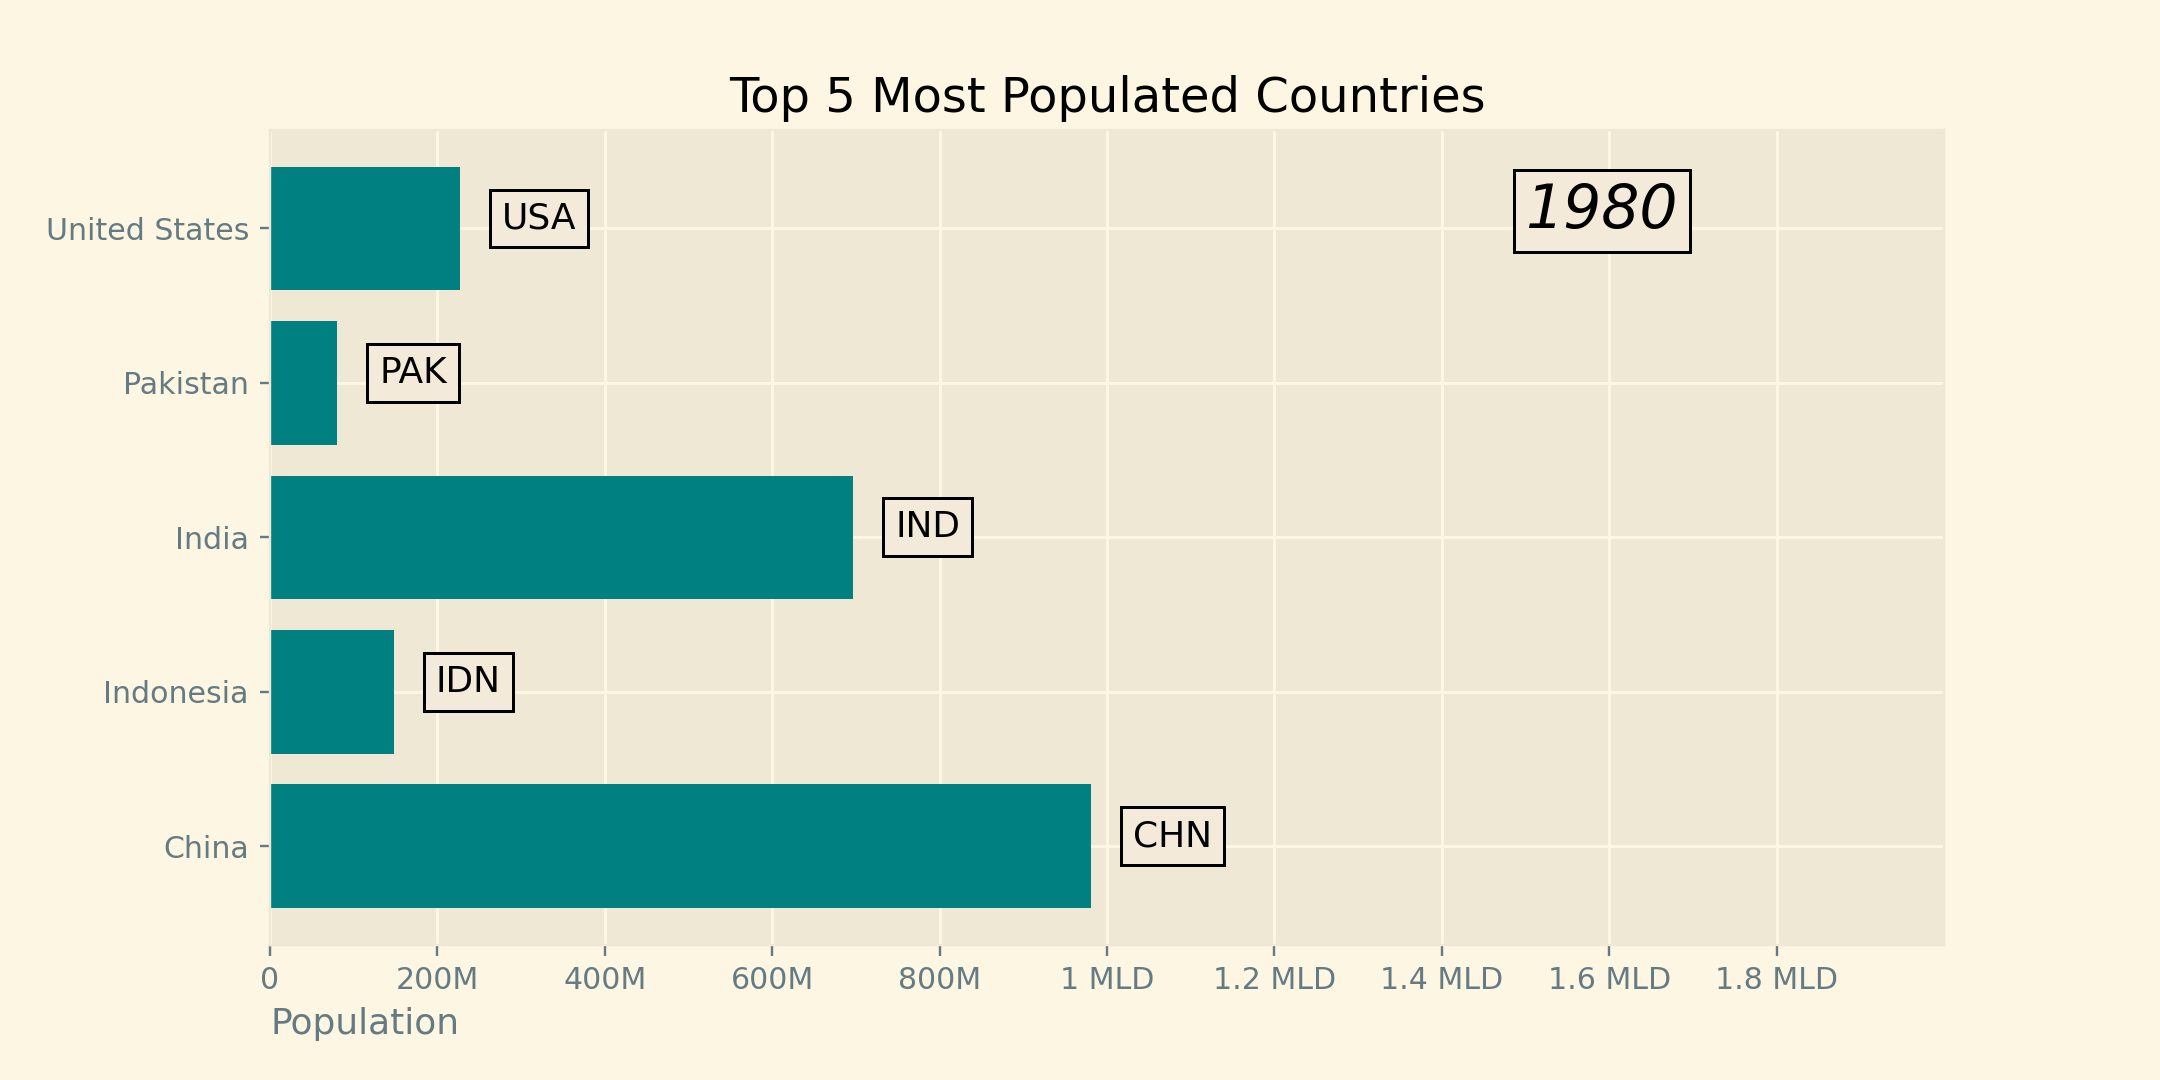

In [29]:
with plt.style.context('Solarize_Light2'):
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot()


    plt.xlim(0,2000000000)
    ax.xaxis.set_ticks(range(0,1900000000,200000000), labels = ['0','200M','400M','600M','800M','1 MLD','1.2 MLD','1.4 MLD','1.6 MLD','1.8 MLD'])

    ax.set_title('Top 5 Most Populated Countries')
    ax.set_xlabel(xlabel ='Population',loc = 'left')

    bars = ax.barh(df.index, df['1960'], color='teal')
    text = ax.text(1500000000,4,'', fontsize = 20,
                   bbox = dict(facecolor = '#F3EADA',edgecolor="black"),
                  fontstyle = 'italic')
    labs = [ax.text(0,i,'',bbox = dict(facecolor = '#F3EADA',edgecolor="black"),
                    fontsize=12) for i in range(5)]

    def update(year):

        for i in range(5):
            bars[i].set(width = df.iloc[i][f"{year}"])
            labs[i].set_text(df.iloc[i]['Country Code'])
            labs[i].set_x(bars[i].get_width()+50000000)

        text.set_text(f"{year}")

        return bars,labs[0],labs[1],labs[2],labs[3],labs[4]
                
    



    animate = FuncAnimation(fig, update, range(1960,2022), repeat = False, blit = True)

    plt.show()


(And the black&white version):

<IPython.core.display.Javascript object>


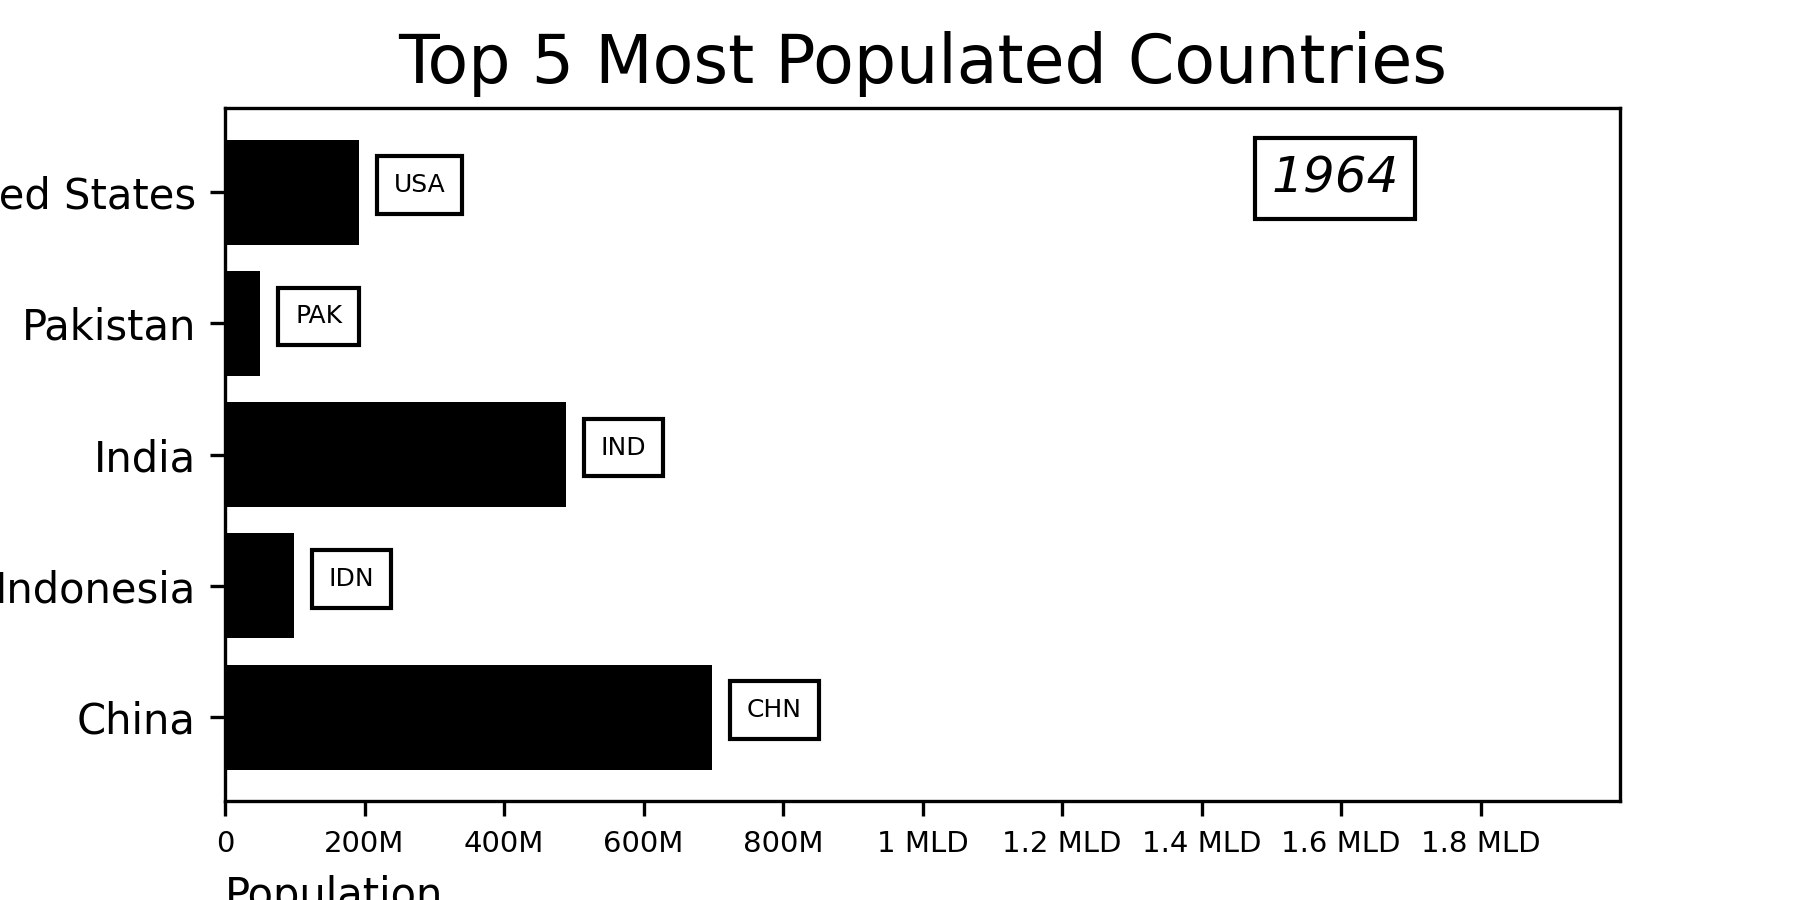

In [30]:
with plt.style.context('default'):
    fig = plt.figure(figsize = (6,3))
    ax = fig.add_subplot()


    plt.xlim(0,2000000000)
    ax.xaxis.set_ticks(range(0,1900000000,200000000),
                       labels = ['0','200M','400M','600M','800M','1 MLD','1.2 MLD','1.4 MLD','1.6 MLD','1.8 MLD'],
                       fontsize=7)

    ax.set_title('Top 5 Most Populated Countries', fontsize=16)
    ax.set_xlabel(xlabel ='Population',loc = 'left', fontsize=10)

    bars = ax.barh(df.index, df['1960'], color='black')
    text = ax.text(1500000000,4,'', fontsize = 12,
                   bbox = dict(facecolor = 'white',edgecolor="black"),
                  fontstyle = 'italic')
    labs = [ax.text(0,i,'',bbox = dict(facecolor = 'white',edgecolor="black"),
                    fontsize=6) for i in range(5)]

    def update(year):

        for i in range(5):
            bars[i].set(width = df.iloc[i][f"{year}"])
            labs[i].set_text(df.iloc[i]['Country Code'])
            labs[i].set_x(bars[i].get_width()+50000000)

        text.set_text(f"{year}")

        return bars,labs[0],labs[1],labs[2],labs[3],labs[4]
                
    



    animate = FuncAnimation(fig, update, range(1960,2022), repeat = False, blit = True)

    plt.show()


### b) Random country from random year as a 'centroid'

For the next part we will pick one country and year at random. Next, after narrowing down our dataframe to only the chosen year, let us add a new column, containing information on how much difference there is between population of every country and our chosen country.
In other words, we'll be examining the absolute value of difference between populations

In [7]:
num_of_countries = len(countries.index)  # so we know how much countries
num_of_countries                         # there is in the dataset

182

In [34]:
country_num, year_num = random.randint(0,180), random.randint(1960,2021)

So now, our chosen country and year are

In [41]:
"""
chosen = countries.index[country_num]
chosen, year_num
"""

('Marshall Islands', 1990)

In [8]:
chosen = 'Marshall Islands'
year_num = 1990

We then proceed now to adding the new column to our dataframe

In [9]:
new_df = countries[f"{year_num}"].to_frame()
new_df

1990
Country Name            
Aruba            65712.0
Afghanistan   10694796.0
Angola        11828638.0
Albania        3286542.0
Andorra          53569.0
...                  ...
Vanuatu         150882.0
Samoa           168186.0
South Africa  39877570.0
Zambia         7686401.0
Zimbabwe      10113893.0

[182 rows x 1 columns]

In [11]:
new_df["Abs Difference"] = [abs(new_df.loc[chosen][0]-new_df.iloc[i][0])
                                 for i in range(num_of_countries)]
new_df

1990  Abs Difference
Country Name                            
Aruba            65712.0         19665.0
Afghanistan   10694796.0      10648749.0
Angola        11828638.0      11782591.0
Albania        3286542.0       3240495.0
Andorra          53569.0          7522.0
...                  ...             ...
Vanuatu         150882.0        104835.0
Samoa           168186.0        122139.0
South Africa  39877570.0      39831523.0
Zambia         7686401.0       7640354.0
Zimbabwe      10113893.0      10067846.0

[182 rows x 2 columns]

Now we'll make a dataframe containing our chosen country and 4 others, whose population in the given year was the smallest, in realtion to the chosen country.
Then, we proceed to make yet another plot of population change over years.

In [12]:
df2 = countries[countries.index.isin(new_df["Abs Difference"].nsmallest().index)]
df2 = df2.drop(labels = df2.columns[-1], axis = 1)
df2

Country Code     Indicator Name Indicator Code  \
Country Name                                                              
Andorra                           AND  Population, total    SP.POP.TOTL   
American Samoa                    ASM  Population, total    SP.POP.TOTL   
Faroe Islands                     FRO  Population, total    SP.POP.TOTL   
Marshall Islands                  MHL  Population, total    SP.POP.TOTL   
Northern Mariana Islands          MNP  Population, total    SP.POP.TOTL   

                             1960     1961     1962     1963     1964  \
Country Name                                                            
Andorra                    9443.0  10216.0  11014.0  11839.0  12690.0   
American Samoa            20085.0  20626.0  21272.0  21949.0  22656.0   
Faroe Islands             34154.0  34572.0  34963.0  35385.0  35841.0   
Marshall Islands          15374.0  15867.0  16387.0  16947.0  17537.0   
Northern Mariana Islands   8702.0   8965.0   9252.0   9561.0   9890.0   

                             1965     1966  ...     2012     2013     2014  \
Country Name                                ...                              
Andorra                   13563.0  14546.0  ...  71013.0  71367.0  71621.0   
American Samoa            23391.0  24122.0  ...  53691.0  52995.0  52217.0   
Faroe Islands             36346.0  36825.0  ...  48392.0  48418.0  48465.0   
Marshall Islands          18154.0  18794.0  ...  52203.0  51352.0  50419.0   
Northern Mariana Islands  10229.0  10577.0  ...  52359.0  52141.0  51856.0   

                             2015     2016     2017     2018     2019  \
Country Name                                                            
Andorra                   71746.0  72540.0  73837.0  75013.0  76343.0   
American Samoa            51368.0  50448.0  49463.0  48424.0  47321.0   
Faroe Islands             48816.0  49500.0  50230.0  50955.0  51681.0   
Marshall Islands          49410.0  48329.0  47187.0  45989.0  44728.0   
Northern Mariana Islands  51514.0  51133.0  50729.0  50304.0  49858.0   

                             2020     2021  
Country Name                                
Andorra                   77700.0  79034.0  
American Samoa            46189.0  45035.0  
Faroe Islands             52415.0  52889.0  
Marshall Islands          43413.0  42050.0  
Northern Mariana Islands  49587.0  49481.0  

[5 rows x 65 columns]

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


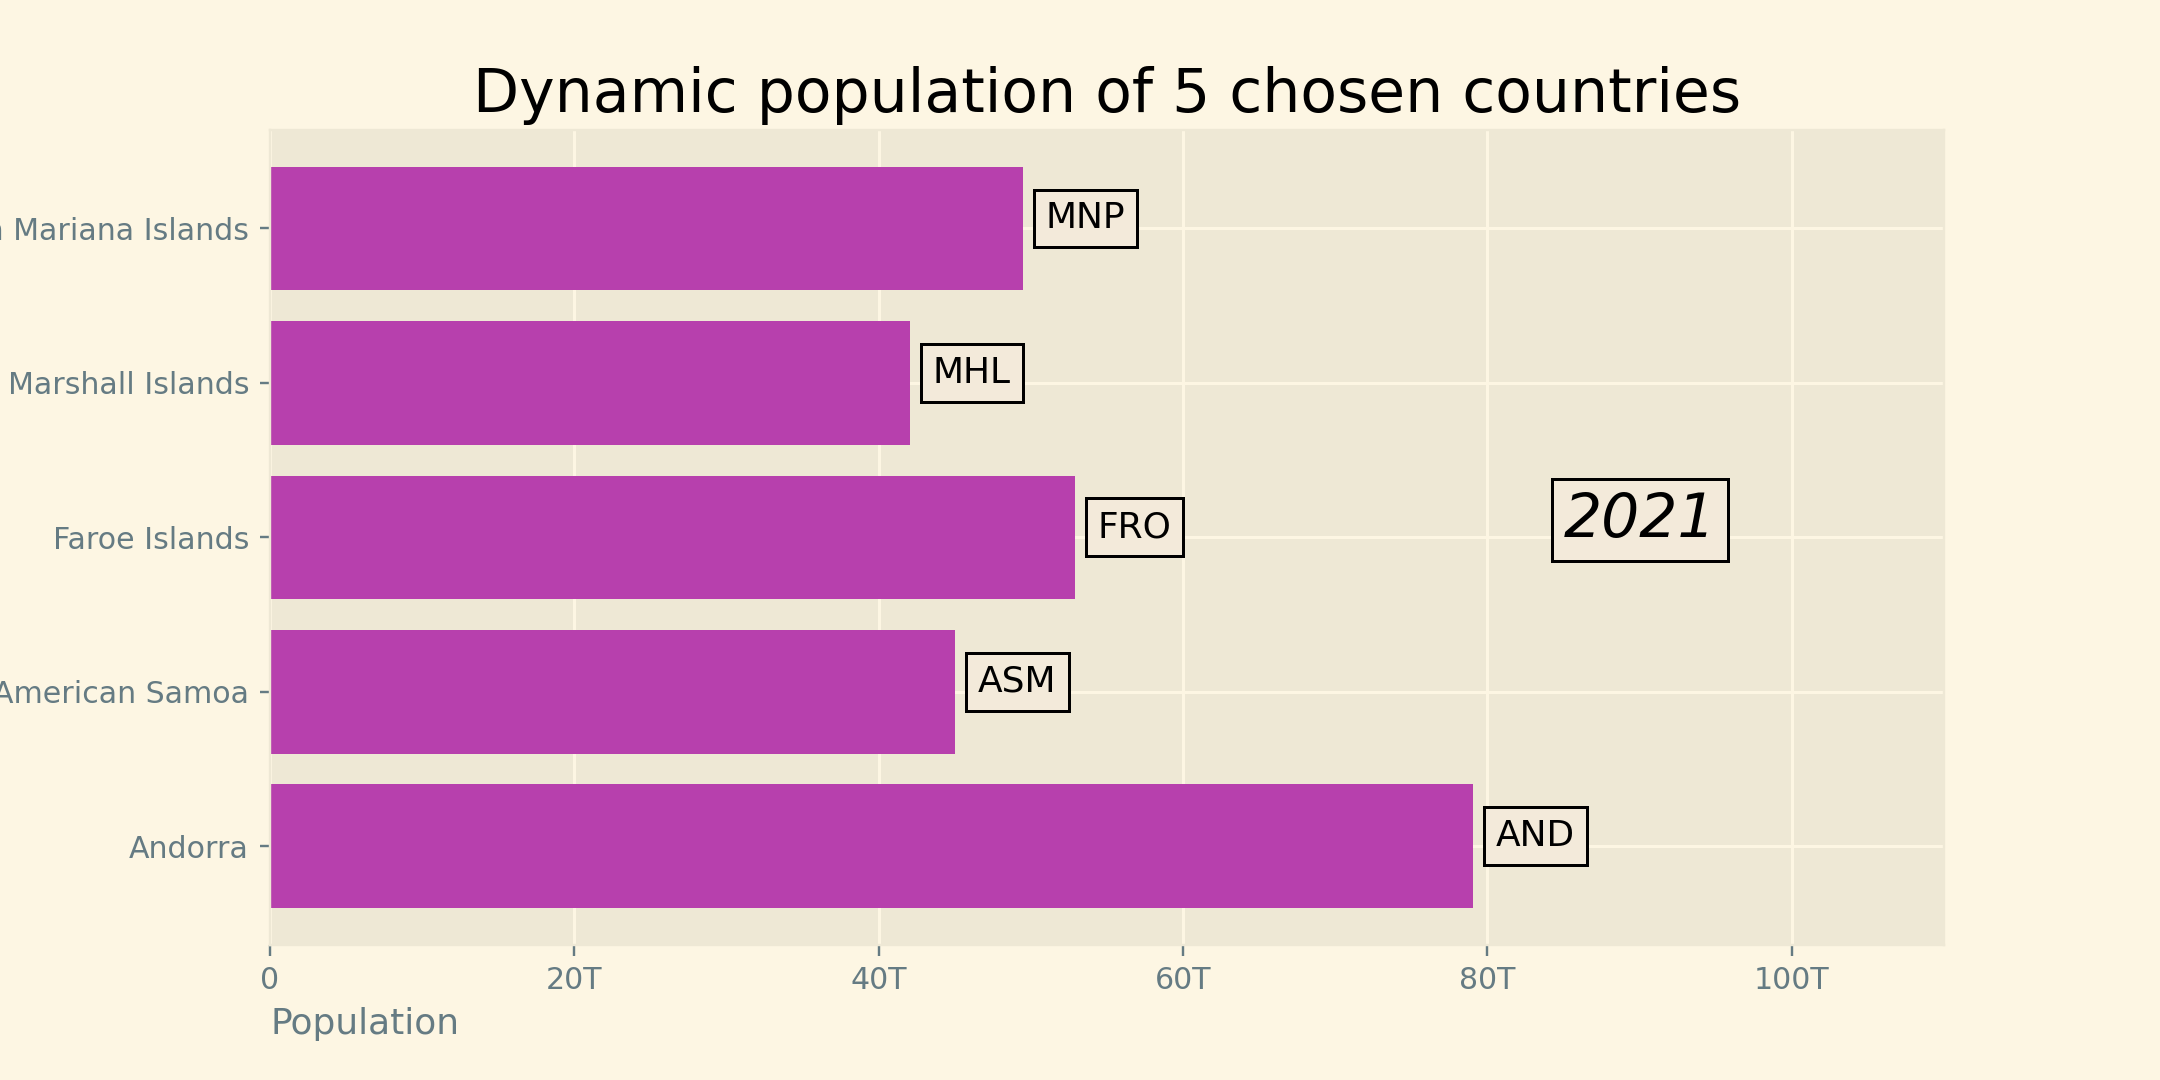

In [32]:
with plt.style.context('Solarize_Light2'):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()

    plt.xlim(0,110000)
    ax.xaxis.set_ticks(range(0,110000,20000),
                       labels = ['0','20T','40T','60T','80T','100T'])

    ax.set_title('Dynamic population of 5 chosen countries', fontsize=20)
    ax.set_xlabel(xlabel ='Population',loc = 'left')

    bars = ax.barh(df2.index, df2['1960'], color='#B740AD')

    text = ax.text(85000,2,'', fontsize = 20,
                   bbox = dict(facecolor = '#F3EADA',edgecolor="black"),
                  fontstyle = 'italic')

    labs = [ax.text(0,i,'',bbox = dict(facecolor = '#F3EADA',edgecolor="black"),
                    fontsize=12) for i in range(5)]

    def update(year):

        for i in range(5):
            bars[i].set_width(df2.iloc[i][f"{year}"])
            labs[i].set_text(df2.iloc[i]['Country Code'])
            labs[i].set_x(bars[i].get_width()+1500)

        text.set_text(f"{year}")

        return bars, labs[0],labs[1],labs[2],labs[3],labs[4]

    animate = FuncAnimation(fig, update, range(1960,2022), interval = 100, repeat = False, blit = True)

    plt.show()

(And black&white version):

<IPython.core.display.Javascript object>


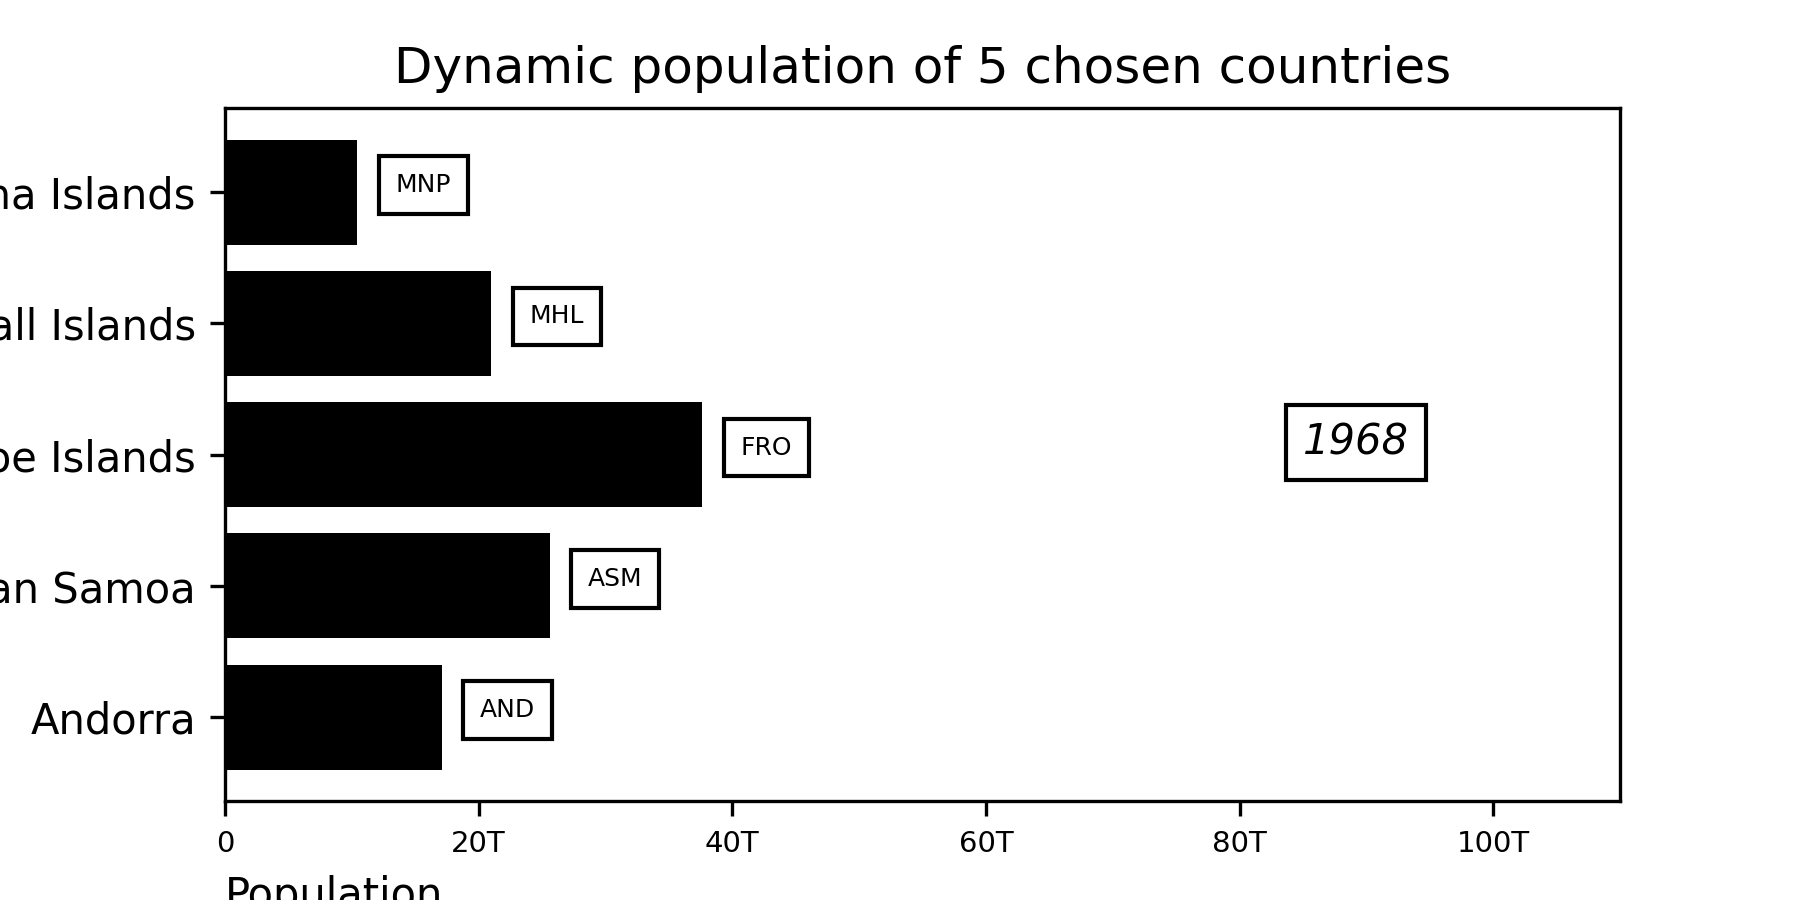

In [24]:
with plt.style.context('default'):
    fig = plt.figure(figsize=(6,3))
    ax = fig.add_subplot()

    plt.xlim(0,110000)
    ax.xaxis.set_ticks(range(0,110000,20000),
                       labels = ['0','20T','40T','60T','80T','100T'],
                      fontsize=7)

    ax.set_title('Dynamic population of 5 chosen countries', fontsize=12)
    ax.set_xlabel(xlabel ='Population',loc = 'left')

    bars = ax.barh(df2.index, df2['1960'], color='black')

    text = ax.text(85000,2,'', fontsize = 10,
                   bbox = dict(facecolor = 'white',edgecolor="black"),
                  fontstyle = 'italic')

    labs = [ax.text(0,i,'', bbox = dict(facecolor = 'white',edgecolor="black"),
                    fontsize=6) for i in range(5)]

    def update(year):

        for i in range(5):
            bars[i].set_width(df2.iloc[i][f"{year}"])
            labs[i].set_text(df2.iloc[i]['Country Code'])
            labs[i].set_x(bars[i].get_width()+3000)

        text.set_text(f"{year}")

        return bars, labs[0],labs[1],labs[2],labs[3],labs[4]

    animate = FuncAnimation(fig, update, range(1960,2022), interval = 200, repeat = False, blit = True)

    plt.show()

### c) Poland from random year as a 'centroid'

Okay, so now we generate a similar barplot, but this time with Poland as the 'centroid'.

In [96]:
# rand_year = random.randint(1960,2021)

In [13]:
rand_year = 2011

In [14]:
poland_df = countries[f"{rand_year}"].to_frame()
poland_df

2011
Country Name            
Aruba           101288.0
Afghanistan   29249157.0
Angola        24259111.0
Albania        2905195.0
Andorra          70567.0
...                  ...
Vanuatu         251294.0
Samoa           196351.0
South Africa  52443325.0
Zambia        14265814.0
Zimbabwe      13025785.0

[182 rows x 1 columns]

In [15]:
poland_df["Abs Difference"] = [abs(poland_df.loc['Poland'][0]-poland_df.iloc[i][0])
                                 for i in range(num_of_countries)]
poland_df

2011  Abs Difference
Country Name                            
Aruba           101288.0      37961967.0
Afghanistan   29249157.0       8814098.0
Angola        24259111.0      13804144.0
Albania        2905195.0      35158060.0
Andorra          70567.0      37992688.0
...                  ...             ...
Vanuatu         251294.0      37811961.0
Samoa           196351.0      37866904.0
South Africa  52443325.0      14380070.0
Zambia        14265814.0      23797441.0
Zimbabwe      13025785.0      25037470.0

[182 rows x 2 columns]

In [16]:
df3 = countries[countries.index.isin(poland_df["Abs Difference"].nsmallest().index)]
df3 = df3.drop(labels = df3.columns[-1], axis = 1)
df3

Country Code     Indicator Name Indicator Code        1960  \
Country Name                                                              
Argentina             ARG  Population, total    SP.POP.TOTL  20349744.0   
Canada                CAN  Population, total    SP.POP.TOTL  17909356.0   
Algeria               DZA  Population, total    SP.POP.TOTL  11394307.0   
Poland                POL  Population, total    SP.POP.TOTL  29637450.0   
Sudan                 SDN  Population, total    SP.POP.TOTL   8326462.0   

                    1961        1962        1963        1964        1965  \
Country Name                                                               
Argentina     20680653.0  21020359.0  21364017.0  21708487.0  22053661.0   
Canada        18271000.0  18614000.0  18964000.0  19325000.0  19678000.0   
Algeria       11598608.0  11778260.0  11969451.0  12179099.0  12381256.0   
Poland        29964000.0  30308500.0  30712000.0  31139450.0  31444950.0   
Sudan          8577490.0   8841338.0   9115091.0   9406702.0   9712785.0   

                    1966  ...        2012        2013        2014        2015  \
Country Name              ...                                                   
Argentina     22403116.0  ...  41733271.0  42202935.0  42669500.0  43131966.0   
Canada        20048000.0  ...  34714222.0  35082954.0  35437435.0  35702908.0   
Algeria       12613389.0  ...  37260563.0  38000626.0  38760168.0  39543154.0   
Poland        31681000.0  ...  38063164.0  38040196.0  38011735.0  37986412.0   
Sudan         10014505.0  ...  35159792.0  35990704.0  37003245.0  38171178.0   

                    2016        2017        2018        2019        2020  \
Country Name                                                               
Argentina     43590368.0  44044811.0  44494502.0  44938712.0  45376763.0   
Canada        36109487.0  36545236.0  37065084.0  37601230.0  38037204.0   
Algeria       40339329.0  41136546.0  41927007.0  42705368.0  43451666.0   
Poland        37970087.0  37974826.0  37974750.0  37965475.0  37899070.0   
Sudan         39377169.0  40679828.0  41999059.0  43232093.0  44440486.0   

                    2021  
Country Name              
Argentina     45808747.0  
Canada        38246108.0  
Algeria       44177969.0  
Poland        37747124.0  
Sudan         45657202.0  

[5 rows x 65 columns]

<IPython.core.display.Javascript object>


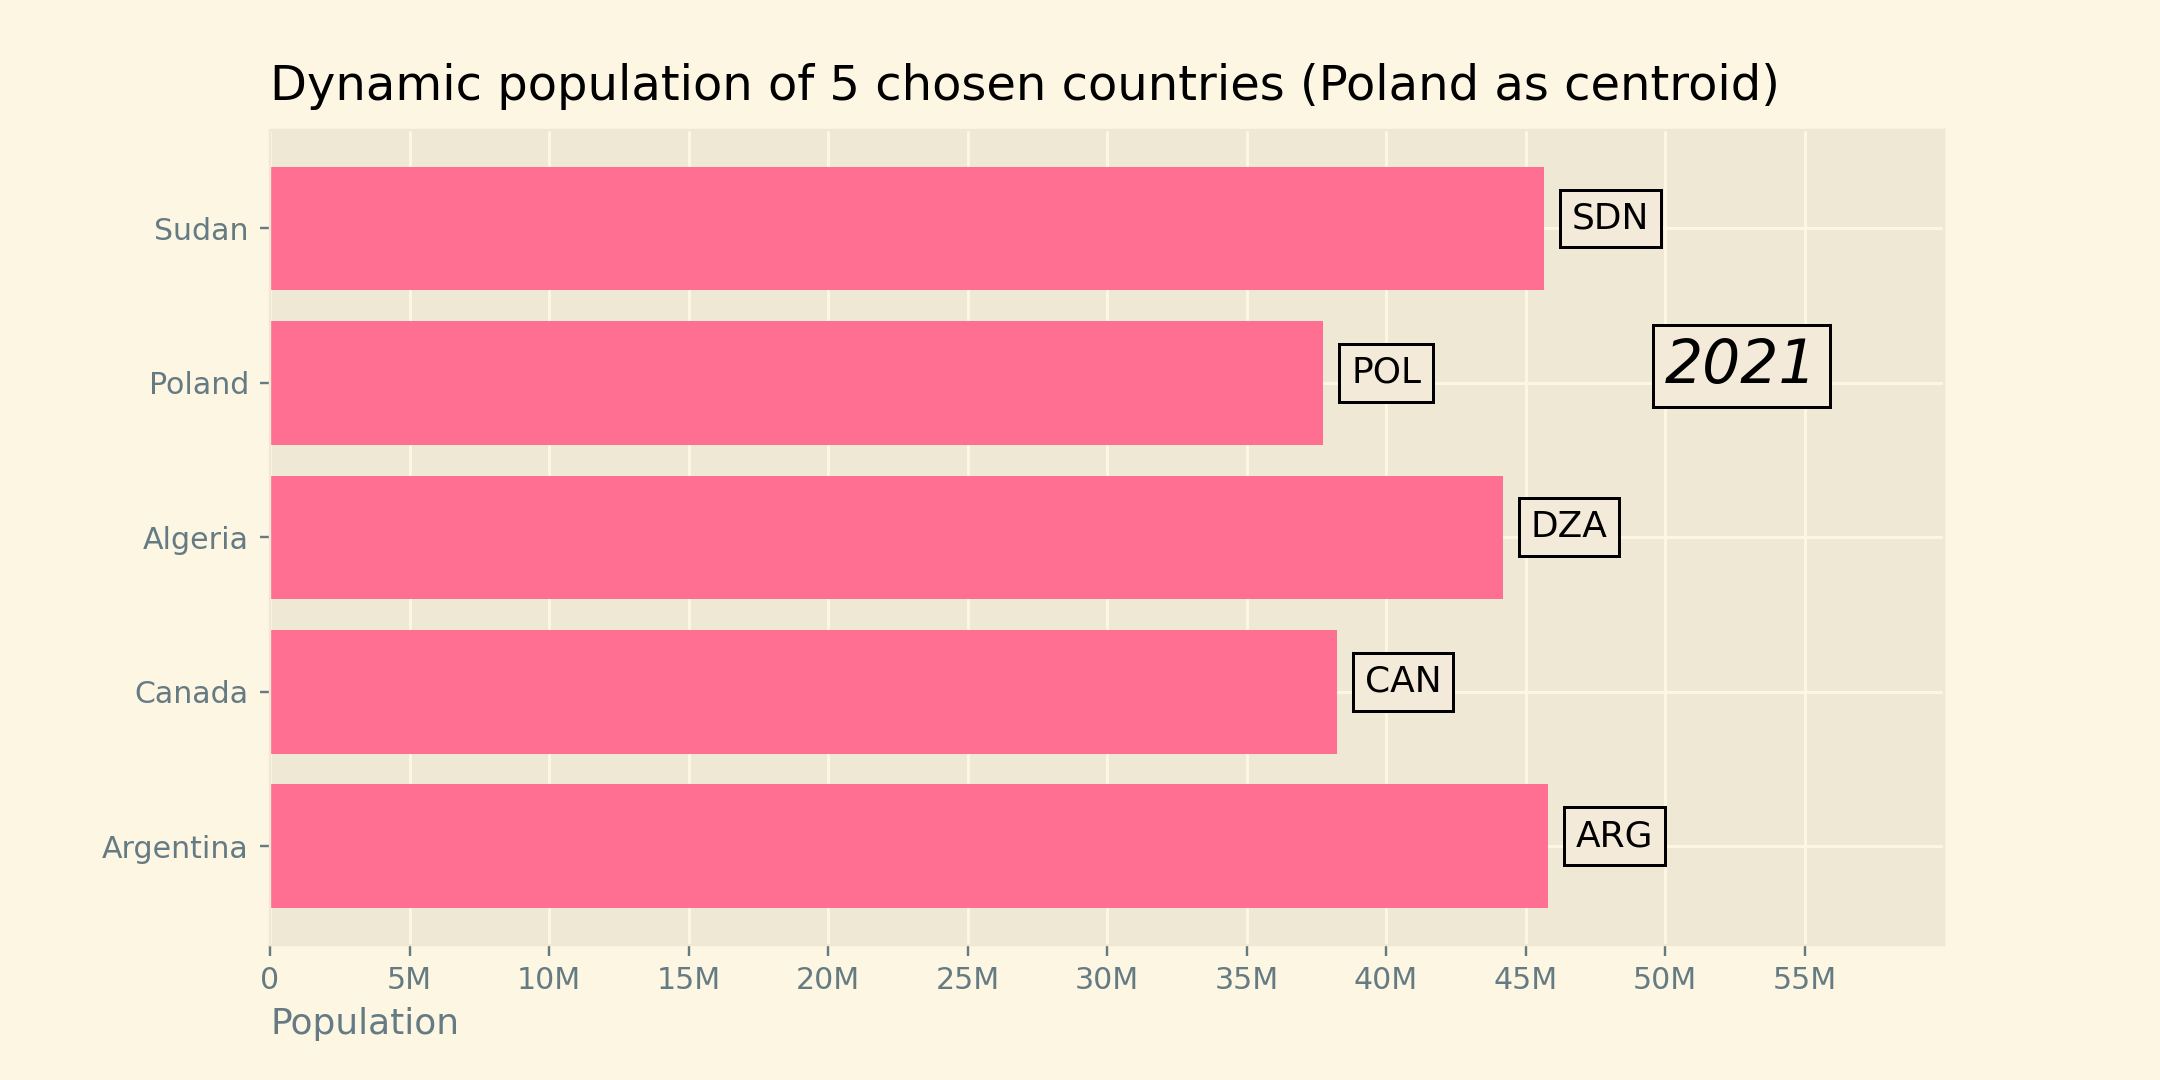

In [354]:
with plt.style.context('Solarize_Light2'):
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()

    plt.xlim(0,60000000)
    ax.xaxis.set_ticks(range(0,60000000,5000000),
                       labels = ['0','5M','10M','15M','20M','25M','30M','35M','40M','45M','50M','55M'])

    ax.set_title('Dynamic population of 5 chosen countries (Poland as centroid)',
                 loc='left',
                 pad = 10)
    ax.set_xlabel(xlabel ='Population',loc = 'left')

    bars = ax.barh(df3.index, df3['1960'], color='#FF6F91')

    text = ax.text(50000000,3,'', fontsize = 20,
                   bbox = dict(facecolor = '#F3EADA',edgecolor="black"),
                  fontstyle = 'italic')

    labs = [ax.text(0,i,'',bbox = dict(facecolor = '#F3EADA',edgecolor="black"),
                    fontsize=12) for i in range(5)]

    def update(year):

        for i in range(5):
            bars[i].set_width(df3.iloc[i][f"{year}"])
            labs[i].set_text(df3.iloc[i]['Country Code'])
            labs[i].set_x(bars[i].get_width()+1000000)

        text.set_text(f"{year}")

        return bars, labs[0],labs[1],labs[2],labs[3],labs[4]

    animate = FuncAnimation(fig, update, range(1960,2022), interval = 200, repeat = False, blit = True)

    plt.show()

(And the black&white version):

<IPython.core.display.Javascript object>


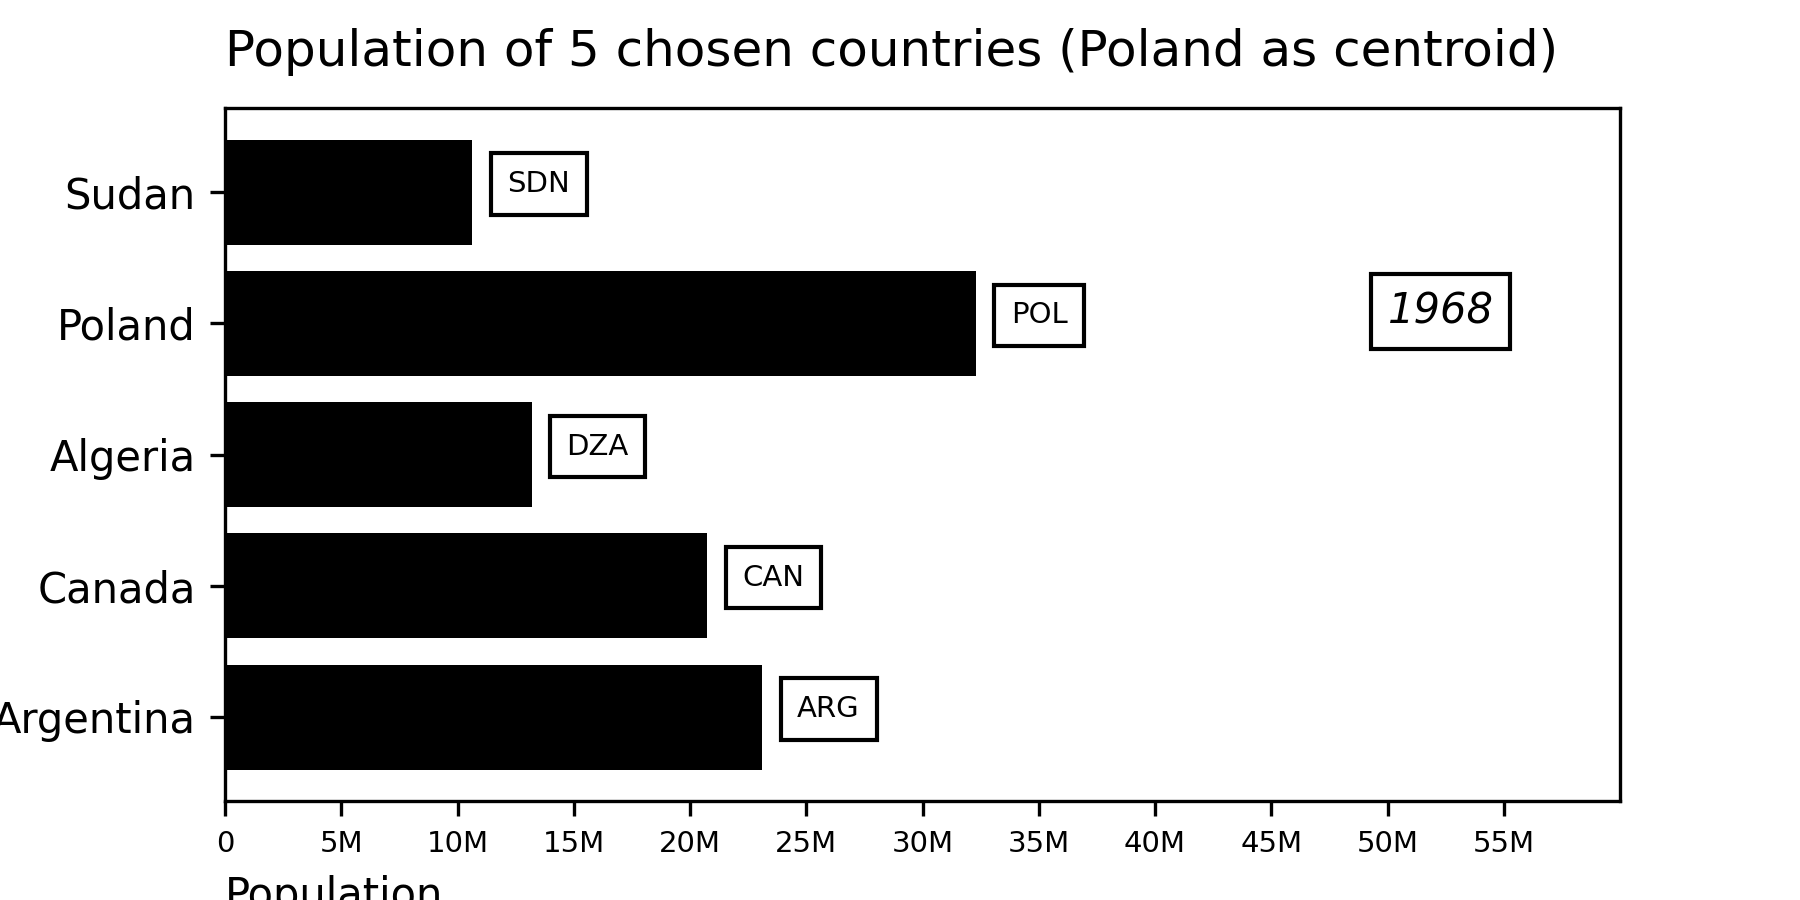

In [31]:
with plt.style.context('default'):
    fig = plt.figure(figsize=(6,3))
    ax = fig.add_subplot()

    plt.xlim(0,60000000)
    ax.xaxis.set_ticks(range(0,60000000,5000000),
                       labels = ['0','5M','10M','15M','20M','25M','30M','35M','40M','45M','50M','55M'],
                      fontsize=7)

    ax.set_title('Population of 5 chosen countries (Poland as centroid)',
                 loc='left',
                 pad = 10,
                fontsize=12)
    ax.set_xlabel(xlabel ='Population',loc = 'left', fontsize=10)

    bars = ax.barh(df3.index, df3['1960'], color='black')

    text = ax.text(50000000,3,'', fontsize = 10,
                   bbox = dict(facecolor = 'white',edgecolor="black"),
                  fontstyle = 'italic')

    labs = [ax.text(0,i,'',bbox = dict(facecolor = 'white',edgecolor="black"),
                    fontsize=7) for i in range(5)]

    def update(year):

        for i in range(5):
            bars[i].set_width(df3.iloc[i][f"{year}"])
            labs[i].set_text(df3.iloc[i]['Country Code'])
            labs[i].set_x(bars[i].get_width()+1500000)

        text.set_text(f"{year}")

        return bars, labs[0],labs[1],labs[2],labs[3],labs[4]

    animate = FuncAnimation(fig, update, range(1960,2022), interval = 200, repeat = False, blit = True)

    plt.show()

It's actually pretty interesting how Poland was so much ahead, in terms of population, compared to the other four, just to finish last in the year 2021. Truly remarkable what happened, especially in African countries- Sudan and Algieria.

## 3. Line plots
### a) Top 5 populated countries

Let's remind ourselves the dataframe we'll be using for the next plot

In [32]:
df

Country Code     Indicator Name Indicator Code         1960  \
Country Name                                                                
China                  CHN  Population, total    SP.POP.TOTL  667070000.0   
Indonesia              IDN  Population, total    SP.POP.TOTL   88382881.0   
India                  IND  Population, total    SP.POP.TOTL  445954579.0   
Pakistan               PAK  Population, total    SP.POP.TOTL   45954226.0   
United States          USA  Population, total    SP.POP.TOTL  180671000.0   

                      1961         1962         1963         1964  \
Country Name                                                        
China          660330000.0  665770000.0  682335000.0  698355000.0   
Indonesia       90816938.0   93345489.0   95962527.0   98675061.0   
India          456351876.0  467024193.0  477933619.0  489059309.0   
Pakistan        47060915.0   48161841.0   49325050.0   50552592.0   
United States  183691000.0  186538000.0  189242000.0  191889000.0   

                      1965         1966  ...          2012          2013  \
Country Name                             ...                               
China          715185000.0  735400000.0  ...  1.354190e+09  1.363240e+09   
Indonesia      101157868.0  103561105.0  ...  2.502227e+08  2.532759e+08   
India          500114346.0  510992617.0  ...  1.274487e+09  1.291132e+09   
Pakistan        51841626.0   53199414.0  ...  2.022059e+08  2.053376e+08   
United States  194303000.0  196560000.0  ...  3.138777e+08  3.160599e+08   

                       2014          2015          2016          2017  \
Country Name                                                            
China          1.371860e+09  1.379860e+09  1.387790e+09  1.396215e+09   
Indonesia      2.562298e+08  2.590920e+08  2.618502e+08  2.644989e+08   
India          1.307247e+09  1.322867e+09  1.338636e+09  1.354196e+09   
Pakistan       2.082516e+08  2.109693e+08  2.135248e+08  2.163797e+08   
United States  3.183863e+08  3.207390e+08  3.230718e+08  3.251221e+08   

                       2018          2019          2020          2021  
Country Name                                                           
China          1.402760e+09  1.407745e+09  1.411100e+09  1.412360e+09  
Indonesia      2.670668e+08  2.695829e+08  2.718580e+08  2.737532e+08  
India          1.369003e+09  1.383112e+09  1.396387e+09  1.407564e+09  
Pakistan       2.197315e+08  2.232933e+08  2.271967e+08  2.314021e+08  
United States  3.268382e+08  3.283300e+08  3.315011e+08  3.318937e+08  

[5 rows x 65 columns]

In [36]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<IPython.core.display.Javascript object>


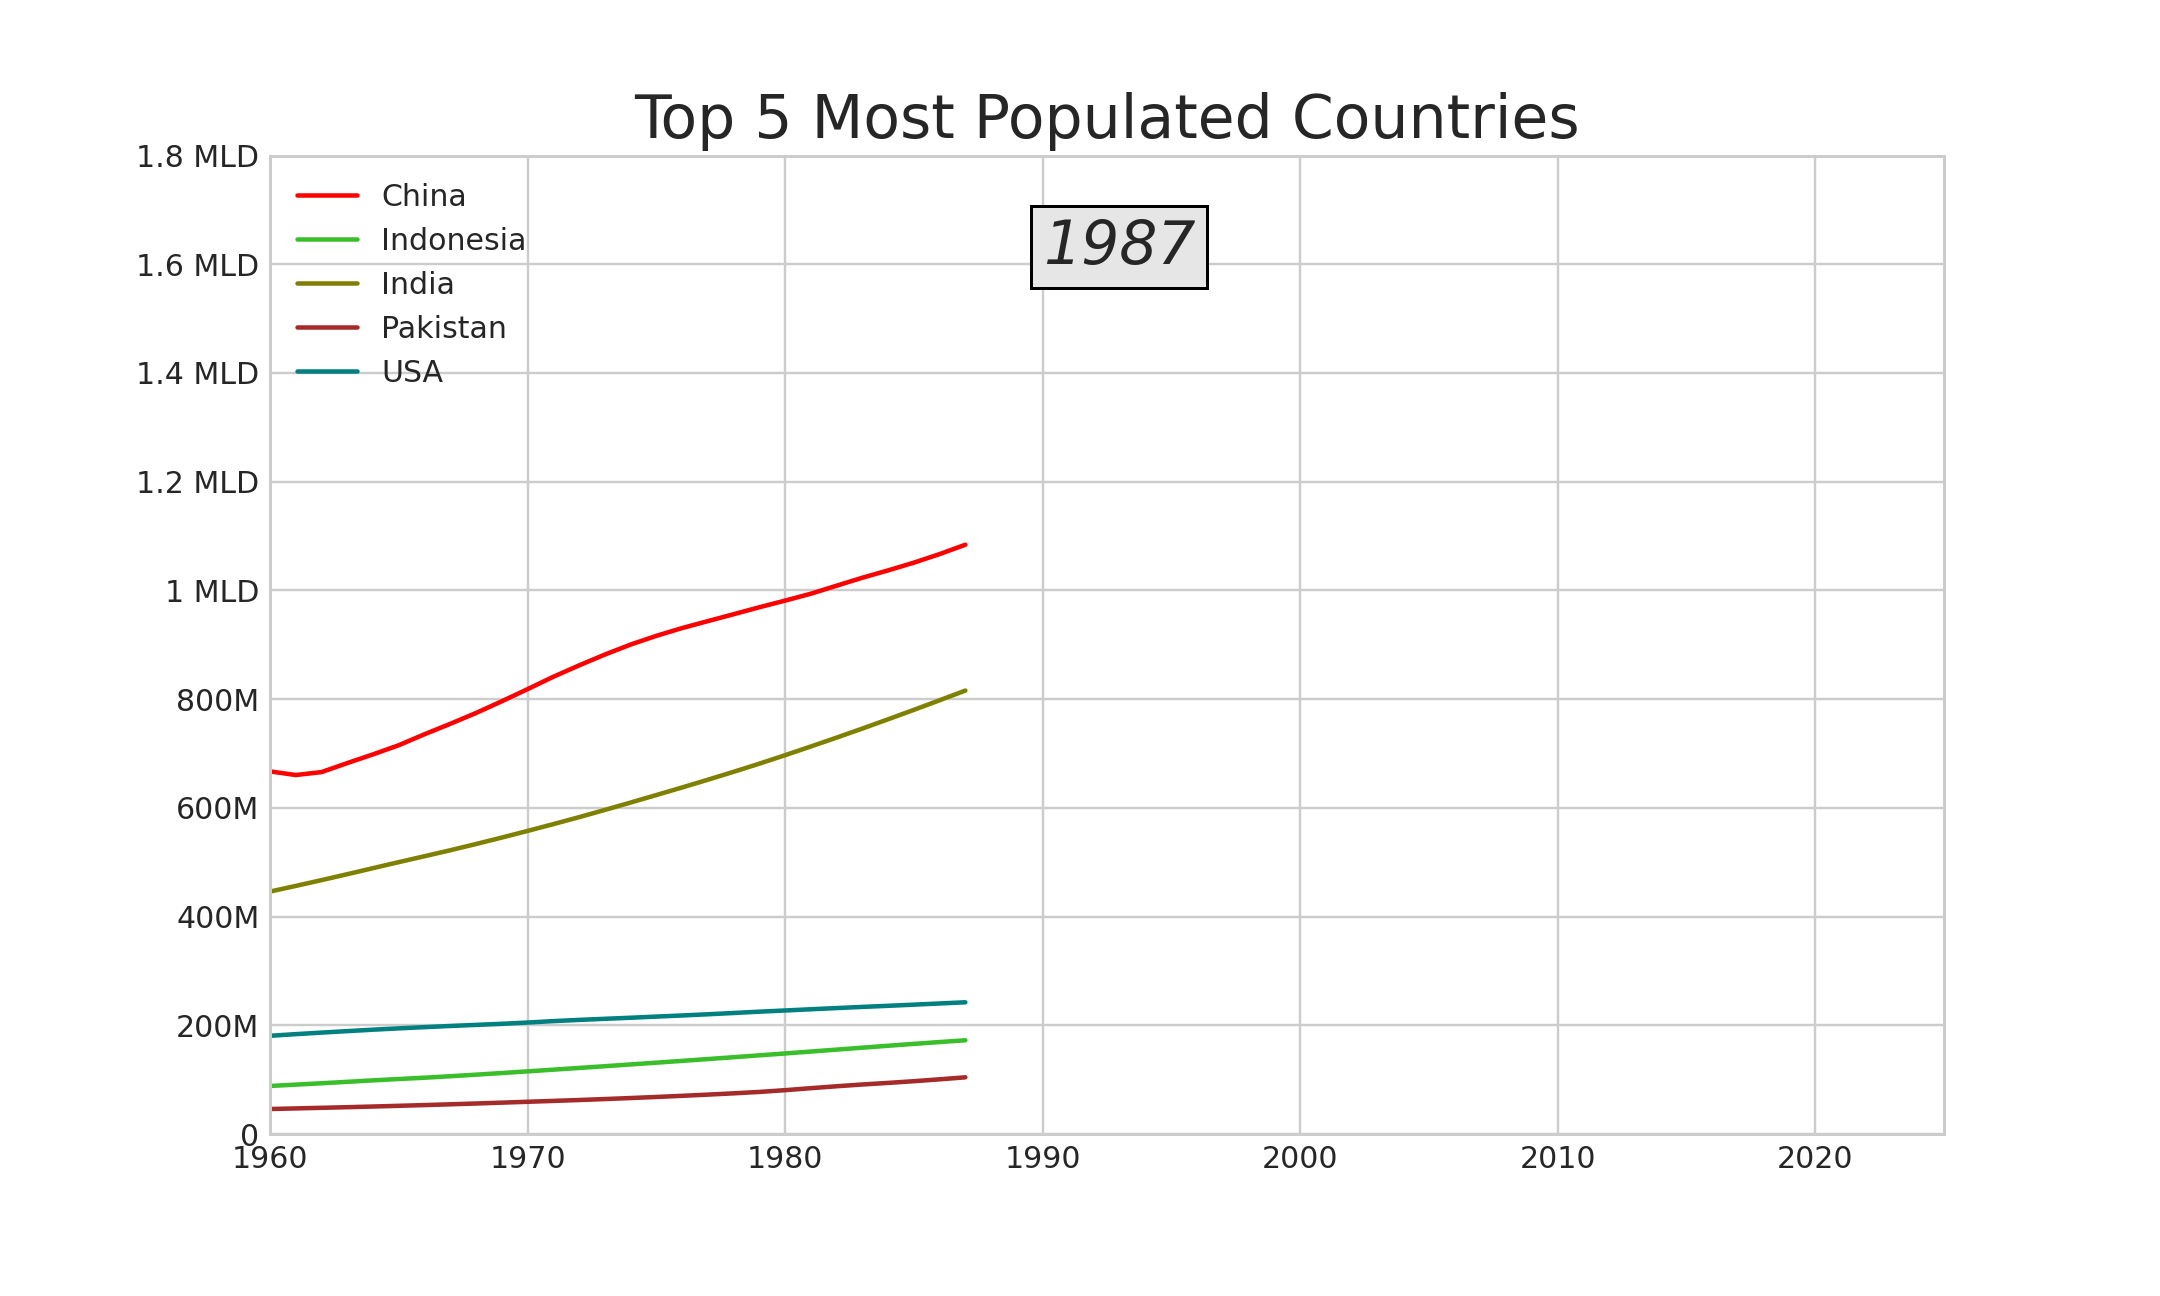

In [38]:
with plt.style.context('ggplot'):
    
    # Looks
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot()
    plt.xlim(1960,2025)
    ax.xaxis.set_ticks(range(1960,2030,10))
    plt.ylim(0,1800000000)
    ax.yaxis.set_ticks(range(0,1800000001,200000000),
                      labels=['0','200M','400M','600M','800M','1 MLD','1.2 MLD','1.4 MLD','1.6 MLD','1.8 MLD'])
    ax.set_title("Top 5 Most Populated Countries", fontsize=20)

    # Preparing data
    china_line, = ax.plot([],[],color='red')
    china_line.set_label("China")
    china_data = [[],[]]
    
    indo_line, = ax.plot([],[],color='#3ABF2B', label="Indonesia")
    indo_line.set_label("Indonesia")
    indo_data = [[],[]]
    
    india_line, = ax.plot([],[],color='olive', label="India")
    india_line.set_label("India")
    india_data = [[],[]]
    
    pak_line, = ax.plot([],[],color='brown', label="Pakistan")
    pak_line.set_label("Pakistan")
    pak_data = [[],[]]
    
    usa_line, = ax.plot([],[],color='teal', label="USA")
    usa_line.set_label("USA")
    usa_data = [[],[]]
    
    ax.legend(loc="upper left")
    
    """
    I dont add the 'Country Code' labels to the lines as I'm not
    sure how that's supposed to look like to avoid those labels
    overlapping with each other- especially in the context of
    Indonesia, Pakistan and USA, whose populations run somewhat
    close to each other.
    That's why I added the legend instead.
    (same applies to the next lineplots)
    """
    
    text = ax.text(1990,1600000000,'', fontsize = 20,
                   bbox = dict(facecolor = (0.9,0.9,0.9),edgecolor="black"),
                  fontstyle = 'italic')

    
    # Function
    def update(year):
        
        china_data[0].append(year)
        china_data[1].append(df.loc["China"][f"{year}"])
        indo_data[0].append(year)
        indo_data[1].append(df.loc["Indonesia"][f"{year}"])
        india_data[0].append(year)
        india_data[1].append(df.loc["India"][f"{year}"])
        pak_data[0].append(year)
        pak_data[1].append(df.loc["Pakistan"][f"{year}"])
        usa_data[0].append(year)
        usa_data[1].append(df.loc["United States"][f"{year}"])
        
        china_line.set_data(china_data[0],china_data[1])
        indo_line.set_data(indo_data[0],indo_data[1])
        india_line.set_data(india_data[0],india_data[1])
        pak_line.set_data(pak_data[0],pak_data[1])
        usa_line.set_data(usa_data[0],usa_data[1])
        
        text.set_text(f"{year}")
        
        return china_line,indo_line,india_line,pak_line,usa_line
    
    animation = FuncAnimation(fig,update,range(1960,2022),interval=100,repeat=False, blit=True)
    plt.show()
        

### b) Population of countries close to the "centroid"

Let's remember ourselves the dataframe for our lineplot (we're not random-selecting the country and year again as we want to simply create a line version for the previous barplot)

In [34]:
df2

Country Code     Indicator Name Indicator Code  \
Country Name                                                              
Andorra                           AND  Population, total    SP.POP.TOTL   
American Samoa                    ASM  Population, total    SP.POP.TOTL   
Faroe Islands                     FRO  Population, total    SP.POP.TOTL   
Marshall Islands                  MHL  Population, total    SP.POP.TOTL   
Northern Mariana Islands          MNP  Population, total    SP.POP.TOTL   

                             1960     1961     1962     1963     1964  \
Country Name                                                            
Andorra                    9443.0  10216.0  11014.0  11839.0  12690.0   
American Samoa            20085.0  20626.0  21272.0  21949.0  22656.0   
Faroe Islands             34154.0  34572.0  34963.0  35385.0  35841.0   
Marshall Islands          15374.0  15867.0  16387.0  16947.0  17537.0   
Northern Mariana Islands   8702.0   8965.0   9252.0   9561.0   9890.0   

                             1965     1966  ...     2012     2013     2014  \
Country Name                                ...                              
Andorra                   13563.0  14546.0  ...  71013.0  71367.0  71621.0   
American Samoa            23391.0  24122.0  ...  53691.0  52995.0  52217.0   
Faroe Islands             36346.0  36825.0  ...  48392.0  48418.0  48465.0   
Marshall Islands          18154.0  18794.0  ...  52203.0  51352.0  50419.0   
Northern Mariana Islands  10229.0  10577.0  ...  52359.0  52141.0  51856.0   

                             2015     2016     2017     2018     2019  \
Country Name                                                            
Andorra                   71746.0  72540.0  73837.0  75013.0  76343.0   
American Samoa            51368.0  50448.0  49463.0  48424.0  47321.0   
Faroe Islands             48816.0  49500.0  50230.0  50955.0  51681.0   
Marshall Islands          49410.0  48329.0  47187.0  45989.0  44728.0   
Northern Mariana Islands  51514.0  51133.0  50729.0  50304.0  49858.0   

                             2020     2021  
Country Name                                
Andorra                   77700.0  79034.0  
American Samoa            46189.0  45035.0  
Faroe Islands             52415.0  52889.0  
Marshall Islands          43413.0  42050.0  
Northern Mariana Islands  49587.0  49481.0  

[5 rows x 65 columns]

<IPython.core.display.Javascript object>


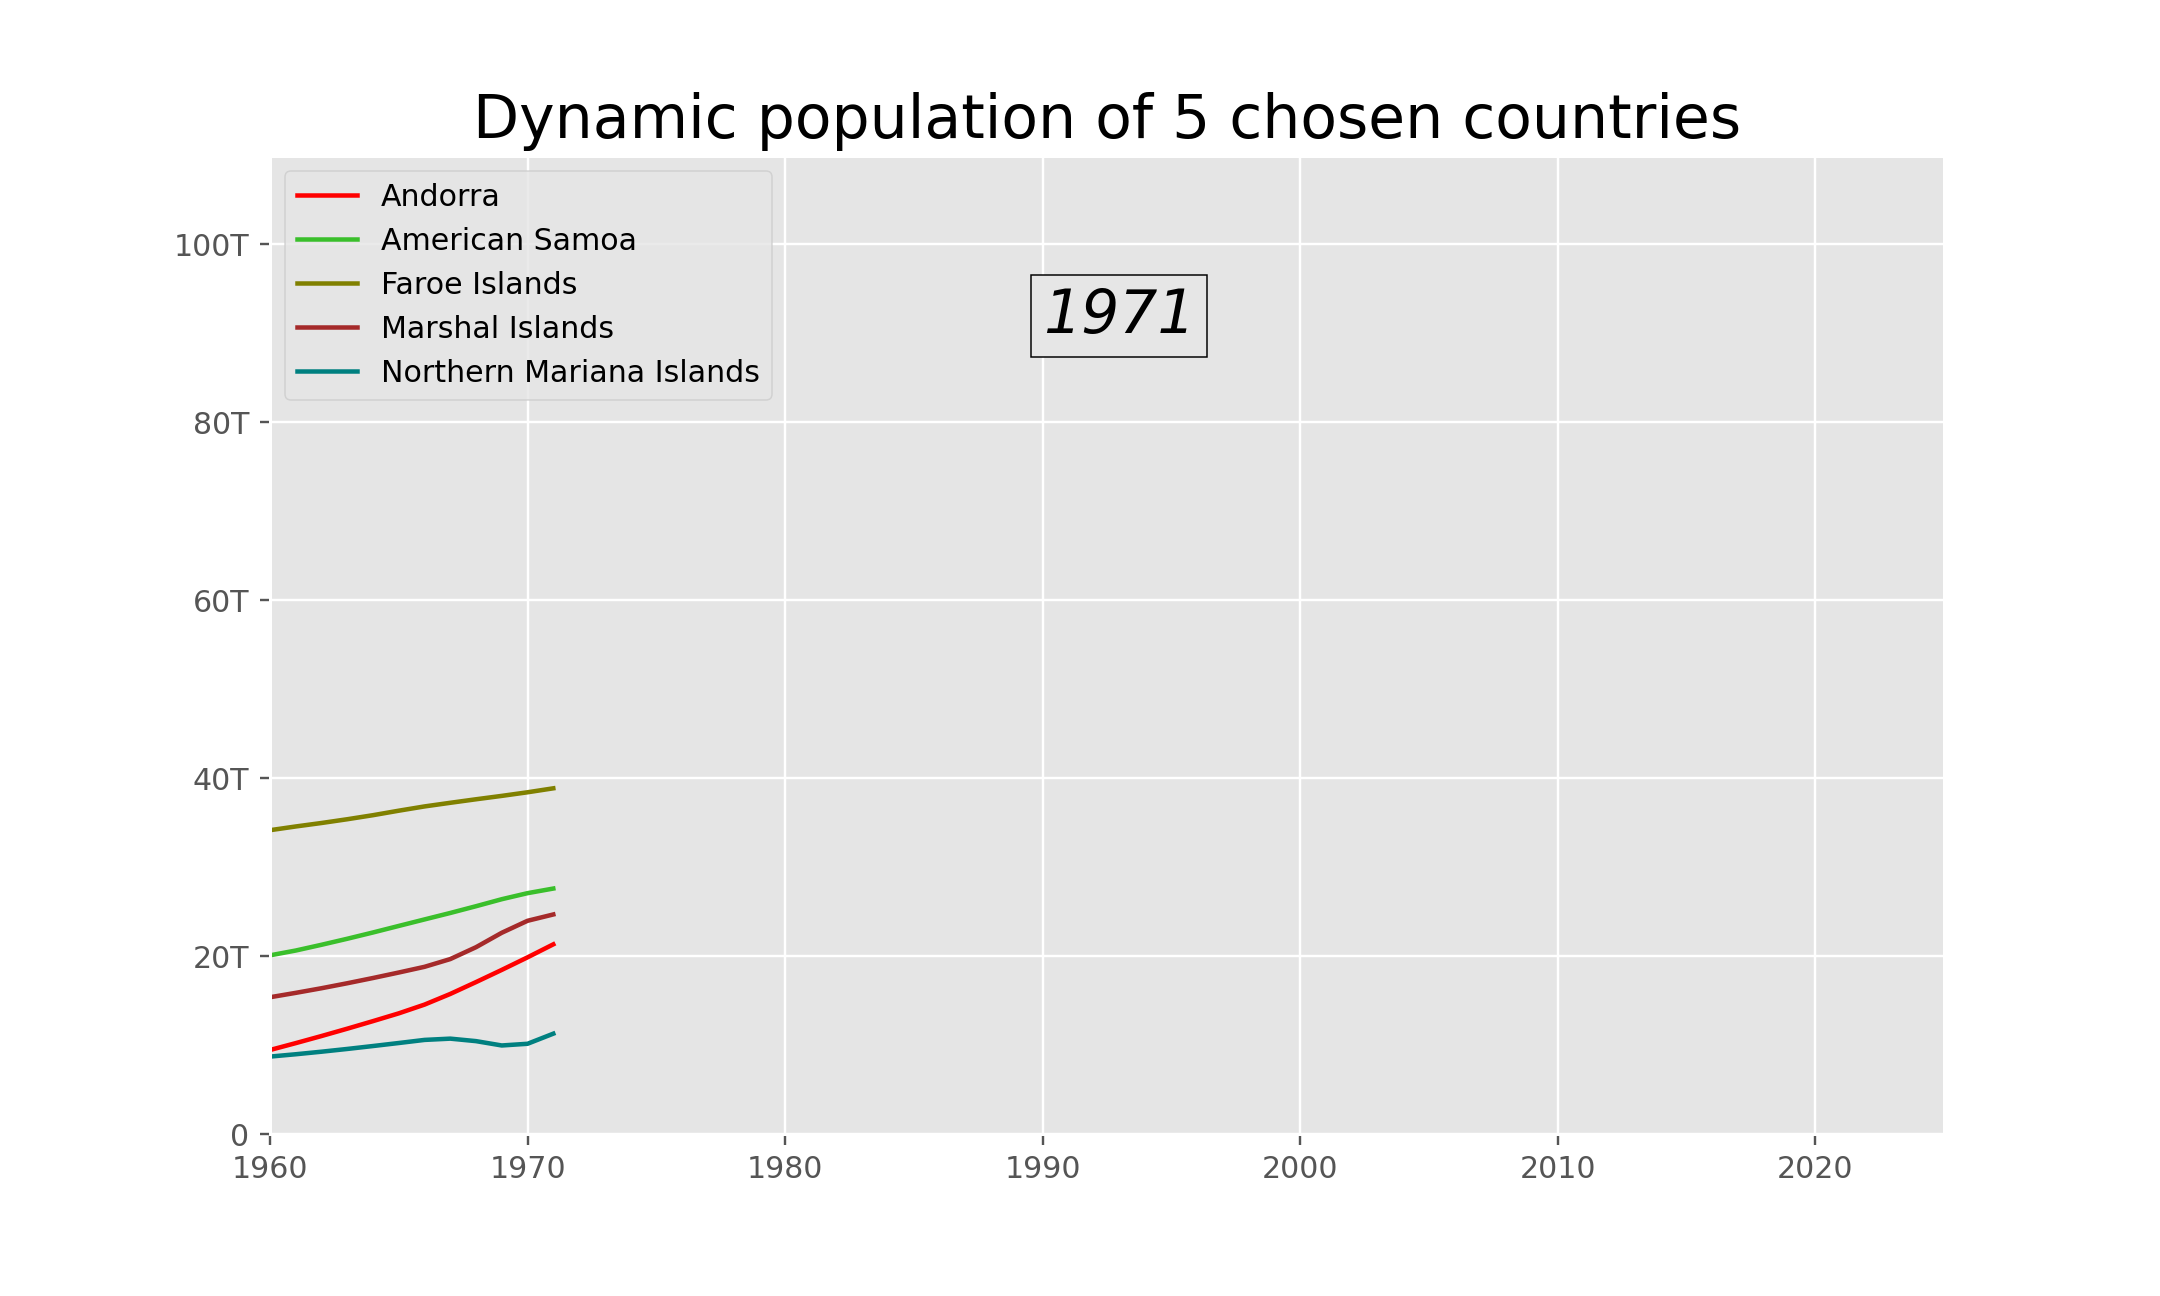

In [25]:
with plt.style.context('ggplot'):
    
    # Looks
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot()
    plt.xlim(1960,2025)
    ax.xaxis.set_ticks(range(1960,2030,10))
    plt.ylim(0,110000)
    ax.yaxis.set_ticks(range(0,110000,20000),
                       labels = ['0','20T','40T','60T','80T','100T'])

    ax.set_title("Dynamic population of 5 chosen countries", fontsize=20)

    andora_line, = ax.plot([],[],color='red',label="Andorra")
    andora_data = [[],[]]
    
    amsamoa_line, = ax.plot([],[],color='#3ABF2B', label="American Samoa")
    amsamoa_data = [[],[]]
    
    farislands_line, = ax.plot([],[],color='olive', label="Faroe Islands")
    farislands_data = [[],[]]
    
    marshislands_line, = ax.plot([],[],color='brown', label="Marshal Islands")
    marshislands_data = [[],[]]
    
    nmarislands_line, = ax.plot([],[],color='teal', label="Northern Mariana Islands")
    nmarislands_data = [[],[]]
    
    ax.legend(loc="upper left")
    
    
    text = ax.text(1990,90000,'', fontsize = 20,
                   bbox = dict(facecolor = (0.9,0.9,0.9),edgecolor="black"),
                  fontstyle = 'italic')

    # Function
    def update(year):
        
        andora_data[0].append(year)
        andora_data[1].append(df2.loc["Andorra"][f"{year}"])
        amsamoa_data[0].append(year)
        amsamoa_data[1].append(df2.loc["American Samoa"][f"{year}"])
        farislands_data[0].append(year)
        farislands_data[1].append(df2.loc["Faroe Islands"][f"{year}"])
        marshislands_data[0].append(year)
        marshislands_data[1].append(df2.loc["Marshall Islands"][f"{year}"])
        nmarislands_data[0].append(year)
        nmarislands_data[1].append(df2.loc["Northern Mariana Islands"][f"{year}"])
        
        andora_line.set_data(andora_data[0],andora_data[1])
        amsamoa_line.set_data(amsamoa_data[0],amsamoa_data[1])
        farislands_line.set_data(farislands_data[0],farislands_data[1])
        marshislands_line.set_data(marshislands_data[0],marshislands_data[1])
        nmarislands_line.set_data(nmarislands_data[0],nmarislands_data[1])
        
        text.set_text(f"{year}")
        
        return andora_line,amsamoa_line,farislands_line,marshislands_line,nmarislands_line, text
    
    
    animation = FuncAnimation(fig,update,range(1960,2022),interval=200,repeat=False,blit=True)
    plt.show()
    

### c) Population of countries close to Poland

Let's remind ourselves of the dataframe we're going to use. We use Poland as the 'centroid' and once again, we leave 2011 as our centroid year (we do NOT random-generate it) 

In [49]:
df3

Country Code     Indicator Name Indicator Code        1960  \
Country Name                                                              
Argentina             ARG  Population, total    SP.POP.TOTL  20349744.0   
Canada                CAN  Population, total    SP.POP.TOTL  17909356.0   
Algeria               DZA  Population, total    SP.POP.TOTL  11394307.0   
Poland                POL  Population, total    SP.POP.TOTL  29637450.0   
Sudan                 SDN  Population, total    SP.POP.TOTL   8326462.0   

                    1961        1962        1963        1964        1965  \
Country Name                                                               
Argentina     20680653.0  21020359.0  21364017.0  21708487.0  22053661.0   
Canada        18271000.0  18614000.0  18964000.0  19325000.0  19678000.0   
Algeria       11598608.0  11778260.0  11969451.0  12179099.0  12381256.0   
Poland        29964000.0  30308500.0  30712000.0  31139450.0  31444950.0   
Sudan          8577490.0   8841338.0   9115091.0   9406702.0   9712785.0   

                    1966  ...        2012        2013        2014        2015  \
Country Name              ...                                                   
Argentina     22403116.0  ...  41733271.0  42202935.0  42669500.0  43131966.0   
Canada        20048000.0  ...  34714222.0  35082954.0  35437435.0  35702908.0   
Algeria       12613389.0  ...  37260563.0  38000626.0  38760168.0  39543154.0   
Poland        31681000.0  ...  38063164.0  38040196.0  38011735.0  37986412.0   
Sudan         10014505.0  ...  35159792.0  35990704.0  37003245.0  38171178.0   

                    2016        2017        2018        2019        2020  \
Country Name                                                               
Argentina     43590368.0  44044811.0  44494502.0  44938712.0  45376763.0   
Canada        36109487.0  36545236.0  37065084.0  37601230.0  38037204.0   
Algeria       40339329.0  41136546.0  41927007.0  42705368.0  43451666.0   
Poland        37970087.0  37974826.0  37974750.0  37965475.0  37899070.0   
Sudan         39377169.0  40679828.0  41999059.0  43232093.0  44440486.0   

                    2021  
Country Name              
Argentina     45808747.0  
Canada        38246108.0  
Algeria       44177969.0  
Poland        37747124.0  
Sudan         45657202.0  

[5 rows x 65 columns]

<IPython.core.display.Javascript object>


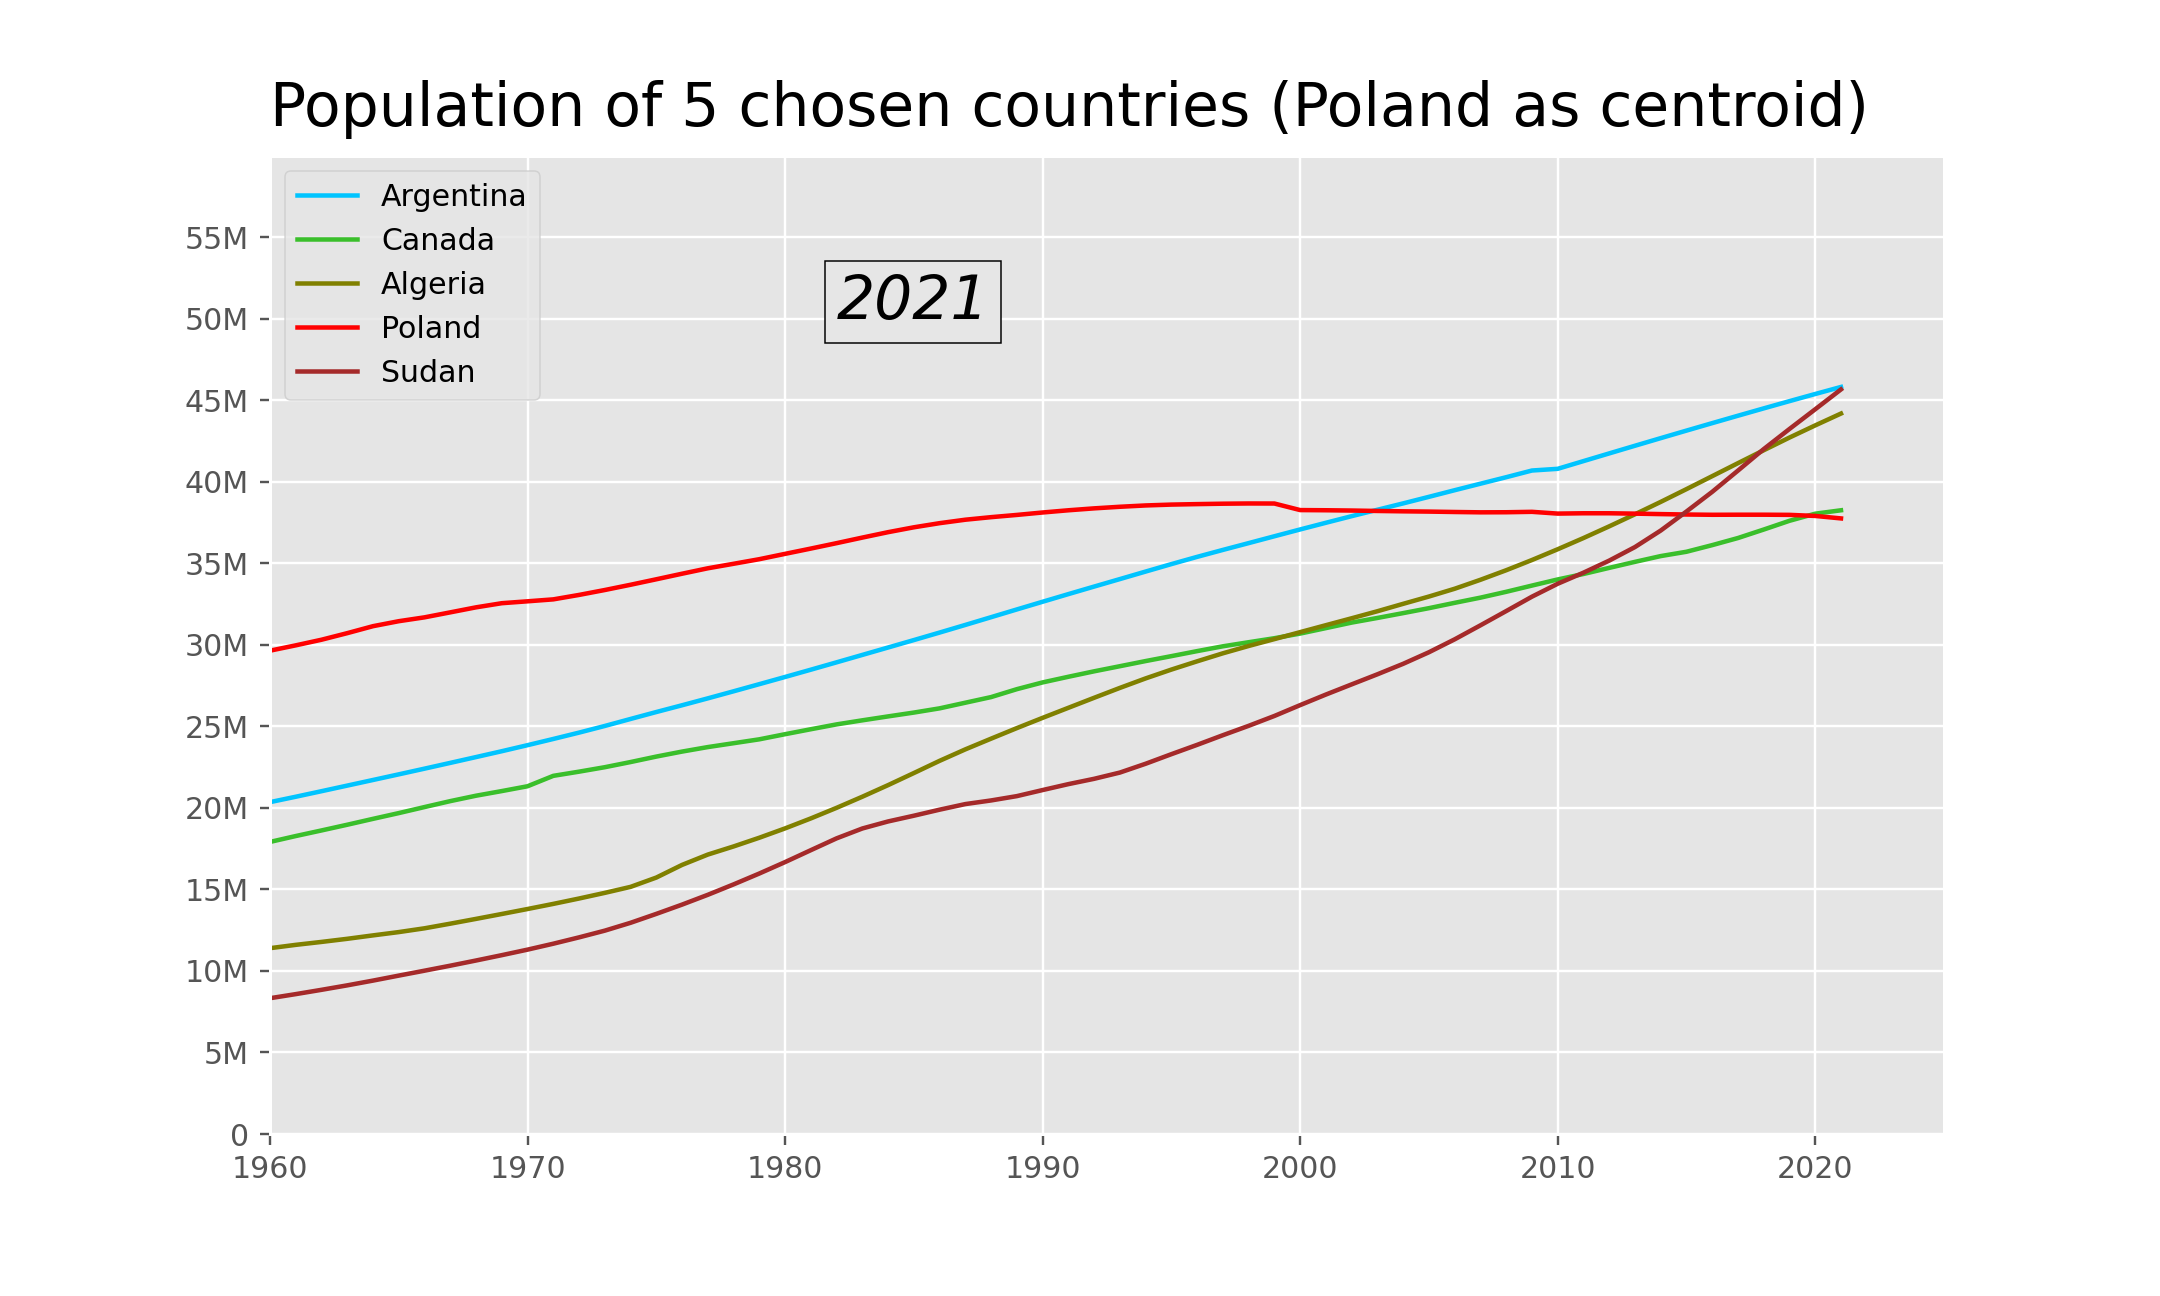

In [355]:
with plt.style.context('ggplot'):
    
    # Looks
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot()
    plt.xlim(1960,2025)
    ax.xaxis.set_ticks(range(1960,2030,10))
    plt.ylim(0,60000000)
    ax.yaxis.set_ticks(range(0,60000000,5000000),
                       labels = ['0','5M','10M','15M','20M','25M','30M','35M','40M','45M','50M','55M'],
                      fontsize=10)

    ax.set_title('Population of 5 chosen countries (Poland as centroid)',
                 loc='left',
                 pad = 10,
                fontsize=20)
    
    arg_line, = ax.plot([],[],color='#00C4FF',label="Argentina")
    arg_data = [[],[]]
    
    canada_line, = ax.plot([],[],color='#3ABF2B', label="Canada")
    canada_data = [[],[]]
    
    algeria_line, = ax.plot([],[],color='olive', label="Algeria")
    algeria_data = [[],[]]
    
    poland_line, = ax.plot([],[],color='red', label="Poland")
    poland_data = [[],[]]
    
    sudan_line, = ax.plot([],[],color='brown', label="Sudan")
    sudan_data = [[],[]]
    
    ax.legend(loc="upper left")
    
    
    text = ax.text(1982,50000000,'', fontsize = 20,
                   bbox = dict(facecolor = (0.9,0.9,0.9),edgecolor="black"),
                  fontstyle = 'italic')

    # Function
    def update(year):
        
        arg_data[0].append(year)
        arg_data[1].append(df3.loc["Argentina"][f"{year}"])
        canada_data[0].append(year)
        canada_data[1].append(df3.loc["Canada"][f"{year}"])
        algeria_data[0].append(year)
        algeria_data[1].append(df3.loc["Algeria"][f"{year}"])
        poland_data[0].append(year)
        poland_data[1].append(df3.loc["Poland"][f"{year}"])
        sudan_data[0].append(year)
        sudan_data[1].append(df3.loc["Sudan"][f"{year}"])
        
        arg_line.set_data(arg_data[0],arg_data[1])
        canada_line.set_data(canada_data[0],canada_data[1])
        algeria_line.set_data(algeria_data[0],algeria_data[1])
        poland_line.set_data(poland_data[0],poland_data[1])
        sudan_line.set_data(sudan_data[0],sudan_data[1])
        
        text.set_text(f"{year}")
        
        return arg_line,canada_line,algeria_line,poland_line,sudan_line, text
    
    
    animation = FuncAnimation(fig,update,range(1960,2022),interval=200,repeat=False,blit=True)
    plt.show()

## 4. Bubble plots

Now our goal is to create, for previously used data, a coresponding bubble plots, so scatter plots with a 3rd dimension, indicted by the point volume (a bubble). This bubble will provide us with information on population density in the given year

For the population density, we will need actual area of the countries, so that we could then take a population and divide it by the area of the coresponding country. For that, we import another dataset from The World Bank.

In [17]:
area = pd.read_csv('API_AG.LND.TOTL.K2_DS2_en_csv_v2_5161402/API_AG.LND.TOTL.K2_DS2_en_csv_v2_5161402.csv',skiprows=4)


In [18]:
area.set_index('Country Name', inplace=True)

In [19]:
area = area[area.index.isin(country_list)]

In [20]:
area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Aruba to Zimbabwe
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    182 non-null    object 
 1   Indicator Name  182 non-null    object 
 2   Indicator Code  182 non-null    object 
 3   1960            0 non-null      float64
 4   1961            179 non-null    float64
 5   1962            179 non-null    float64
 6   1963            179 non-null    float64
 7   1964            179 non-null    float64
 8   1965            179 non-null    float64
 9   1966            179 non-null    float64
 10  1967            179 non-null    float64
 11  1968            179 non-null    float64
 12  1969            179 non-null    float64
 13  1970            179 non-null    float64
 14  1971            179 non-null    float64
 15  1972            179 non-null    float64
 16  1973            179 non-null    float64
 17  1974            179 non-null   

We have some missing values. Lets take care of that:

In [21]:
area.dropna(axis=1, how='all', inplace=True)

In [22]:
area.fillna(0, inplace=True)

In [64]:
area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, Aruba to Zimbabwe
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    181 non-null    object 
 1   Indicator Name  181 non-null    object 
 2   Indicator Code  181 non-null    object 
 3   1961            181 non-null    float64
 4   1962            181 non-null    float64
 5   1963            181 non-null    float64
 6   1964            181 non-null    float64
 7   1965            181 non-null    float64
 8   1966            181 non-null    float64
 9   1967            181 non-null    float64
 10  1968            181 non-null    float64
 11  1969            181 non-null    float64
 12  1970            181 non-null    float64
 13  1971            181 non-null    float64
 14  1972            181 non-null    float64
 15  1973            181 non-null    float64
 16  1974            181 non-null    float64
 17  1975            181 non-null   

We removed the columns that 'contained' only a missing values. As for the rest missing values, they are now replaced with a '0', which should make sense- we treat such a country as a non-existent.

### a) Top 5 populated countries

In [65]:
df

Country Code     Indicator Name Indicator Code         1960  \
Country Name                                                                
China                  CHN  Population, total    SP.POP.TOTL  667070000.0   
Indonesia              IDN  Population, total    SP.POP.TOTL   88382881.0   
India                  IND  Population, total    SP.POP.TOTL  445954579.0   
Pakistan               PAK  Population, total    SP.POP.TOTL   45954226.0   
United States          USA  Population, total    SP.POP.TOTL  180671000.0   

                      1961         1962         1963         1964  \
Country Name                                                        
China          660330000.0  665770000.0  682335000.0  698355000.0   
Indonesia       90816938.0   93345489.0   95962527.0   98675061.0   
India          456351876.0  467024193.0  477933619.0  489059309.0   
Pakistan        47060915.0   48161841.0   49325050.0   50552592.0   
United States  183691000.0  186538000.0  189242000.0  191889000.0   

                      1965         1966  ...          2012          2013  \
Country Name                             ...                               
China          715185000.0  735400000.0  ...  1.354190e+09  1.363240e+09   
Indonesia      101157868.0  103561105.0  ...  2.502227e+08  2.532759e+08   
India          500114346.0  510992617.0  ...  1.274487e+09  1.291132e+09   
Pakistan        51841626.0   53199414.0  ...  2.022059e+08  2.053376e+08   
United States  194303000.0  196560000.0  ...  3.138777e+08  3.160599e+08   

                       2014          2015          2016          2017  \
Country Name                                                            
China          1.371860e+09  1.379860e+09  1.387790e+09  1.396215e+09   
Indonesia      2.562298e+08  2.590920e+08  2.618502e+08  2.644989e+08   
India          1.307247e+09  1.322867e+09  1.338636e+09  1.354196e+09   
Pakistan       2.082516e+08  2.109693e+08  2.135248e+08  2.163797e+08   
United States  3.183863e+08  3.207390e+08  3.230718e+08  3.251221e+08   

                       2018          2019          2020          2021  
Country Name                                                           
China          1.402760e+09  1.407745e+09  1.411100e+09  1.412360e+09  
Indonesia      2.670668e+08  2.695829e+08  2.718580e+08  2.737532e+08  
India          1.369003e+09  1.383112e+09  1.396387e+09  1.407564e+09  
Pakistan       2.197315e+08  2.232933e+08  2.271967e+08  2.314021e+08  
United States  3.268382e+08  3.283300e+08  3.315011e+08  3.318937e+08  

[5 rows x 65 columns]

For every country, lets prepare a separate dataframe, with population, area and density for every year 

In [105]:
new_dfs = []
for i in range(5):
    new_dfs.append(pd.concat([df.iloc[i]['1961':'2020'],area.loc[df.index[i]]["1961":"2020"]],axis=1))
    new_dfs[i].columns = ["Population", "Area"]
    new_dfs[i]["Density"] = (new_dfs[i]["Population"])/(new_dfs[i]["Area"])
    new_dfs[i] = new_dfs[i].convert_dtypes()

In [107]:
china_df = new_dfs[0]
indo_df = new_dfs[1]
india_df = new_dfs[2]
pak_df = new_dfs[3]
usa_df = new_dfs[4]

In [195]:
china_df

Population       Area     Density
1961   660330000  9424700.0   70.063769
1962   665770000  9424700.0   70.640975
1963   682335000  9424700.0   72.398591
1964   698355000  9424700.0   74.098380
1965   715185000  9424700.0   75.884113
1966   735400000  9424700.0   78.029009
1967   754550000  9424700.0   80.060904
1968   774510000  9424700.0   82.178743
1969   796025000  9424700.0   84.461574
1970   818315000  9424700.0   86.826636
1971   841105000  9424700.0   89.244750
1972   862030000  9424700.0   91.464980
1973   881940000  9424700.0   93.577514
1974   900350000  9424700.0   95.530892
1975   916395000  9424690.0   97.233437
1976   930685000  9424690.0   98.749667
1977   943455000  9424680.0  100.104725
1978   956165000  9424680.0  101.453312
1979   969005000  9424680.0  102.815692
1980   981235000  9424680.0  104.113349
1981   993885000  9424680.0  105.455570
1982  1008630000  9424670.0  107.020193
1983  1023310000  9424670.0  108.577807
1984  1036825000  9424670.0  110.011809
1985  1051040000  9424670.0  111.520085
1986  1066790000  9424670.0  113.191231
1987  1084035000  9424670.0  115.021003
1988  1101630000  9424670.0  116.887912
1989  1118650000  9424670.0  118.693811
1990  1135185000  9424670.0  120.448249
1991  1150780000  9424670.0  122.102949
1992  1164970000  9424670.0  123.608572
1993  1178440000  9424670.0  125.037800
1994  1191835000  9424670.0  126.459070
1995  1204855000  9424720.0  127.839872
1996  1217550000  9424710.0  129.186999
1997  1230075000  9424710.0  130.515952
1998  1241935000  9424710.0  131.774346
1999  1252735000  9424710.0  132.920270
2000  1262645000  9424700.0  133.971904
2001  1271850000  9424700.2  134.948590
2002  1280400000  9424700.2  135.855780
2003  1288400000  9424699.7  136.704621
2004  1296075000  9424700.5  137.518959
2005  1303720000  9424699.8  138.330135
2006  1311020000  9424700.0  139.104693
2007  1317885000  9424700.0  139.833098
2008  1324655000  9424700.0  140.551423
2009  1331260000  9424700.5  141.252234
2010  1337705000  9424700.7  141.936072
2011  1345035000  9424700.9  142.713813
2012  1354190000  9424700.9  143.685196
2013  1363240000  9424701.3  144.645433
2014  1371860000  9424701.3  145.560051
2015  1379860000  9424701.4  146.408883
2016  1387790000  9424700.5  147.250303
2017  1396215000  9424700.8  148.144225
2018  1402760000  9424702.9  148.838644
2019  1407745000  9424702.9  149.367573
2020  1411100000  9424702.9  149.723553

We will generate bubbles for every 10 years passing from 1961 (up to 2020, where our data ends), since the bubble plot containing as much as 59 bubbles (one for EVERY year), for each of five countries (making it 295 bubbles in total), would be disgusting and illegible.

<IPython.core.display.Javascript object>


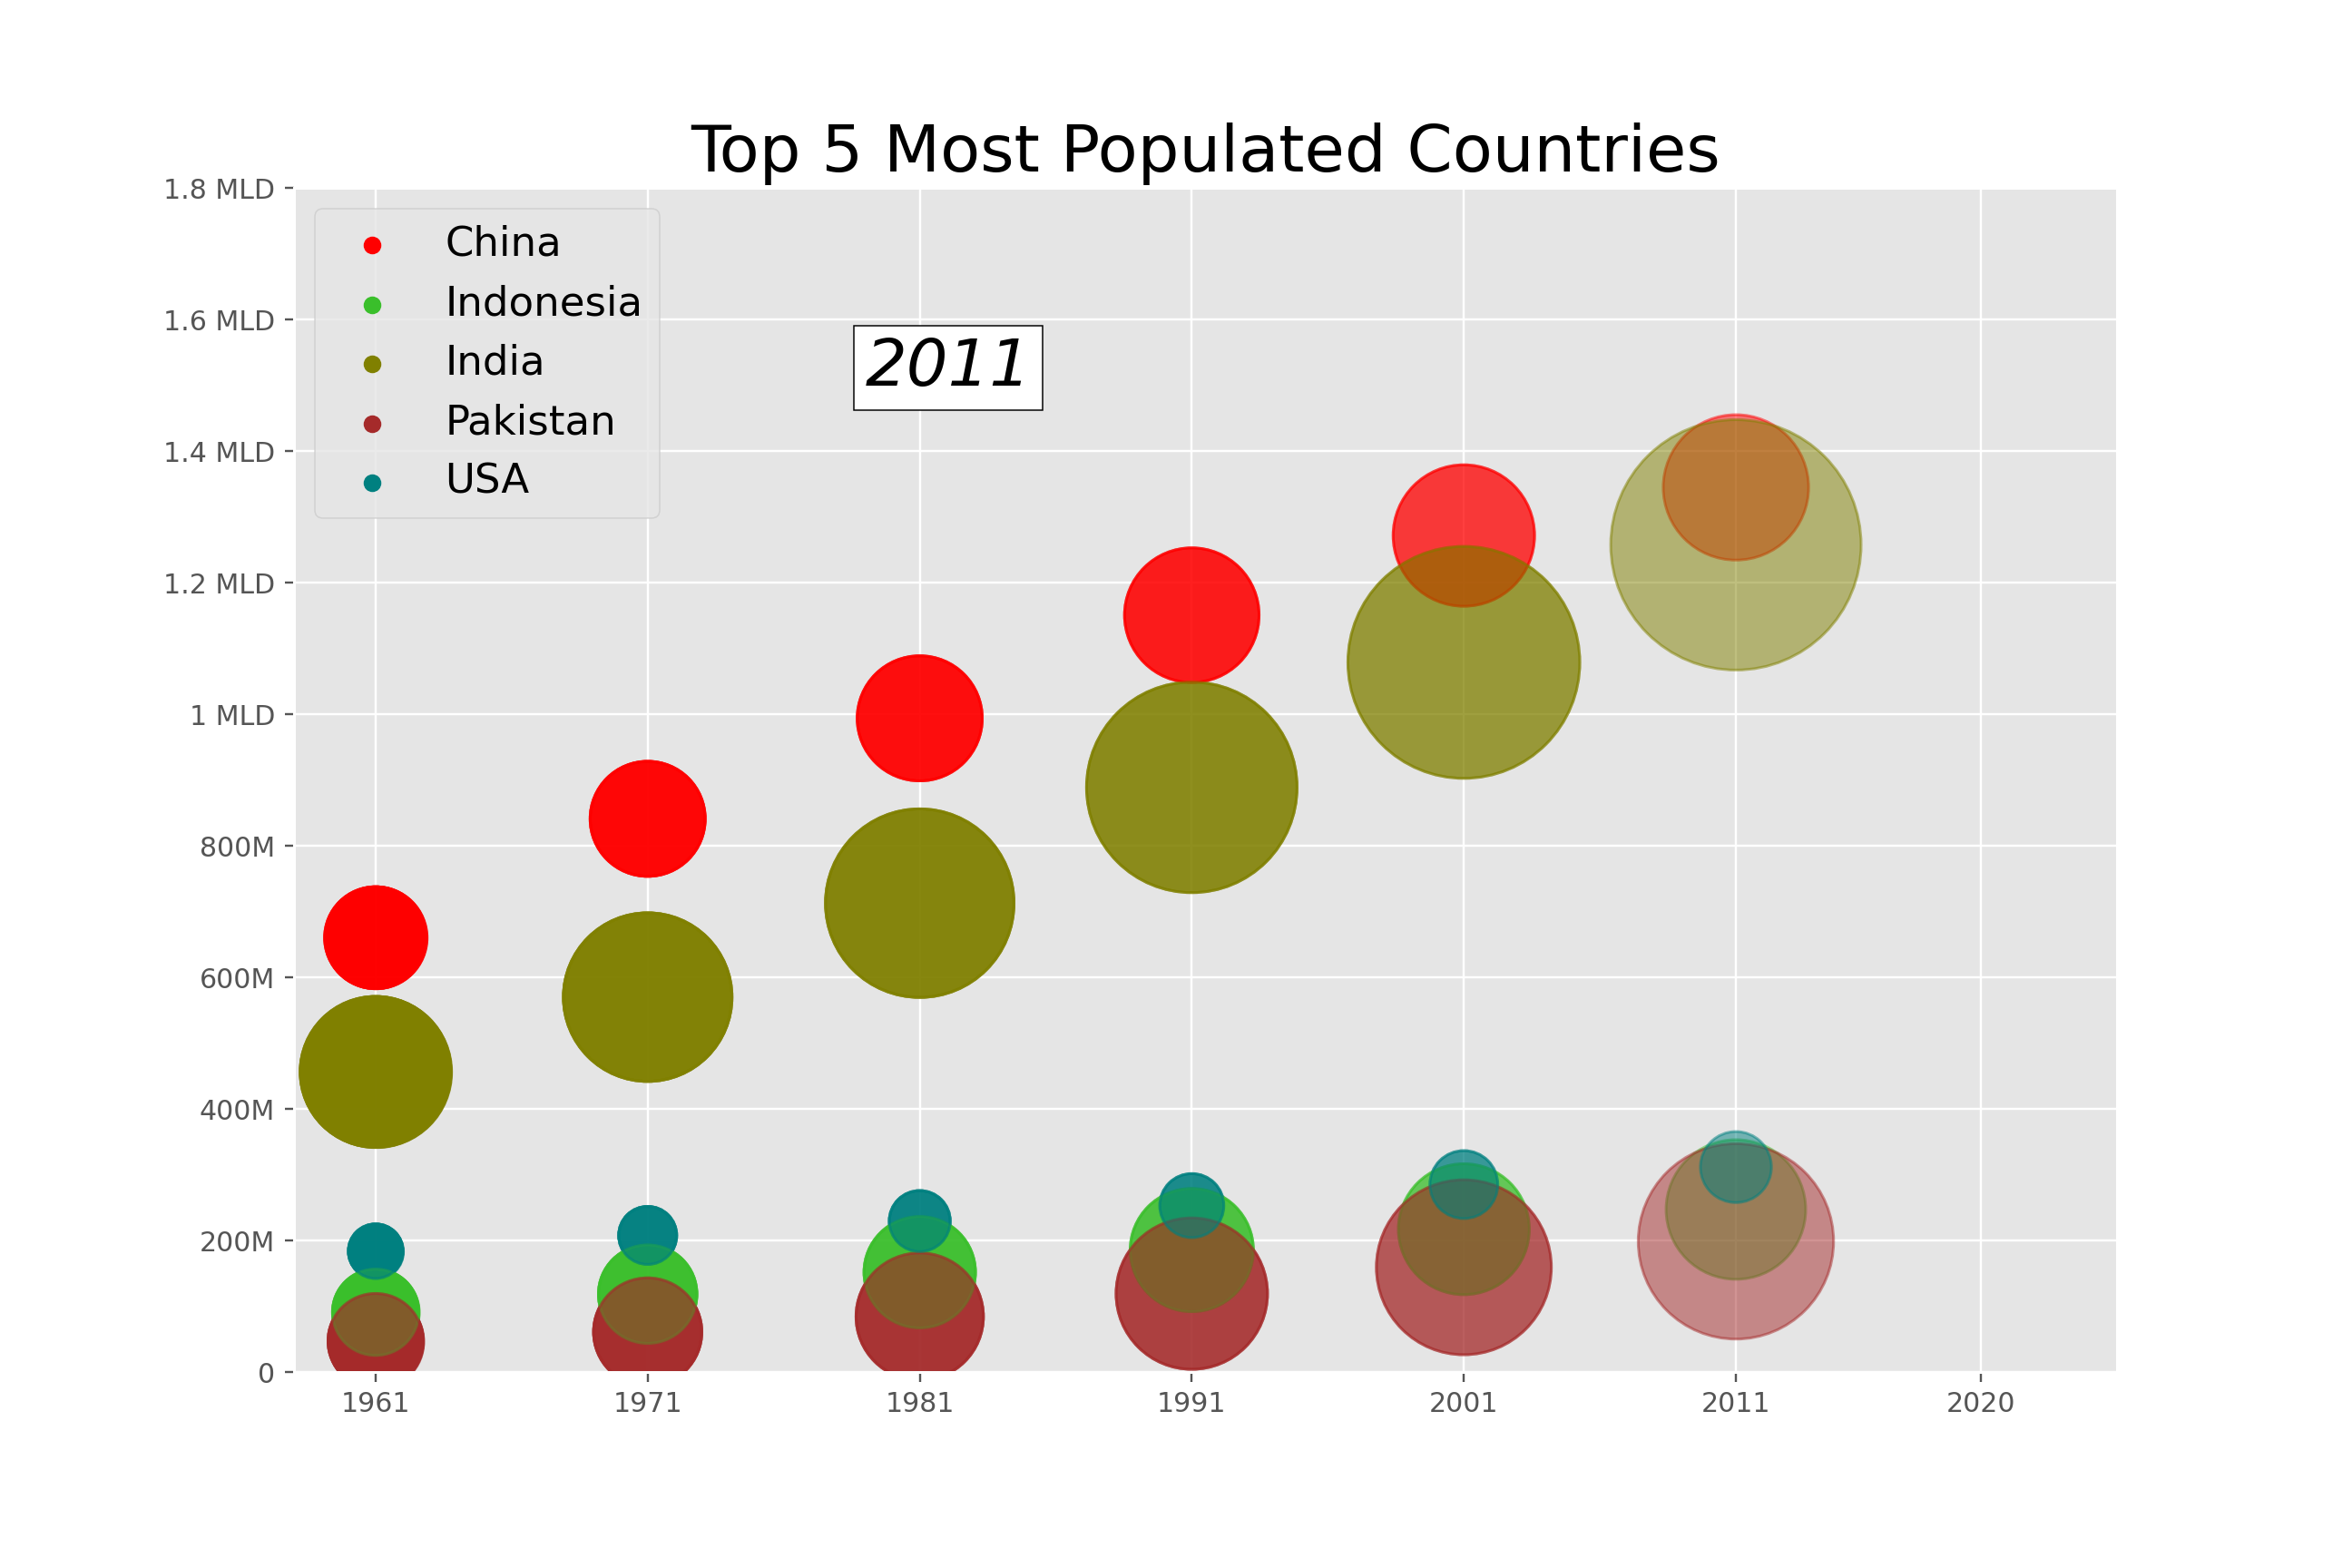

In [193]:
with plt.style.context("ggplot"):
    
    """
    Once again, I will not include Country Tags, since the bubble plot 
    even now is barely readable. The Tags would inevitably generate on
    top of each other, resulting in a visual catastrophe...
    The same goes for the next bubble plots.
    """

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot()
    plt.ylim(0,1800000000)
    ax.yaxis.set_ticks(range(0,1800000001,200000000),
                      labels=['0','200M','400M','600M','800M','1 MLD','1.2 MLD','1.4 MLD','1.6 MLD','1.8 MLD'])
    ax.set_title("Top 5 Most Populated Countries", fontsize=24)
    plt.xlim(1958,2025)
    ax.xaxis.set_ticks([i for i in range(1961,2021,10)]+[2020])
    text = ax.text(1979,1500000000,"",
            bbox = dict(facecolor = 'white',edgecolor="black"),
           fontsize=24, fontstyle="italic")
    
    # For the legend
    ax.scatter(x=[0],y=[0],color='red',label='China')
    ax.scatter(x=[0],y=[0],color='#3ABF2B',label='Indonesia')
    ax.scatter(x=[0],y=[0],color='olive',label='India')
    ax.scatter(x=[0],y=[0],color='brown',label='Pakistan')
    ax.scatter(x=[0],y=[0],color='teal',label='USA')
                    
    ax.legend(loc="upper left", fontsize=15)

    def update(year):
        
        
        if year == 2020:
            
            a = [i for i in range(0,year-1960,10)] + [len(china_df)-1]
            
            # China
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=china_df["Population"].values[a],
                       s=china_df["Density"].values[a]*20,
                       alpha = 0.5, color='red', label="China")
            # Indonesia
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=indo_df["Population"].values[a],
                       s=indo_df["Density"].values[a]*20,
                       alpha = 0.5, color='#3ABF2B',label="Indonesia")
            # India
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=india_df["Population"].values[a],
                       s=india_df["Density"].values[a]*20,
                       alpha = 0.5, color='olive', label="India")
            # Pakistan
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=pak_df["Population"].values[a],
                       s=pak_df["Density"].values[a]*20,
                       alpha = 0.5, color='brown', label="Pakistan")
            # USA
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=usa_df["Population"].values[a],
                       s=usa_df["Density"].values[a]*20,
                       alpha = 0.5, color='teal', label="USA")
        else:
            
            a = [i for i in range(0,year-1960,10)]
            
            # China
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=china_df["Population"].values[a],
                       s=china_df["Density"].values[a]*20,
                       alpha = 0.5, color='red', label="China")
            # Indonesia
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=indo_df["Population"].values[a],
                       s=indo_df["Density"].values[a]*20,
                       alpha = 0.5, color='#3ABF2B',label="Indonesia")
            # India
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=india_df["Population"].values[a],
                       s=india_df["Density"].values[a]*20,
                       alpha = 0.5, color='olive', label="India")
            # Pakistan
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=pak_df["Population"].values[a],
                       s=pak_df["Density"].values[a]*20,
                       alpha = 0.5, color='brown', label="Pakistan")
            # USA
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=usa_df["Population"].values[a],
                       s=usa_df["Density"].values[a]*20,
                       alpha = 0.5, color='teal', label="USA")
        
        text.set_text(f"{year}")
    
    
    animate = FuncAnimation(fig, update,
                            [i for i in range(1961,2021,10)]+[2020],
                            interval=1000, repeat=False, blit=True)
        
    plt.show()

### b) Chosen country as a centroid

In [194]:
df2

Country Code     Indicator Name Indicator Code  \
Country Name                                                              
Andorra                           AND  Population, total    SP.POP.TOTL   
American Samoa                    ASM  Population, total    SP.POP.TOTL   
Faroe Islands                     FRO  Population, total    SP.POP.TOTL   
Marshall Islands                  MHL  Population, total    SP.POP.TOTL   
Northern Mariana Islands          MNP  Population, total    SP.POP.TOTL   

                             1960     1961     1962     1963     1964  \
Country Name                                                            
Andorra                    9443.0  10216.0  11014.0  11839.0  12690.0   
American Samoa            20085.0  20626.0  21272.0  21949.0  22656.0   
Faroe Islands             34154.0  34572.0  34963.0  35385.0  35841.0   
Marshall Islands          15374.0  15867.0  16387.0  16947.0  17537.0   
Northern Mariana Islands   8702.0   8965.0   9252.0   9561.0   9890.0   

                             1965     1966  ...     2012     2013     2014  \
Country Name                                ...                              
Andorra                   13563.0  14546.0  ...  71013.0  71367.0  71621.0   
American Samoa            23391.0  24122.0  ...  53691.0  52995.0  52217.0   
Faroe Islands             36346.0  36825.0  ...  48392.0  48418.0  48465.0   
Marshall Islands          18154.0  18794.0  ...  52203.0  51352.0  50419.0   
Northern Mariana Islands  10229.0  10577.0  ...  52359.0  52141.0  51856.0   

                             2015     2016     2017     2018     2019  \
Country Name                                                            
Andorra                   71746.0  72540.0  73837.0  75013.0  76343.0   
American Samoa            51368.0  50448.0  49463.0  48424.0  47321.0   
Faroe Islands             48816.0  49500.0  50230.0  50955.0  51681.0   
Marshall Islands          49410.0  48329.0  47187.0  45989.0  44728.0   
Northern Mariana Islands  51514.0  51133.0  50729.0  50304.0  49858.0   

                             2020     2021  
Country Name                                
Andorra                   77700.0  79034.0  
American Samoa            46189.0  45035.0  
Faroe Islands             52415.0  52889.0  
Marshall Islands          43413.0  42050.0  
Northern Mariana Islands  49587.0  49481.0  

[5 rows x 65 columns]

In [203]:
new_dfs2 = []
for i in range(5):
    new_dfs2.append(pd.concat([df2.iloc[i]['1961':'2020'],area.loc[df2.index[i]]["1961":"2020"]],axis=1))
    new_dfs2[i].columns = ["Population", "Area"]
    new_dfs2[i]["Density"] = (new_dfs2[i]["Population"])/(new_dfs2[i]["Area"])
    new_dfs2[i] = new_dfs2[i].convert_dtypes()

In [204]:
andora_df = new_dfs2[0]
amsamoa_df = new_dfs2[1]
farislands_df = new_dfs2[2]
marshislands_df = new_dfs2[3]
nmarislands_df = new_dfs2[4]

In [208]:
marshislands_df

Population  Area     Density
1961       15867   180   88.150000
1962       16387   180   91.038889
1963       16947   180   94.150000
1964       17537   180   97.427778
1965       18154   180  100.855556
1966       18794   180  104.411111
1967       19665   180  109.250000
1968       21001   180  116.672222
1969       22623   180  125.683333
1970       23969   180  133.161111
1971       24680   180  137.111111
1972       25084   180  139.355556
1973       25522   180  141.788889
1974       26174   180  145.411111
1975       27047   180  150.261111
1976       27964   180  155.355556
1977       28912   180  160.622222
1978       29892   180  166.066667
1979       30902   180  171.677778
1980       31988   180  177.711111
1981       33219   180  184.550000
1982       34569   180  192.050000
1983       35975   180  199.861111
1984       37437   180  207.983333
1985       38962   180  216.455556
1986       40527   180  225.150000
1987       42122   180  234.011111
1988       43687   180  242.705556
1989       44988   180  249.933333
1990       46047   180  255.816667
1991       47053   180  261.405556
1992       48015   180  266.750000
1993       48944   180  271.911111
1994       49840   180  276.888889
1995       50702   180  281.677778
1996       51538   180  286.322222
1997       52358   180  290.877778
1998       53164   180  295.355556
1999       53834   180  299.077778
2000       54224   180  301.244444
2001       54413   180  302.294444
2002       54496   180  302.755556
2003       54493   180  302.738889
2004       54435   180  302.416667
2005       54337   180  301.872222
2006       54208   180  301.155556
2007       54038   180  300.211111
2008       53816   180  298.977778
2009       53593   180  297.738889
2010       53416   180  296.755556
2011       52971   180  294.283333
2012       52203   180  290.016667
2013       51352   180  285.288889
2014       50419   180  280.105556
2015       49410   180  274.500000
2016       48329   180  268.494444
2017       47187   180  262.150000
2018       45989   180  255.494444
2019       44728   180  248.488889
2020       43413   180  241.183333

<IPython.core.display.Javascript object>


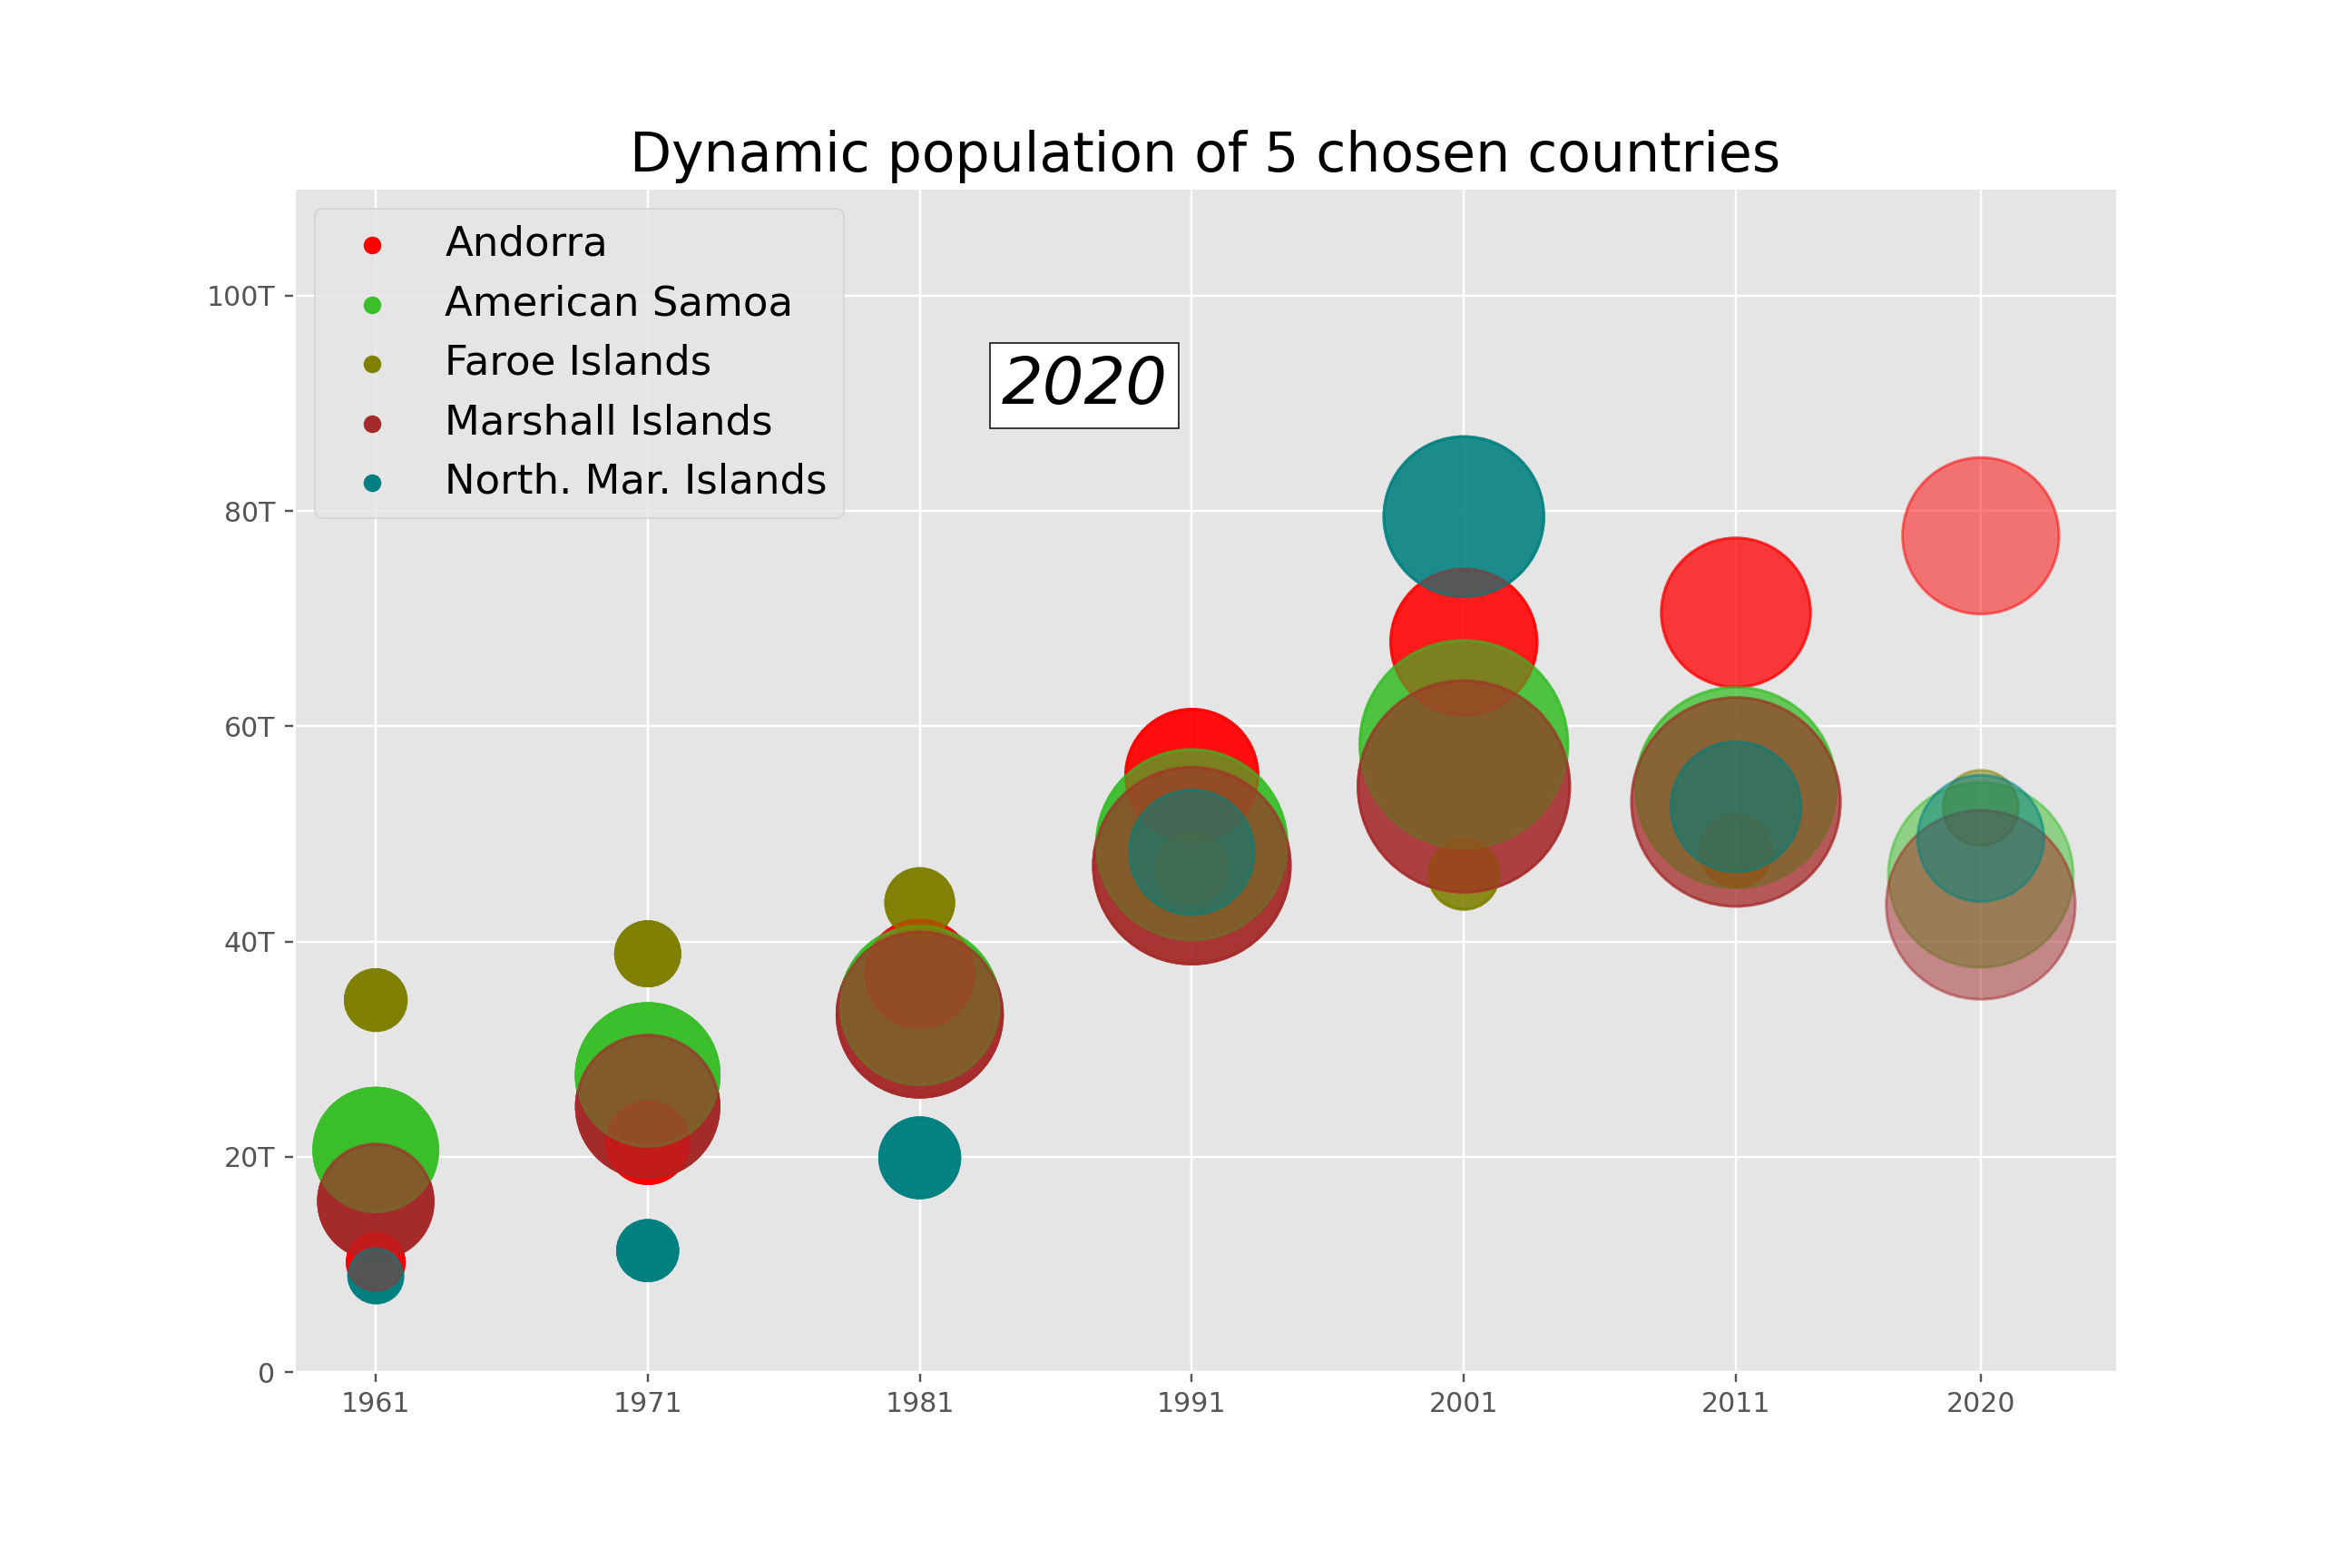

In [236]:
with plt.style.context("ggplot"):

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot()
    plt.ylim(0,110000)
    ax.yaxis.set_ticks(range(0,110000,20000),
                       labels = ['0','20T','40T','60T','80T','100T'])

    ax.set_title("Dynamic population of 5 chosen countries", fontsize=20)
    plt.xlim(1958,2025)
    ax.xaxis.set_ticks([i for i in range(1961,2021,10)]+[2020])
    text = ax.text(1984,90000,"",
            bbox = dict(facecolor = 'white',edgecolor="black"),
           fontsize=24, fontstyle="italic")
    
    # For the legend
    ax.scatter(x=[0],y=[0],color='red',label='Andorra')
    ax.scatter(x=[0],y=[0],color='#3ABF2B',label='American Samoa')
    ax.scatter(x=[0],y=[0],color='olive',label='Faroe Islands')
    ax.scatter(x=[0],y=[0],color='brown',label='Marshall Islands')
    ax.scatter(x=[0],y=[0],color='teal',label='North. Mar. Islands')
                    
    ax.legend(loc="upper left", fontsize=15)

    def update(year):
        
        
        if year == 2020:
            
            a = [i for i in range(0,year-1960,10)] + [len(andora_df)-1]
            
            # Andorra
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=andora_df["Population"].values[a],
                       s=andora_df["Density"].values[a]*20,
                       alpha = 0.5, color='red')
            # American Samoa
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=amsamoa_df["Population"].values[a],
                       s=amsamoa_df["Density"].values[a]*20,
                       alpha = 0.5, color='#3ABF2B')
            # Faroe Islands
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=farislands_df["Population"].values[a],
                       s=farislands_df["Density"].values[a]*20,
                       alpha = 0.5, color='olive')
            # Marshall Islands
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=marshislands_df["Population"].values[a],
                       s=marshislands_df["Density"].values[a]*20,
                       alpha = 0.5, color='brown')
            # Northern Mariana Islands
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=nmarislands_df["Population"].values[a],
                       s=nmarislands_df["Density"].values[a]*20,
                       alpha = 0.5, color='teal')
        else:
            
            a = [i for i in range(0,year-1960,10)]
            
            # Andorra
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=andora_df["Population"].values[a],
                       s=andora_df["Density"].values[a]*20,
                       alpha = 0.5, color='red')
            # American Samoa
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=amsamoa_df["Population"].values[a],
                       s=amsamoa_df["Density"].values[a]*20,
                       alpha = 0.5, color='#3ABF2B')
            # Faroe Islands
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=farislands_df["Population"].values[a],
                       s=farislands_df["Density"].values[a]*20,
                       alpha = 0.5, color='olive')
            # Marshall Islands
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=marshislands_df["Population"].values[a],
                       s=marshislands_df["Density"].values[a]*20,
                       alpha = 0.5, color='brown')
            # Northern Mariana Islands
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=nmarislands_df["Population"].values[a],
                       s=nmarislands_df["Density"].values[a]*20,
                       alpha = 0.5, color='teal')
            
        text.set_text(f"{year}")
    
    
    animate = FuncAnimation(fig, update,
                            [i for i in range(1961,2021,10)]+[2020],
                            interval=1000, repeat=False, blit=True)
        
    plt.show()

### c) Poland as a 'centroid'

In [212]:
df3

Country Code     Indicator Name Indicator Code        1960  \
Country Name                                                              
Argentina             ARG  Population, total    SP.POP.TOTL  20349744.0   
Canada                CAN  Population, total    SP.POP.TOTL  17909356.0   
Algeria               DZA  Population, total    SP.POP.TOTL  11394307.0   
Poland                POL  Population, total    SP.POP.TOTL  29637450.0   
Sudan                 SDN  Population, total    SP.POP.TOTL   8326462.0   

                    1961        1962        1963        1964        1965  \
Country Name                                                               
Argentina     20680653.0  21020359.0  21364017.0  21708487.0  22053661.0   
Canada        18271000.0  18614000.0  18964000.0  19325000.0  19678000.0   
Algeria       11598608.0  11778260.0  11969451.0  12179099.0  12381256.0   
Poland        29964000.0  30308500.0  30712000.0  31139450.0  31444950.0   
Sudan          8577490.0   8841338.0   9115091.0   9406702.0   9712785.0   

                    1966  ...        2012        2013        2014        2015  \
Country Name              ...                                                   
Argentina     22403116.0  ...  41733271.0  42202935.0  42669500.0  43131966.0   
Canada        20048000.0  ...  34714222.0  35082954.0  35437435.0  35702908.0   
Algeria       12613389.0  ...  37260563.0  38000626.0  38760168.0  39543154.0   
Poland        31681000.0  ...  38063164.0  38040196.0  38011735.0  37986412.0   
Sudan         10014505.0  ...  35159792.0  35990704.0  37003245.0  38171178.0   

                    2016        2017        2018        2019        2020  \
Country Name                                                               
Argentina     43590368.0  44044811.0  44494502.0  44938712.0  45376763.0   
Canada        36109487.0  36545236.0  37065084.0  37601230.0  38037204.0   
Algeria       40339329.0  41136546.0  41927007.0  42705368.0  43451666.0   
Poland        37970087.0  37974826.0  37974750.0  37965475.0  37899070.0   
Sudan         39377169.0  40679828.0  41999059.0  43232093.0  44440486.0   

                    2021  
Country Name              
Argentina     45808747.0  
Canada        38246108.0  
Algeria       44177969.0  
Poland        37747124.0  
Sudan         45657202.0  

[5 rows x 65 columns]

In [214]:
new_dfs3 = []
for i in range(5):
    new_dfs3.append(pd.concat([df3.iloc[i]['1961':'2020'],area.loc[df3.index[i]]["1961":"2020"]],axis=1))
    new_dfs3[i].columns = ["Population", "Area"]
    new_dfs3[i]["Density"] = (new_dfs3[i]["Population"])/(new_dfs3[i]["Area"])
    new_dfs3[i] = new_dfs3[i].convert_dtypes()

In [215]:
arg_df = new_dfs3[0]
canada_df = new_dfs3[1]
algeria_df = new_dfs3[2]
poland_df = new_dfs3[3]
sudan_df = new_dfs3[4]

In [216]:
arg_df

Population     Area    Density
1961    20680653  2736690   7.556812
1962    21020359  2736690   7.680943
1963    21364017  2736690   7.806517
1964    21708487  2736690   7.932388
1965    22053661  2736690   8.058516
1966    22403116  2736690   8.186209
1967    22757014  2736690   8.315525
1968    23112971  2736690   8.445593
1969    23472028  2736690   8.576795
1970    23842803  2736690   8.712278
1971    24223379  2736690   8.851342
1972    24612794  2736690   8.993636
1973    25020588  2736690   9.142646
1974    25449754  2736690   9.299465
1975    25875558  2736690   9.455056
1976    26290257  2736690   9.606589
1977    26713780  2736690   9.761347
1978    27146121  2736690   9.919326
1979    27584134  2736690  10.079378
1980    28024803  2736690  10.240401
1981    28471285  2736690  10.403548
1982    28922762  2736690  10.568520
1983    29377137  2736690  10.734550
1984    29832197  2736690  10.900832
1985    30287112  2736690  11.067060
1986    30748326  2736690  11.235590
1987    31216453  2736690  11.406646
1988    31690792  2736690  11.579971
1989    32165766  2736690  11.753529
1990    32637657  2736690  11.925961
1991    33105763  2736690  12.097009
1992    33568285  2736690  12.266017
1993    34027240  2736690  12.433721
1994    34488696  2736690  12.602339
1995    34946110  2736690  12.769481
1996    35389362  2736690  12.931447
1997    35815971  2736690  13.087332
1998    36233195  2736690  13.239788
1999    36653031  2736690  13.393198
2000    37070774  2736690  13.545843
2001    37480493  2736690  13.695557
2002    37885028  2736690  13.843376
2003    38278164  2736690  13.987030
2004    38668796  2736690  14.129768
2005    39070501  2736690  14.276553
2006    39476851  2736690  14.425036
2007    39876111  2736690  14.570927
2008    40273769  2736690  14.716233
2009    40684338  2736690  14.866257
2010    40788453  2736690  14.904302
2011    41261490  2736690  15.077152
2012    41733271  2736690  15.249543
2013    42202935  2736690  15.421160
2014    42669500  2736690  15.591645
2015    43131966  2736690  15.760633
2016    43590368  2736690  15.928135
2017    44044811  2736690  16.094191
2018    44494502  2736690  16.258510
2019    44938712  2736690  16.420827
2020    45376763  2736690  16.580893

<IPython.core.display.Javascript object>


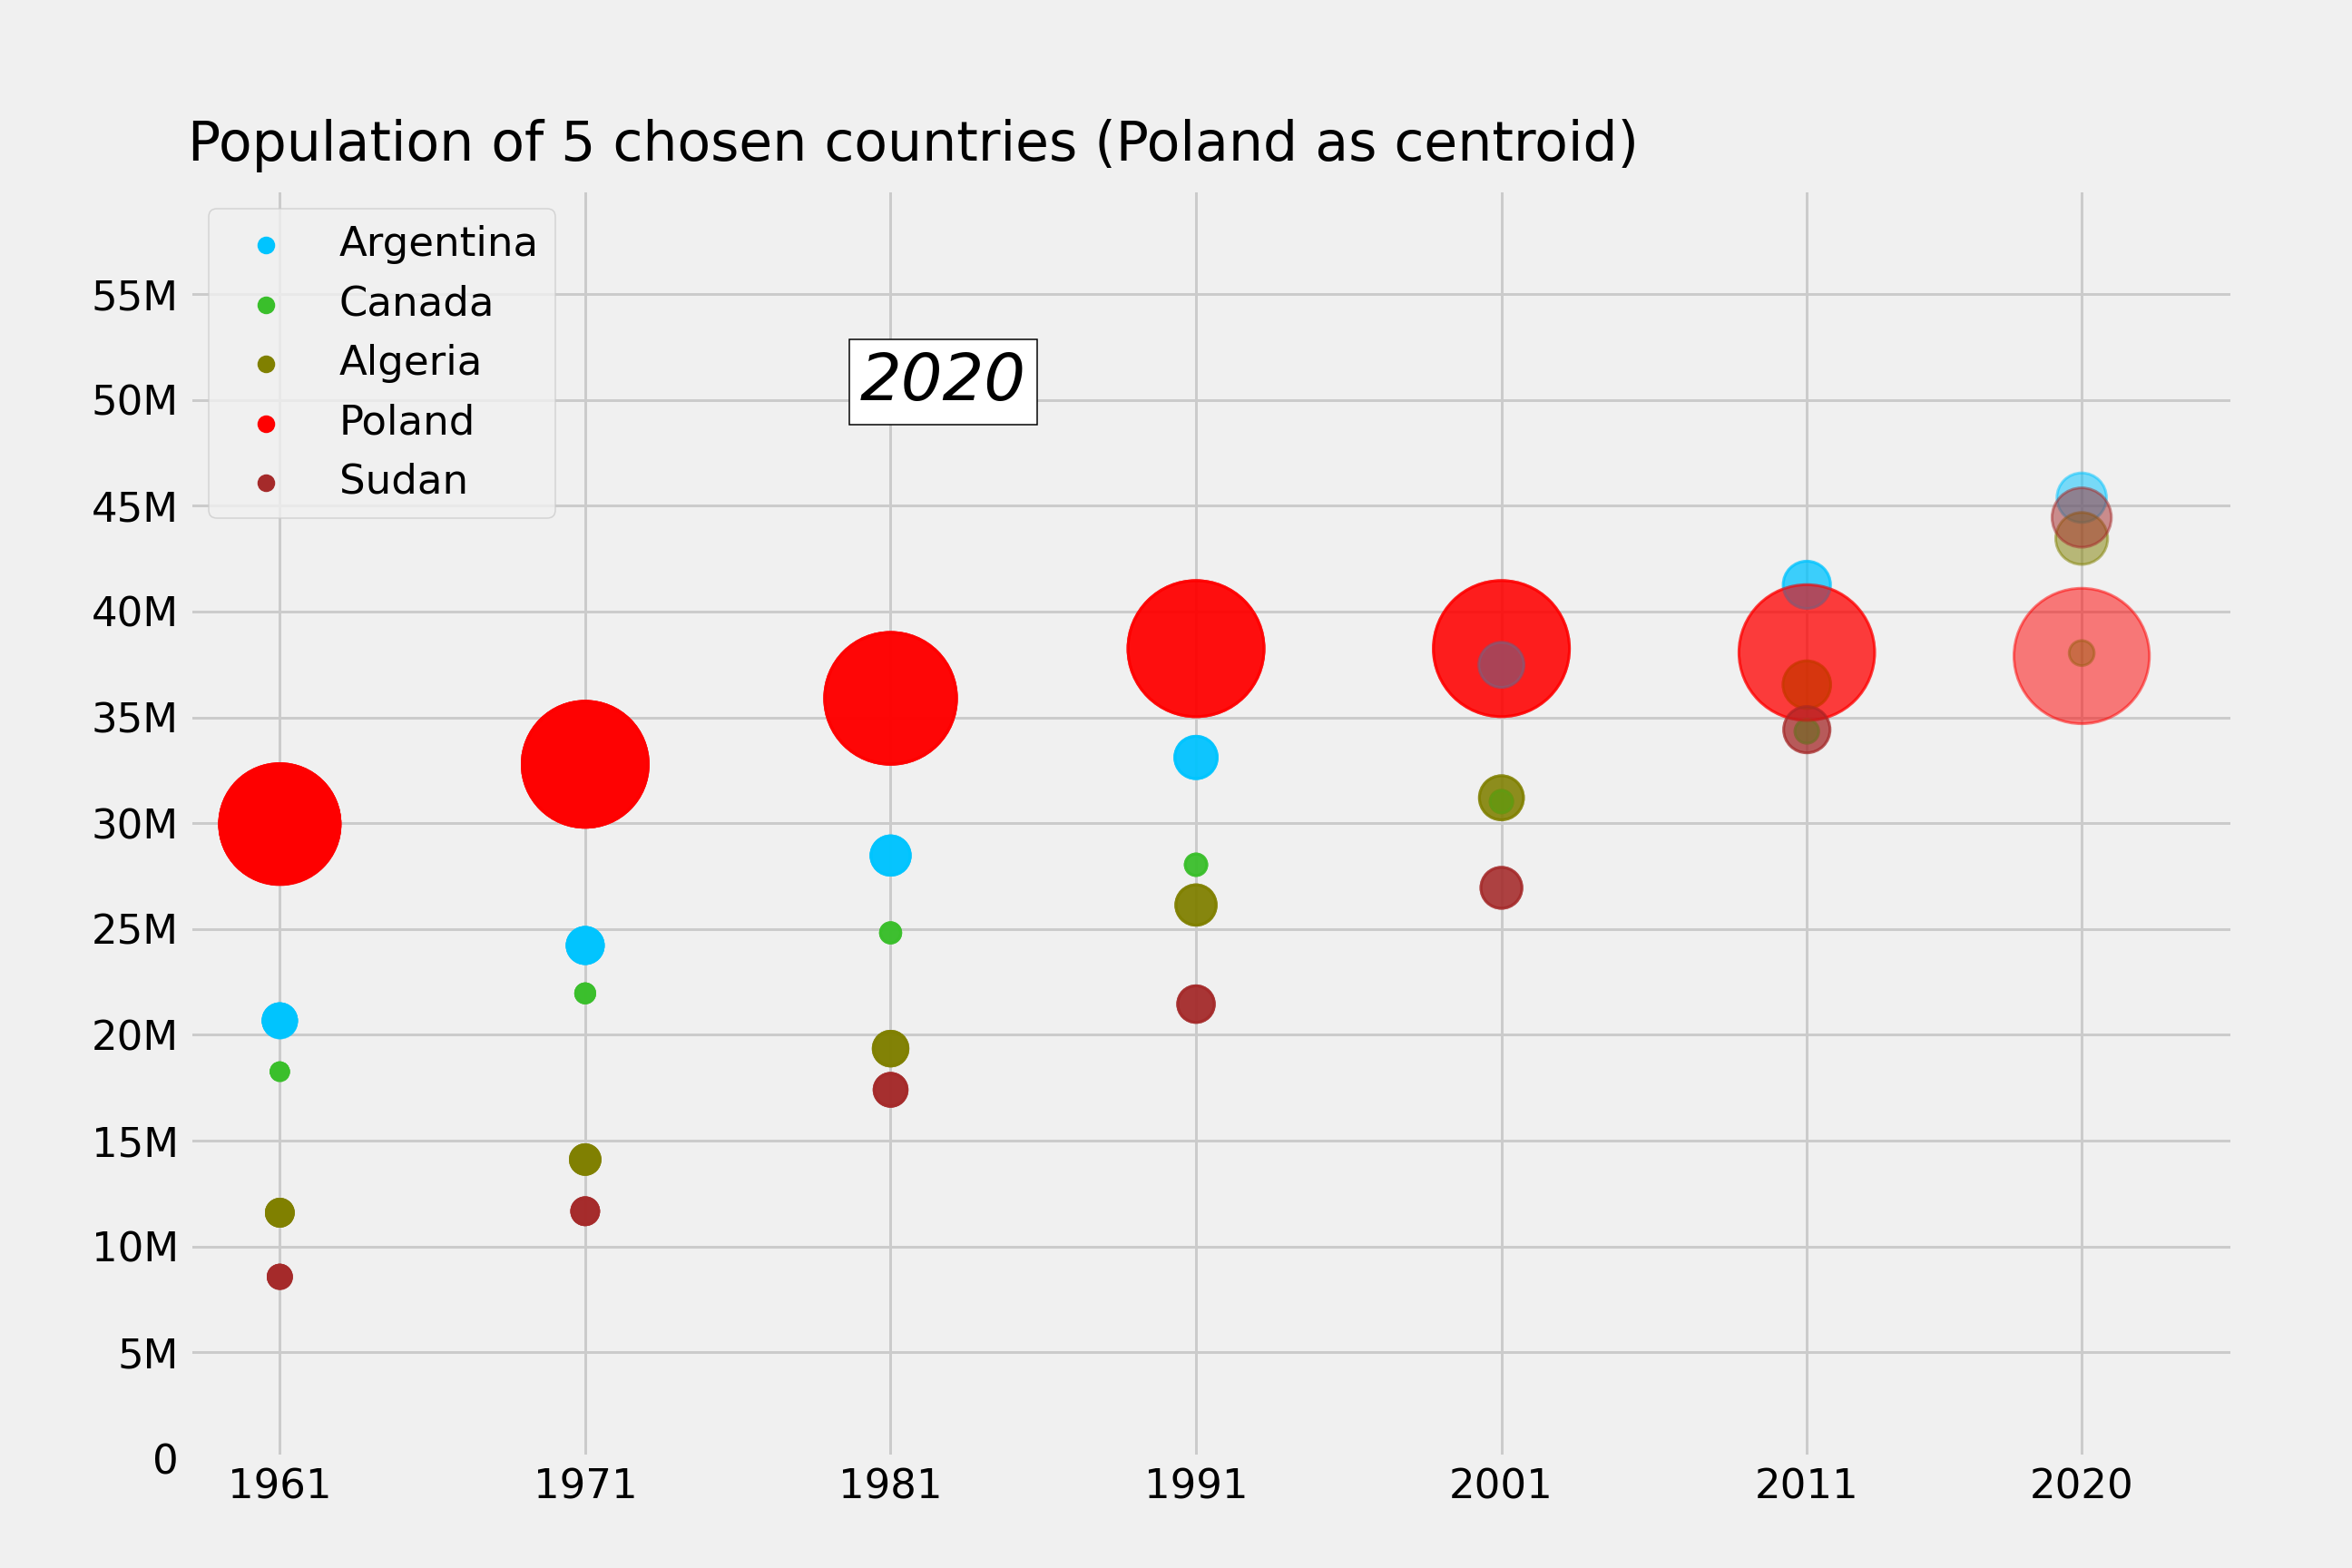

In [337]:
with plt.style.context("fivethirtyeight"):

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot()
    plt.ylim(0,60000000)
    ax.yaxis.set_ticks(range(0,60000000,5000000),
                       labels = ['0','5M','10M','15M','20M','25M','30M','35M','40M','45M','50M','55M'],
                      fontsize=15)

    ax.set_title('Population of 5 chosen countries (Poland as centroid)',
                 loc='left',
                 pad = 10,
                fontsize=20)
    plt.xlim(1958,2025)
    ax.xaxis.set_ticks([i for i in range(1961,2021,10)]+[2020],
                       labels=[i for i in range(1961,2021,10)]+[2020],
                       fontsize=15)
    text = ax.text(1980,50000000,"",
            bbox = dict(facecolor = 'white',edgecolor="black"),
           fontsize=24, fontstyle="italic")
    
    # For the legend
    ax.scatter(x=[0],y=[0],color='#00C4FF',label='Argentina')
    ax.scatter(x=[0],y=[0],color='#3ABF2B',label='Canada')
    ax.scatter(x=[0],y=[0],color='olive',label='Algeria')
    ax.scatter(x=[0],y=[0],color='red',label='Poland')
    ax.scatter(x=[0],y=[0],color='brown',label='Sudan')
                    
    ax.legend(loc="upper left", fontsize=15)

    def update(year):
        
        
        if year == 2020:
            
            a = [i for i in range(0,year-1960,10)] + [len(arg_df)-1]
            
            # Argentina
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=arg_df["Population"].values[a],
                       s=arg_df["Density"].values[a]*20,
                       alpha = 0.5, color='#00C4FF')
            # Canada
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=canada_df["Population"].values[a],
                       s=canada_df["Density"].values[a]*20,
                       alpha = 0.5, color='#3ABF2B')
            # Algeria
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=algeria_df["Population"].values[a],
                       s=algeria_df["Density"].values[a]*20,
                       alpha = 0.5, color='olive')
            # Poland
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=poland_df["Population"].values[a],
                       s=poland_df["Density"].values[a]*20,
                       alpha = 0.5, color='red')
            # Sudan
            ax.scatter(x=[i for i in range(1961,year+1,10)]+[2020],
                       y=sudan_df["Population"].values[a],
                       s=sudan_df["Density"].values[a]*20,
                       alpha = 0.5, color='brown')
        else:
            
            a = [i for i in range(0,year-1960,10)]
            
            # Argentina
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=arg_df["Population"].values[a],
                       s=arg_df["Density"].values[a]*20,
                       alpha = 0.5, color='#00C4FF')
            # Canada
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=canada_df["Population"].values[a],
                       s=canada_df["Density"].values[a]*20,
                       alpha = 0.5, color='#3ABF2B')
            # Algeria
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=algeria_df["Population"].values[a],
                       s=algeria_df["Density"].values[a]*20,
                       alpha = 0.5, color='olive')
            # Poland
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=poland_df["Population"].values[a],
                       s=poland_df["Density"].values[a]*20,
                       alpha = 0.5, color='red')
            # Sudan
            ax.scatter(x=[i for i in range(1961,year+1,10)],
                       y=sudan_df["Population"].values[a],
                       s=sudan_df["Density"].values[a]*20,
                       alpha = 0.5, color='brown')
            
        text.set_text(f"{year}")
    
    
    animate = FuncAnimation(fig, update,
                            [i for i in range(1961,2021,10)]+[2020],
                            interval=1000, repeat=False, blit=True)
        
    plt.show()

## 5. Pie charts

The assignment is to prepare some other type of visualization for our three dataframes. Let that be pie charts (althought it's doubtful that it's a good choice in the case of our data)

What we'll be visualizing is actually the proportion between populations of given countries, dynamically changing over years.

### a) Top 5 countries

In [239]:
df

Country Code     Indicator Name Indicator Code         1960  \
Country Name                                                                
China                  CHN  Population, total    SP.POP.TOTL  667070000.0   
Indonesia              IDN  Population, total    SP.POP.TOTL   88382881.0   
India                  IND  Population, total    SP.POP.TOTL  445954579.0   
Pakistan               PAK  Population, total    SP.POP.TOTL   45954226.0   
United States          USA  Population, total    SP.POP.TOTL  180671000.0   

                      1961         1962         1963         1964  \
Country Name                                                        
China          660330000.0  665770000.0  682335000.0  698355000.0   
Indonesia       90816938.0   93345489.0   95962527.0   98675061.0   
India          456351876.0  467024193.0  477933619.0  489059309.0   
Pakistan        47060915.0   48161841.0   49325050.0   50552592.0   
United States  183691000.0  186538000.0  189242000.0  191889000.0   

                      1965         1966  ...          2012          2013  \
Country Name                             ...                               
China          715185000.0  735400000.0  ...  1.354190e+09  1.363240e+09   
Indonesia      101157868.0  103561105.0  ...  2.502227e+08  2.532759e+08   
India          500114346.0  510992617.0  ...  1.274487e+09  1.291132e+09   
Pakistan        51841626.0   53199414.0  ...  2.022059e+08  2.053376e+08   
United States  194303000.0  196560000.0  ...  3.138777e+08  3.160599e+08   

                       2014          2015          2016          2017  \
Country Name                                                            
China          1.371860e+09  1.379860e+09  1.387790e+09  1.396215e+09   
Indonesia      2.562298e+08  2.590920e+08  2.618502e+08  2.644989e+08   
India          1.307247e+09  1.322867e+09  1.338636e+09  1.354196e+09   
Pakistan       2.082516e+08  2.109693e+08  2.135248e+08  2.163797e+08   
United States  3.183863e+08  3.207390e+08  3.230718e+08  3.251221e+08   

                       2018          2019          2020          2021  
Country Name                                                           
China          1.402760e+09  1.407745e+09  1.411100e+09  1.412360e+09  
Indonesia      2.670668e+08  2.695829e+08  2.718580e+08  2.737532e+08  
India          1.369003e+09  1.383112e+09  1.396387e+09  1.407564e+09  
Pakistan       2.197315e+08  2.232933e+08  2.271967e+08  2.314021e+08  
United States  3.268382e+08  3.283300e+08  3.315011e+08  3.318937e+08  

[5 rows x 65 columns]

<IPython.core.display.Javascript object>


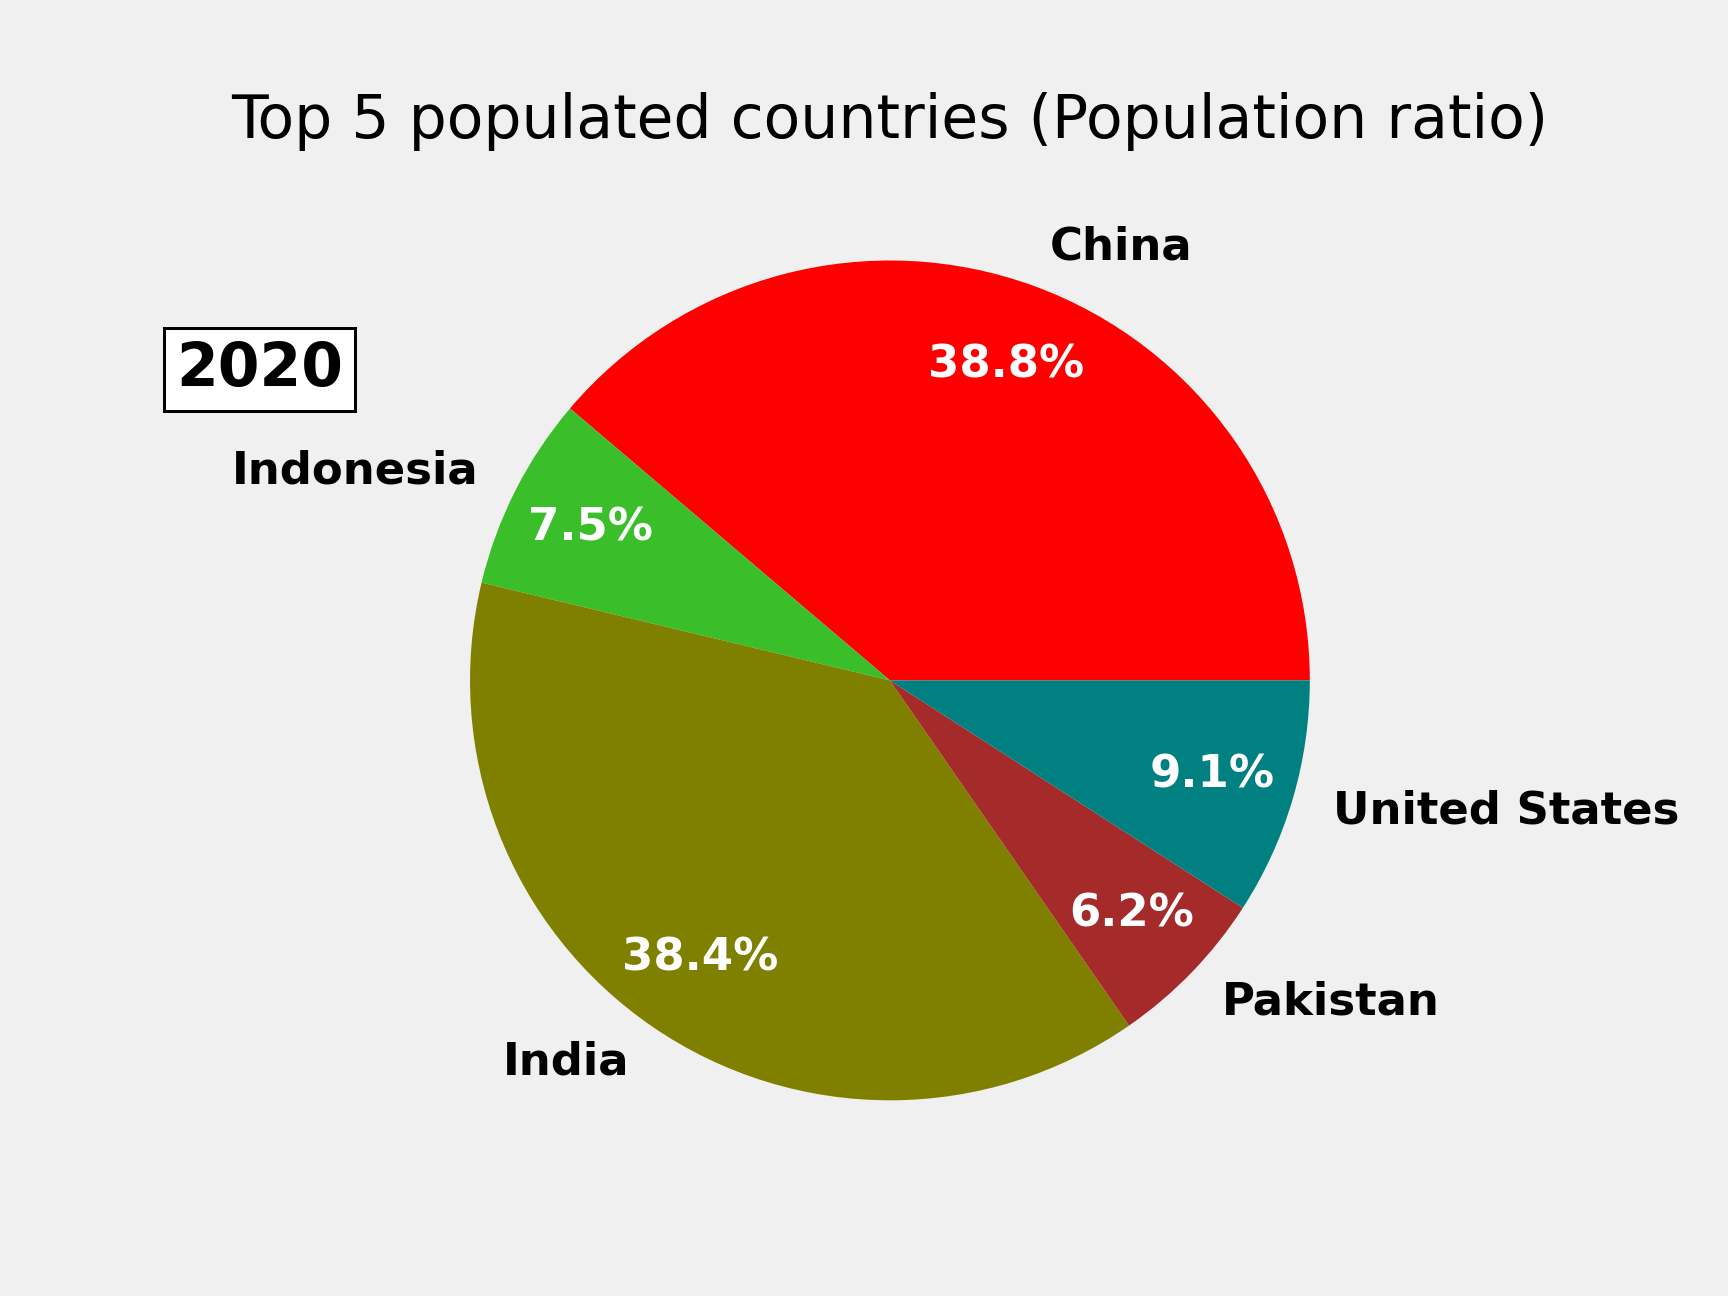

In [336]:
with plt.style.context('fivethirtyeight'):
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot()
    
    wedges, labls, texts = ax.pie(df['1960'],labels=df.index,autopct='%1.1f%%',
                                   colors=['red','#3ABF2B','olive','brown','teal'],
                                   textprops=dict(fontweight="bold", fontsize=15),
                                   radius=1,
                                    labeldistance=1.1,
                                    pctdistance=0.8)
    ax.text(-1.7,0.7,"1960",fontsize=20,
            fontweight='bold',
            bbox=dict(facecolor="white",edgecolor="black"))
    ax.set_title("Top 5 populated countries (Population ratio)",
            fontsize=20)
    for i in range(5):
        texts[i].set_color("white")
    
    def update(year):
        ax.clear()
        
        wedges, labls, texts = ax.pie(df[f'{year}'],labels=df.index,autopct='%1.1f%%',
                                   colors=['red','#3ABF2B','olive','brown','teal'],
                                   textprops=dict(fontweight="bold",fontsize=15),
                                   radius=1,
                                   labeldistance=1.1,
                                    pctdistance=0.8)
        for i in range(5):
            texts[i].set_color("white")
        
        ax.text(-1.7,0.7,f"{year}",fontsize=20,
                fontweight='bold',
                bbox=dict(facecolor="white",edgecolor="black"))
        ax.set_title("Top 5 populated countries (Population ratio)",
                fontsize=20)
            
            
    animate = FuncAnimation(fig, update, range(1961,2021),repeat=False,
                           blit=True)
    plt.show()
        

### b) Chosen country as a 'centroid'

In [322]:
df2

Country Code     Indicator Name Indicator Code  \
Country Name                                                              
Andorra                           AND  Population, total    SP.POP.TOTL   
American Samoa                    ASM  Population, total    SP.POP.TOTL   
Faroe Islands                     FRO  Population, total    SP.POP.TOTL   
Marshall Islands                  MHL  Population, total    SP.POP.TOTL   
Northern Mariana Islands          MNP  Population, total    SP.POP.TOTL   

                             1960     1961     1962     1963     1964  \
Country Name                                                            
Andorra                    9443.0  10216.0  11014.0  11839.0  12690.0   
American Samoa            20085.0  20626.0  21272.0  21949.0  22656.0   
Faroe Islands             34154.0  34572.0  34963.0  35385.0  35841.0   
Marshall Islands          15374.0  15867.0  16387.0  16947.0  17537.0   
Northern Mariana Islands   8702.0   8965.0   9252.0   9561.0   9890.0   

                             1965     1966  ...     2012     2013     2014  \
Country Name                                ...                              
Andorra                   13563.0  14546.0  ...  71013.0  71367.0  71621.0   
American Samoa            23391.0  24122.0  ...  53691.0  52995.0  52217.0   
Faroe Islands             36346.0  36825.0  ...  48392.0  48418.0  48465.0   
Marshall Islands          18154.0  18794.0  ...  52203.0  51352.0  50419.0   
Northern Mariana Islands  10229.0  10577.0  ...  52359.0  52141.0  51856.0   

                             2015     2016     2017     2018     2019  \
Country Name                                                            
Andorra                   71746.0  72540.0  73837.0  75013.0  76343.0   
American Samoa            51368.0  50448.0  49463.0  48424.0  47321.0   
Faroe Islands             48816.0  49500.0  50230.0  50955.0  51681.0   
Marshall Islands          49410.0  48329.0  47187.0  45989.0  44728.0   
Northern Mariana Islands  51514.0  51133.0  50729.0  50304.0  49858.0   

                             2020     2021  
Country Name                                
Andorra                   77700.0  79034.0  
American Samoa            46189.0  45035.0  
Faroe Islands             52415.0  52889.0  
Marshall Islands          43413.0  42050.0  
Northern Mariana Islands  49587.0  49481.0  

[5 rows x 65 columns]

<IPython.core.display.Javascript object>


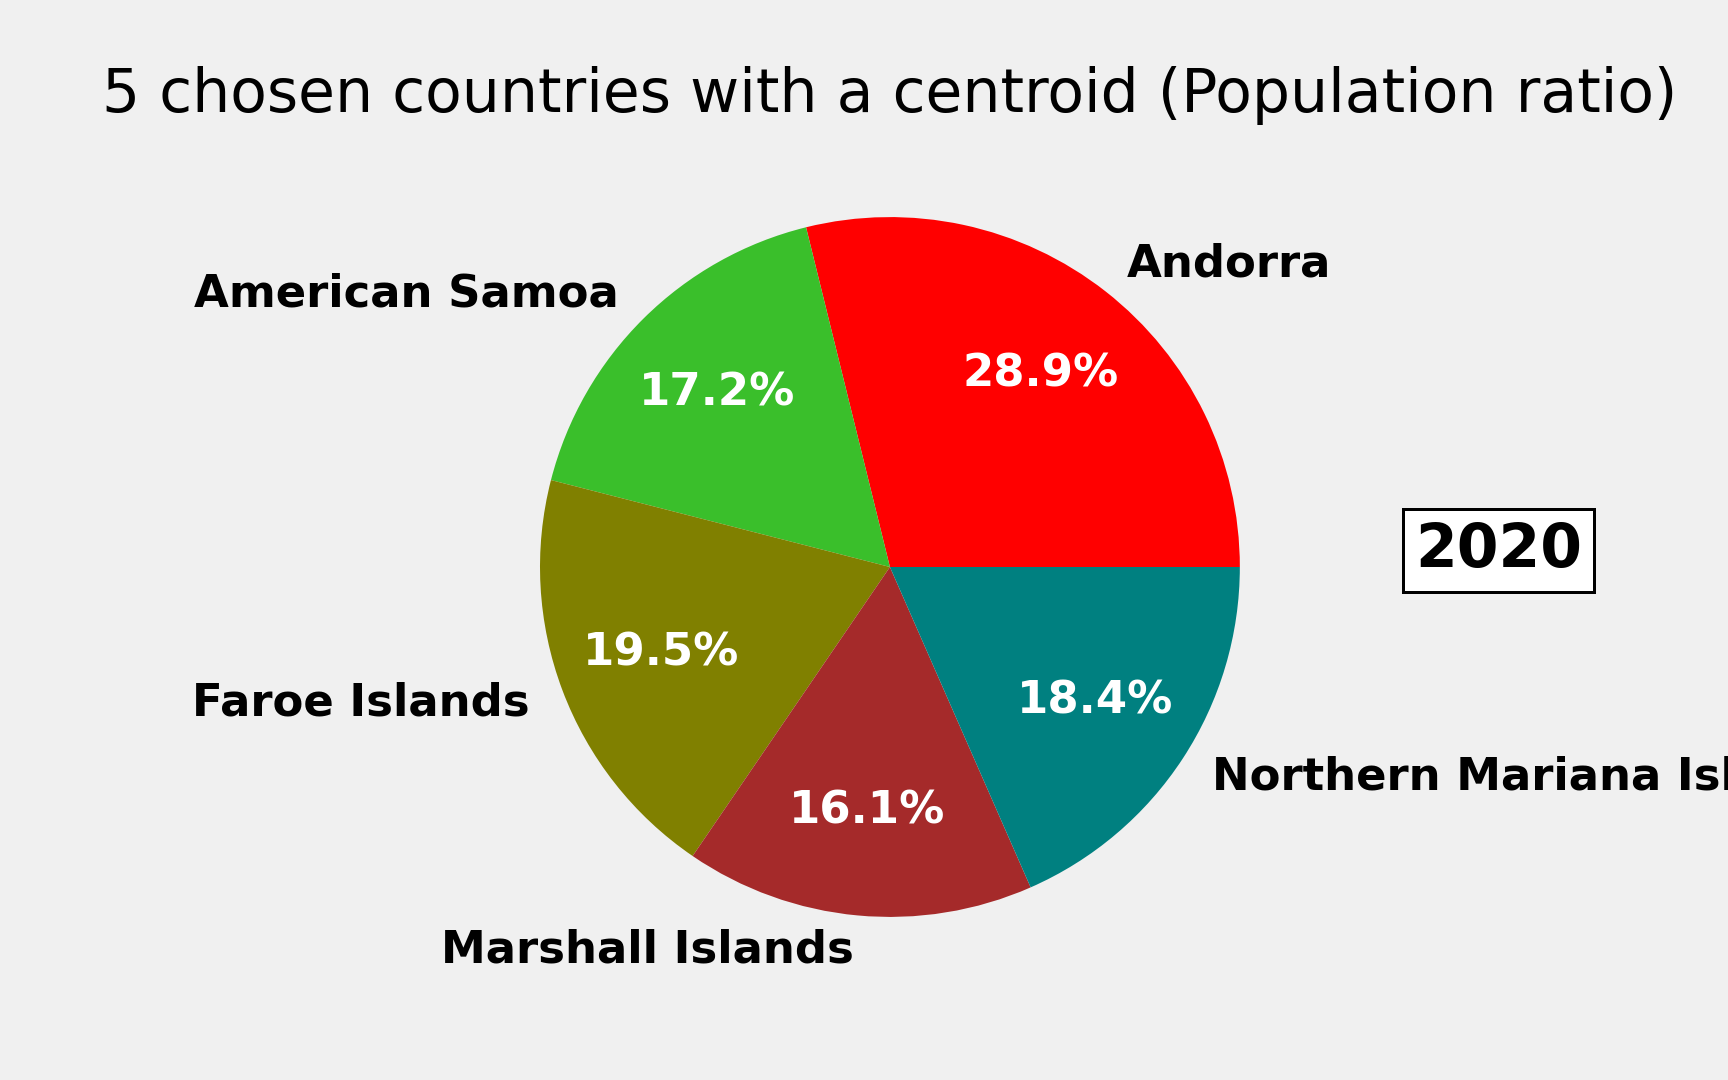

In [343]:
with plt.style.context('fivethirtyeight'):
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot()
    
    wedges, labls, texts = ax.pie(df2['1960'],labels=df2.index,autopct='%1.1f%%',
                                   colors=['red','#3ABF2B','olive','brown','teal'],
                                   textprops=dict(fontweight="bold", fontsize=15),
                                   radius=1,
                                    labeldistance=1.1,
                                    pctdistance=0.7)
    ax.text(1.5,0,"1960",fontsize=20,
            fontweight='bold',
            bbox=dict(facecolor="white",edgecolor="black"))
    
    ax.set_title("5 chosen countries with a centroid (Population ratio)",
                fontsize=20)
    for i in range(5):
        texts[i].set_color("white")
    
    def update(year):
        ax.clear()
        
        wedges, labls, texts = ax.pie(df2[f'{year}'],labels=df2.index,autopct='%1.1f%%',
                                   colors=['red','#3ABF2B','olive','brown','teal'],
                                   textprops=dict(fontweight="bold",fontsize=15),
                                   radius=1,
                                   labeldistance=1.1,
                                    pctdistance=0.7)
        for i in range(5):
            texts[i].set_color("white")
        
        ax.text(1.5,0,f"{year}",fontsize=20,
                fontweight='bold',
                bbox=dict(facecolor="white",edgecolor="black"))
        ax.set_title("5 chosen countries with a centroid (Population ratio)",
                    fontsize=20)
                
            
    animate = FuncAnimation(fig, update, range(1961,2021),repeat=False,
                           blit=True)
    plt.show()
        

### c) Poland as a centroid

In [344]:
df3

Country Code     Indicator Name Indicator Code        1960  \
Country Name                                                              
Argentina             ARG  Population, total    SP.POP.TOTL  20349744.0   
Canada                CAN  Population, total    SP.POP.TOTL  17909356.0   
Algeria               DZA  Population, total    SP.POP.TOTL  11394307.0   
Poland                POL  Population, total    SP.POP.TOTL  29637450.0   
Sudan                 SDN  Population, total    SP.POP.TOTL   8326462.0   

                    1961        1962        1963        1964        1965  \
Country Name                                                               
Argentina     20680653.0  21020359.0  21364017.0  21708487.0  22053661.0   
Canada        18271000.0  18614000.0  18964000.0  19325000.0  19678000.0   
Algeria       11598608.0  11778260.0  11969451.0  12179099.0  12381256.0   
Poland        29964000.0  30308500.0  30712000.0  31139450.0  31444950.0   
Sudan          8577490.0   8841338.0   9115091.0   9406702.0   9712785.0   

                    1966  ...        2012        2013        2014        2015  \
Country Name              ...                                                   
Argentina     22403116.0  ...  41733271.0  42202935.0  42669500.0  43131966.0   
Canada        20048000.0  ...  34714222.0  35082954.0  35437435.0  35702908.0   
Algeria       12613389.0  ...  37260563.0  38000626.0  38760168.0  39543154.0   
Poland        31681000.0  ...  38063164.0  38040196.0  38011735.0  37986412.0   
Sudan         10014505.0  ...  35159792.0  35990704.0  37003245.0  38171178.0   

                    2016        2017        2018        2019        2020  \
Country Name                                                               
Argentina     43590368.0  44044811.0  44494502.0  44938712.0  45376763.0   
Canada        36109487.0  36545236.0  37065084.0  37601230.0  38037204.0   
Algeria       40339329.0  41136546.0  41927007.0  42705368.0  43451666.0   
Poland        37970087.0  37974826.0  37974750.0  37965475.0  37899070.0   
Sudan         39377169.0  40679828.0  41999059.0  43232093.0  44440486.0   

                    2021  
Country Name              
Argentina     45808747.0  
Canada        38246108.0  
Algeria       44177969.0  
Poland        37747124.0  
Sudan         45657202.0  

[5 rows x 65 columns]

In [ ]:
with plt.style.context('fivethirtyeight'):
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot()
    
    wedges, labls, texts = ax.pie(df3['1960'],labels=df3.index,autopct='%1.1f%%',
                                   colors=['#00C4FF','#FF976C','olive','#BC0000','#4A271E'],
                                   textprops=dict(fontweight="bold", fontsize=15),
                                   radius=1,
                                    labeldistance=1.1,
                                    pctdistance=0.7)
    ax.text(1.5,0,"1960",fontsize=20,
            fontweight='bold',
            bbox=dict(facecolor="white",edgecolor="black"))
    
    ax.set_title("5 chosen countries with a Poland as a centroid \n (Population ratio)",
                fontsize=20)
    for i in range(5):
        texts[i].set_color("white")
    
    
    def update(year):
        ax.clear()
        
        wedges, labls, texts = ax.pie(df3[f'{year}'],labels=df3.index,autopct='%1.1f%%',
                                   colors=['#00C4FF','#FF976C','olive','#BC0000','#4A271E'],
                                   textprops=dict(fontweight="bold",fontsize=15),
                                   radius=1,
                                   labeldistance=1.1,
                                    pctdistance=0.7)
        for i in range(5):
            texts[i].set_color("white")
        
        ax.text(1.5,0,f"{year}",fontsize=20,
                fontweight='bold',
                bbox=dict(facecolor="white",edgecolor="black"))
        ax.set_title("5 chosen countries with a Poland as a centroid \n (Population ratio)",
                    fontsize=20)
                
            
    animate = FuncAnimation(fig, update, range(1961,2021),repeat=False,
                           blit=True)
    plt.show()
        

## 6. Plot showing some 'strange' behavior

There was a horrible period in modern history of Cambodia. After years of Vietnamese war and proclaiming and American-friendly government, in 1975 Cambodia underwent a coup- the power was taken by communist extremist Pot Pot and his Khmer Rouge army. 

The new regime modelled itself on Maoist China during the Great Leap Forward, immediately evacuated the cities, and sent the entire population on forced marches to rural work projects. They attempted to rebuild the country's agriculture on the model of the 11th century, discarded Western medicine, and destroyed temples, libraries, and anything considered Western.

Estimates as to how many people were killed by the Khmer Rouge regime range from approximately one to three million. The most commonly cited figure is two million (about a quarter of the population).This era gave rise to the term Killing Fields, and the prison Tuol Sleng became notorious for its history of mass killing. Hundreds of thousands fled across the border into neighbouring Thailand. The regime disproportionately targeted ethnic minority groups. The Cham Muslims suffered serious purges with as much as half of their population exterminated. Pol Pot was determined to keep his power and disenfranchise any enemies or potential threats, and thus increased his violent and aggressive actions against his people.

The regime period ended in 1978 with an invasion of Vietnamese forces. Pot Pot fled deep into the jungle, where he allegedlly died in 1998, surrounded by his followers.

In [6]:
df_camb = countries.drop(labels = countries.columns[-1], axis = 1)

In [7]:
df_camb.loc["Cambodia"]

Country Code                    KHM
Indicator Name    Population, total
Indicator Code          SP.POP.TOTL
1960                    5.54168e+06
1961                    5.66465e+06
                        ...        
2017                    1.58307e+07
2018                    1.60252e+07
2019                    1.62077e+07
2020                    1.63969e+07
2021                     1.6589e+07
Name: Cambodia, Length: 65, dtype: object

In [8]:
df_camb['absolute_1974'] = abs(df_camb['1974']-df_camb.loc["Cambodia"]['1974'])

In [9]:
df_camb['absolute_2021'] = abs(df_camb['2021']-df_camb.loc["Cambodia"]['2021'])

In [10]:
df_camb

Country Code     Indicator Name Indicator Code        1960  \
Country Name                                                              
Aruba                 ABW  Population, total    SP.POP.TOTL     54608.0   
Afghanistan           AFG  Population, total    SP.POP.TOTL   8622466.0   
Angola                AGO  Population, total    SP.POP.TOTL   5357195.0   
Albania               ALB  Population, total    SP.POP.TOTL   1608800.0   
Andorra               AND  Population, total    SP.POP.TOTL      9443.0   
...                   ...                ...            ...         ...   
Vanuatu               VUT  Population, total    SP.POP.TOTL     64608.0   
Samoa                 WSM  Population, total    SP.POP.TOTL    113335.0   
South Africa          ZAF  Population, total    SP.POP.TOTL  16520441.0   
Zambia                ZMB  Population, total    SP.POP.TOTL   3119430.0   
Zimbabwe              ZWE  Population, total    SP.POP.TOTL   3806310.0   

                    1961        1962        1963        1964        1965  \
Country Name                                                               
Aruba            55811.0     56682.0     57475.0     58178.0     58782.0   
Afghanistan    8790140.0   8969047.0   9157465.0   9355514.0   9565147.0   
Angola         5441333.0   5521400.0   5599827.0   5673199.0   5736582.0   
Albania        1659800.0   1711319.0   1762621.0   1814135.0   1864791.0   
Andorra          10216.0     11014.0     11839.0     12690.0     13563.0   
...                  ...         ...         ...         ...         ...   
Vanuatu          66462.0     68391.0     70400.0     72493.0     74677.0   
Samoa           116820.0    120163.0    123416.0    126582.0    129789.0   
South Africa  16989464.0  17503133.0  18042215.0  18603097.0  19187194.0   
Zambia         3219451.0   3323427.0   3431381.0   3542764.0   3658024.0   
Zimbabwe       3925952.0   4049778.0   4177931.0   4310332.0   4447149.0   

                    1966  ...        2014        2015        2016        2017  \
Country Name              ...                                                   
Aruba            59291.0  ...    103594.0    104257.0    104874.0    105439.0   
Afghanistan    9783147.0  ...  32716210.0  33753499.0  34636207.0  35643418.0   
Angola         5787044.0  ...  27128337.0  28127721.0  29154746.0  30208628.0   
Albania        1914573.0  ...   2889104.0   2880703.0   2876101.0   2873457.0   
Andorra          14546.0  ...     71621.0     71746.0     72540.0     73837.0   
...                  ...  ...         ...         ...         ...         ...   
Vanuatu          76945.0  ...    269927.0    276438.0    283218.0    290239.0   
Samoa           132976.0  ...    201757.0    203571.0    205544.0    207630.0   
South Africa  19789771.0  ...  54729551.0  55876504.0  56422274.0  56641209.0   
Zambia         3777680.0  ...  15737793.0  16248230.0  16767761.0  17298054.0   
Zimbabwe       4588529.0  ...  13855753.0  14154937.0  14452704.0  14751101.0   

                    2018        2019        2020        2021  absolute_1974  \
Country Name                                                                  
Aruba           105962.0    106442.0    106585.0    106537.0      6853380.0   
Afghanistan   36686784.0  37769499.0  38972230.0  40099462.0      4956471.0   
Angola        31273533.0  32353588.0  33428486.0  34503774.0       110914.0   
Albania        2866376.0   2854191.0   2837849.0   2811666.0      4563284.0   
Andorra          75013.0     76343.0     77700.0     79034.0      6887405.0   
...                  ...         ...         ...         ...            ...   
Vanuatu         297298.0    304404.0    311685.0    319137.0      6814618.0   
Samoa           209701.0    211905.0    214929.0    218764.0      6761168.0   
South Africa  57339635.0  58087055.0  58801927.0  59392255.0     18163608.0   
Zambia        17835893.0  18380477.0  18927715.0  19473125.0      2124370.0   
Zimbabwe      15052184.0  15354608.0  15669666

In [11]:
df4 =  df_camb.sort_values(by = ['absolute_2021','absolute_1974']).head(5)

In [12]:
df4

Country Code     Indicator Name Indicator Code       1960  \
Country Name                                                             
Cambodia              KHM  Population, total    SP.POP.TOTL  5541676.0   
Senegal               SEN  Population, total    SP.POP.TOTL  3273177.0   
Somalia               SOM  Population, total    SP.POP.TOTL  2870732.0   
Guatemala             GTM  Population, total    SP.POP.TOTL  4128880.0   
Chad                  TCD  Population, total    SP.POP.TOTL  3028688.0   

                   1961       1962       1963       1964       1965  \
Country Name                                                          
Cambodia      5664654.0  5788854.0  5913680.0  6040847.0  6170727.0   
Senegal       3367082.0  3463524.0  3562469.0  3664599.0  3770874.0   
Somalia       2945662.0  3022827.0  3102170.0  3183590.0  3267593.0   
Guatemala     4251911.0  4378604.0  4508444.0  4640795.0  4774984.0   
Chad          3087657.0  3148242.0  3210296.0  3273419.0  3336338.0   

                   1966  ...        2014        2015        2016        2017  \
Country Name             ...                                                   
Cambodia      6299230.0  ...  15210817.0  15417523.0  15624584.0  15830689.0   
Senegal       3881994.0  ...  13970308.0  14356181.0  14751356.0  15157793.0   
Somalia       3353665.0  ...  13309235.0  13763906.0  14292847.0  14864221.0   
Guatemala     4910790.0  ...  15306316.0  15567419.0  15827690.0  16087418.0   
Chad          3398664.0  ...  13697126.0  14140274.0  14592585.0  15085884.0   

                    2018        2019        2020        2021  absolute_1974  \
Country Name                                                                  
Cambodia      16025238.0  16207746.0  16396860.0  16589023.0            0.0   
Senegal       15574909.0  16000781.0  16436120.0  16876720.0      2001987.0   
Somalia       15411094.0  15981300.0  16537016.0  17065581.0      2787585.0   
Guatemala     16346950.0  16604026.0  16858333.0  17109746.0       919108.0   
Chad          15604210.0  16126866.0  16644701.0  17179740.0      2912849.0   

              absolute_2021  
Country Name                 
Cambodia                0.0  
Senegal            287697.0  
Somalia            476558.0  
Guatemala          520723.0  
Chad               590717.0  

[5 rows x 67 columns]

First, let's take a quick look at Cambodia's population dynamic. There, we can easly see the horrific doings of the Khmer Rouge's regime.

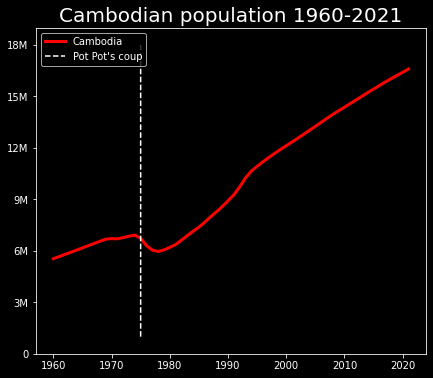

In [16]:
with plt.style.context('dark_background'): 
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot()
    plt.ylim(0,19000000)
    ax.yaxis.set_ticks(range(0,19000000,3000000),
                       labels=['0','3M','6M','9M','12M','15M','18M'])

    cambodia_line, = ax.plot(range(1960,2022),df4.loc["Cambodia"]['1960':'2021'],
                            color="red", linewidth = 3, label="Cambodia")
    regime_line, = ax.plot([1975 for i in range(1000000,18000000)],
                           range(1000000,18000000),
                          color="white",
                          linestyle="--",
                          label="Pot Pot's coup")
    ax.legend(loc="upper left")
    
    
    ax.set_title("Cambodian population 1960-2021", fontsize=20)

    plt.show()

We will now compare the population decline to some other countries. Let's focus only on the period up to year 2000- what's happened then is not that important for this analysis.
Note that something strange happened also in Somalia, in the early 90s. That's actually a break of a devastating civil war, which still goes on as of the year 2023.

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


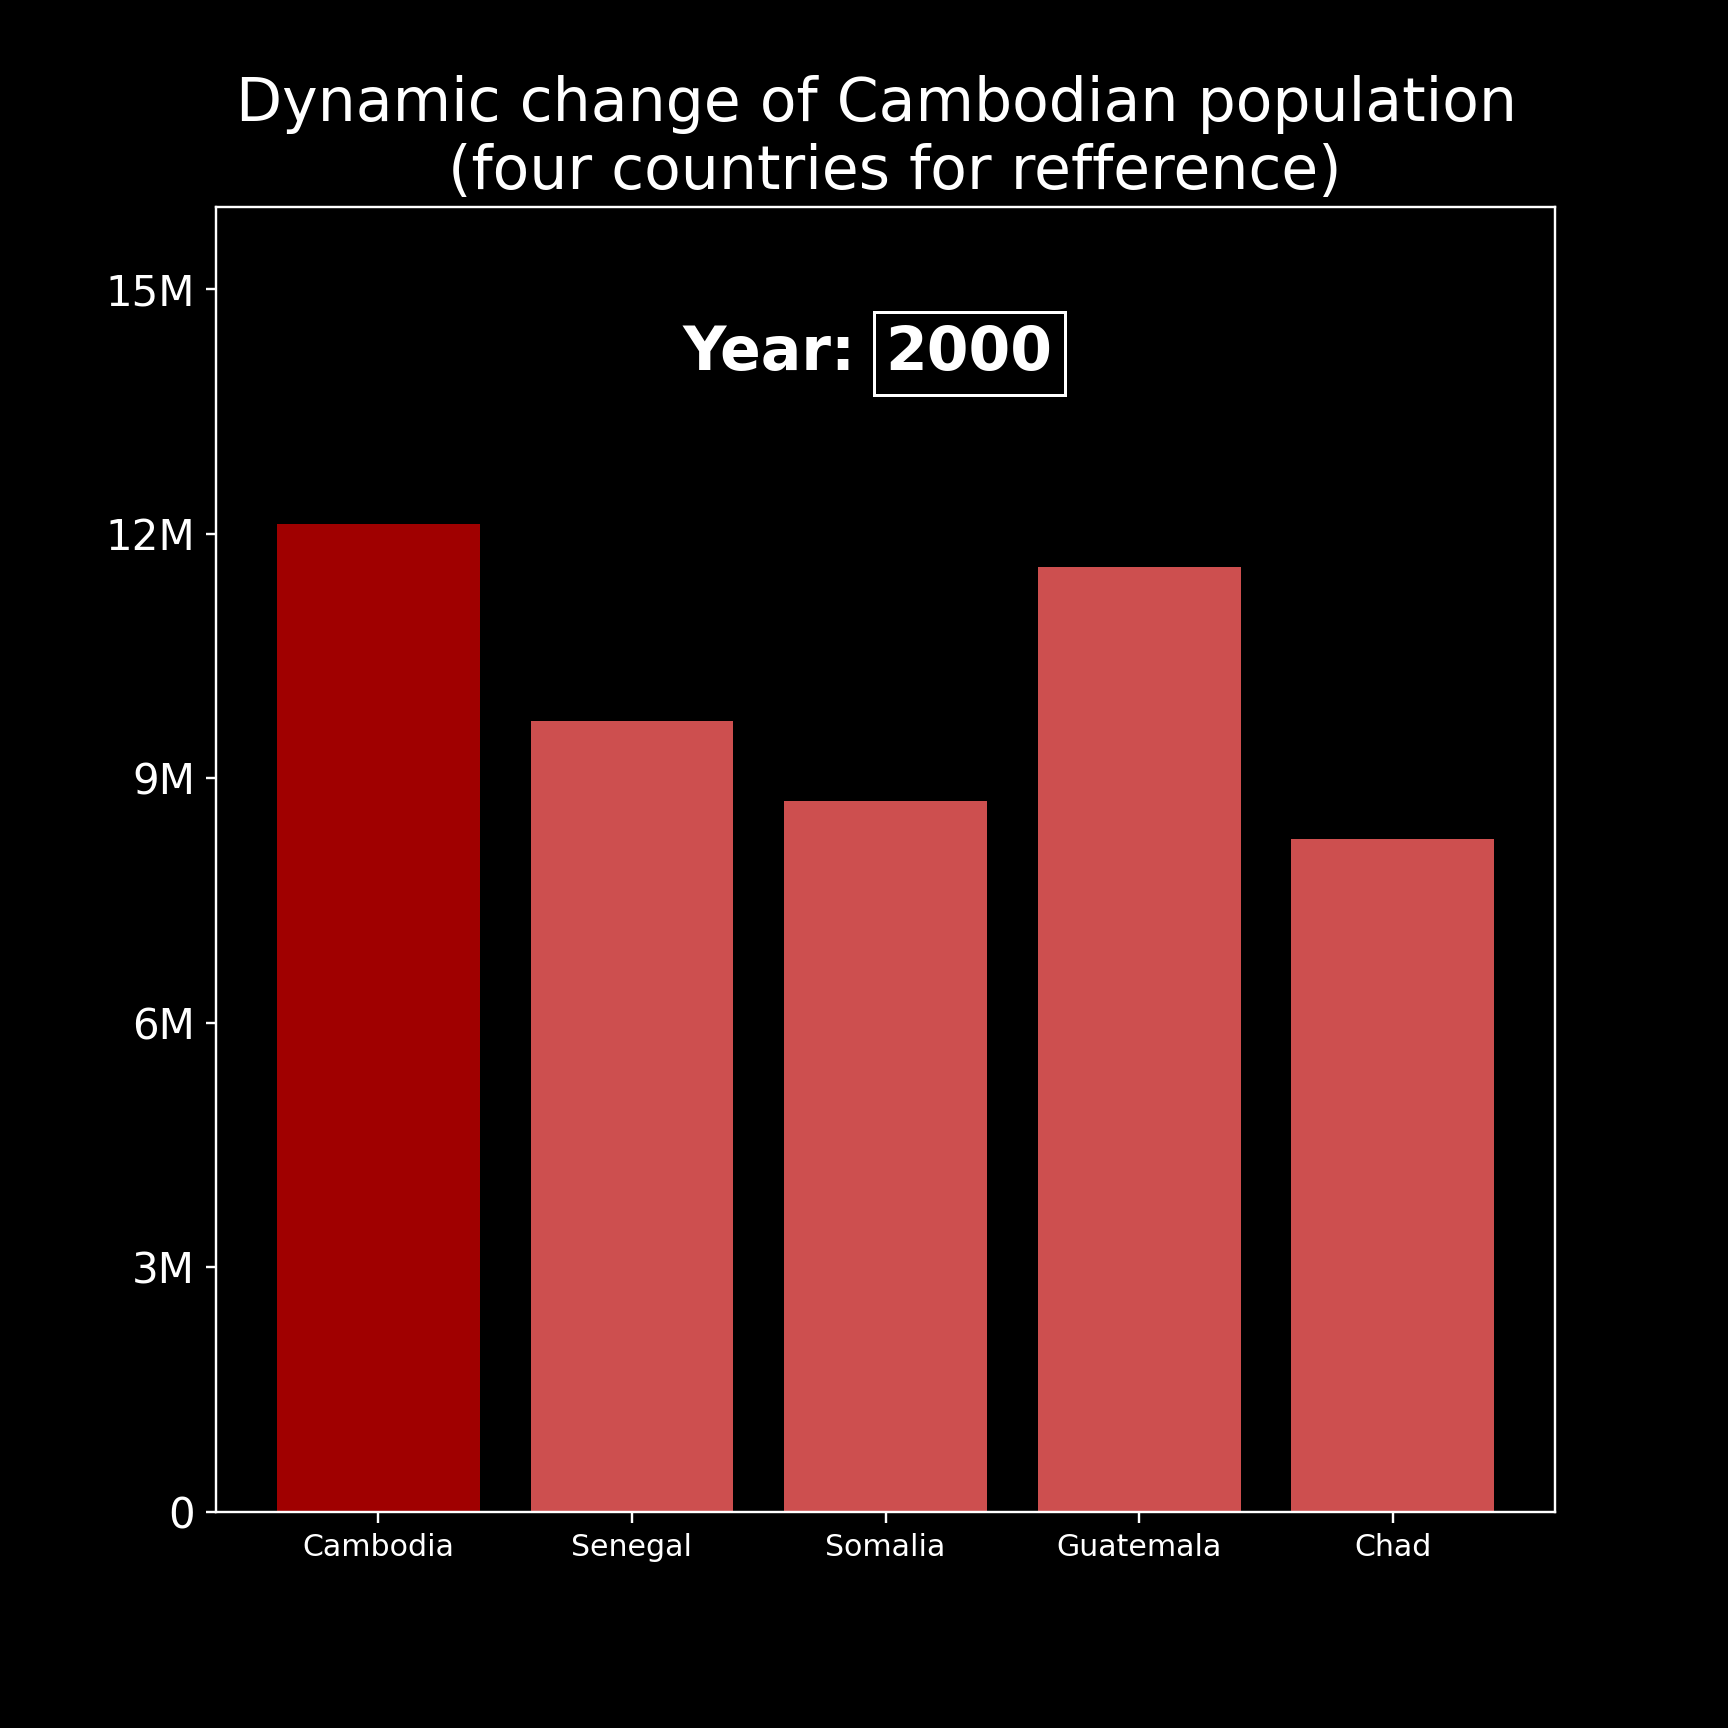

In [23]:
with plt.style.context('dark_background'):
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot()
    plt.ylim(0,16000000)
    ax.yaxis.set_ticks(range(0,16000000,3000000),
                       labels=['0','3M','6M','9M','12M','15M'],
                      fontsize=14)
    
    ax.set_title("Dynamic change of Cambodian population \n (four countries for refference)",
                fontsize=20)
    year_text = ax.text(1.2,14000000,"Year:", fontsize=20, fontweight="bold")
    year_counter = ax.text(2,14000000,"1960", fontsize=20, fontweight="bold",
                          bbox = dict(facecolor="black",edgecolor="w"))
    
    
    bars = ax.bar(df4.index, df4['1960'],
                  color =['#A00000','#CD4F4F','#CD4F4F','#CD4F4F','#CD4F4F'])
    
    line, = ax.plot([],
                   linestyle="--",
                   linewidth = 4,
                   color = "w")
    text = ax.text(0.5,df4.loc['Cambodia']['1975']+330000,
                  "", fontsize=20, fontweight="bold")
    
    def update(year):
        
        if year in range(1976,1986):
            line.set_xdata(range(5))
            line.set_ydata([df4.loc['Cambodia']['1975']+80000 for i in range(5)])
            text.set_text("Pot Pot's coup")
            return line,
        if year >= 1986: # the actual year is 1976, 1977, 1978...
            if year == 1988:
                line.set_xdata([])
                line.set_ydata([])
                text.set_text("")
            for i in range(5):
                bars[i].set_height(df4.iloc[i][f'{year-10}'])
            
            year_counter.set_text(f"{year-10}")
            return bars
            

        
        for i in range(5):
            bars[i].set_height(df4.iloc[i][f'{year}'])
            
        year_counter.set_text(f"{year}")
        return bars
        
    
    animate = FuncAnimation(fig, update, range(1960,2011),
                           repeat=False, interval=500, blit=True)
    
    plt.show()
    

## 7. aGantt plot

Gantt plot will be of use to prepare a kind of scheduled 'activities' taking place over time. In this case, we will make a schedule for the 2022/23 academical year at the University of Warsaw

In [21]:
acad_year = pd.date_range('2023-09-1','2024-10-10')

In [41]:
len(acad_year)

366

In [67]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

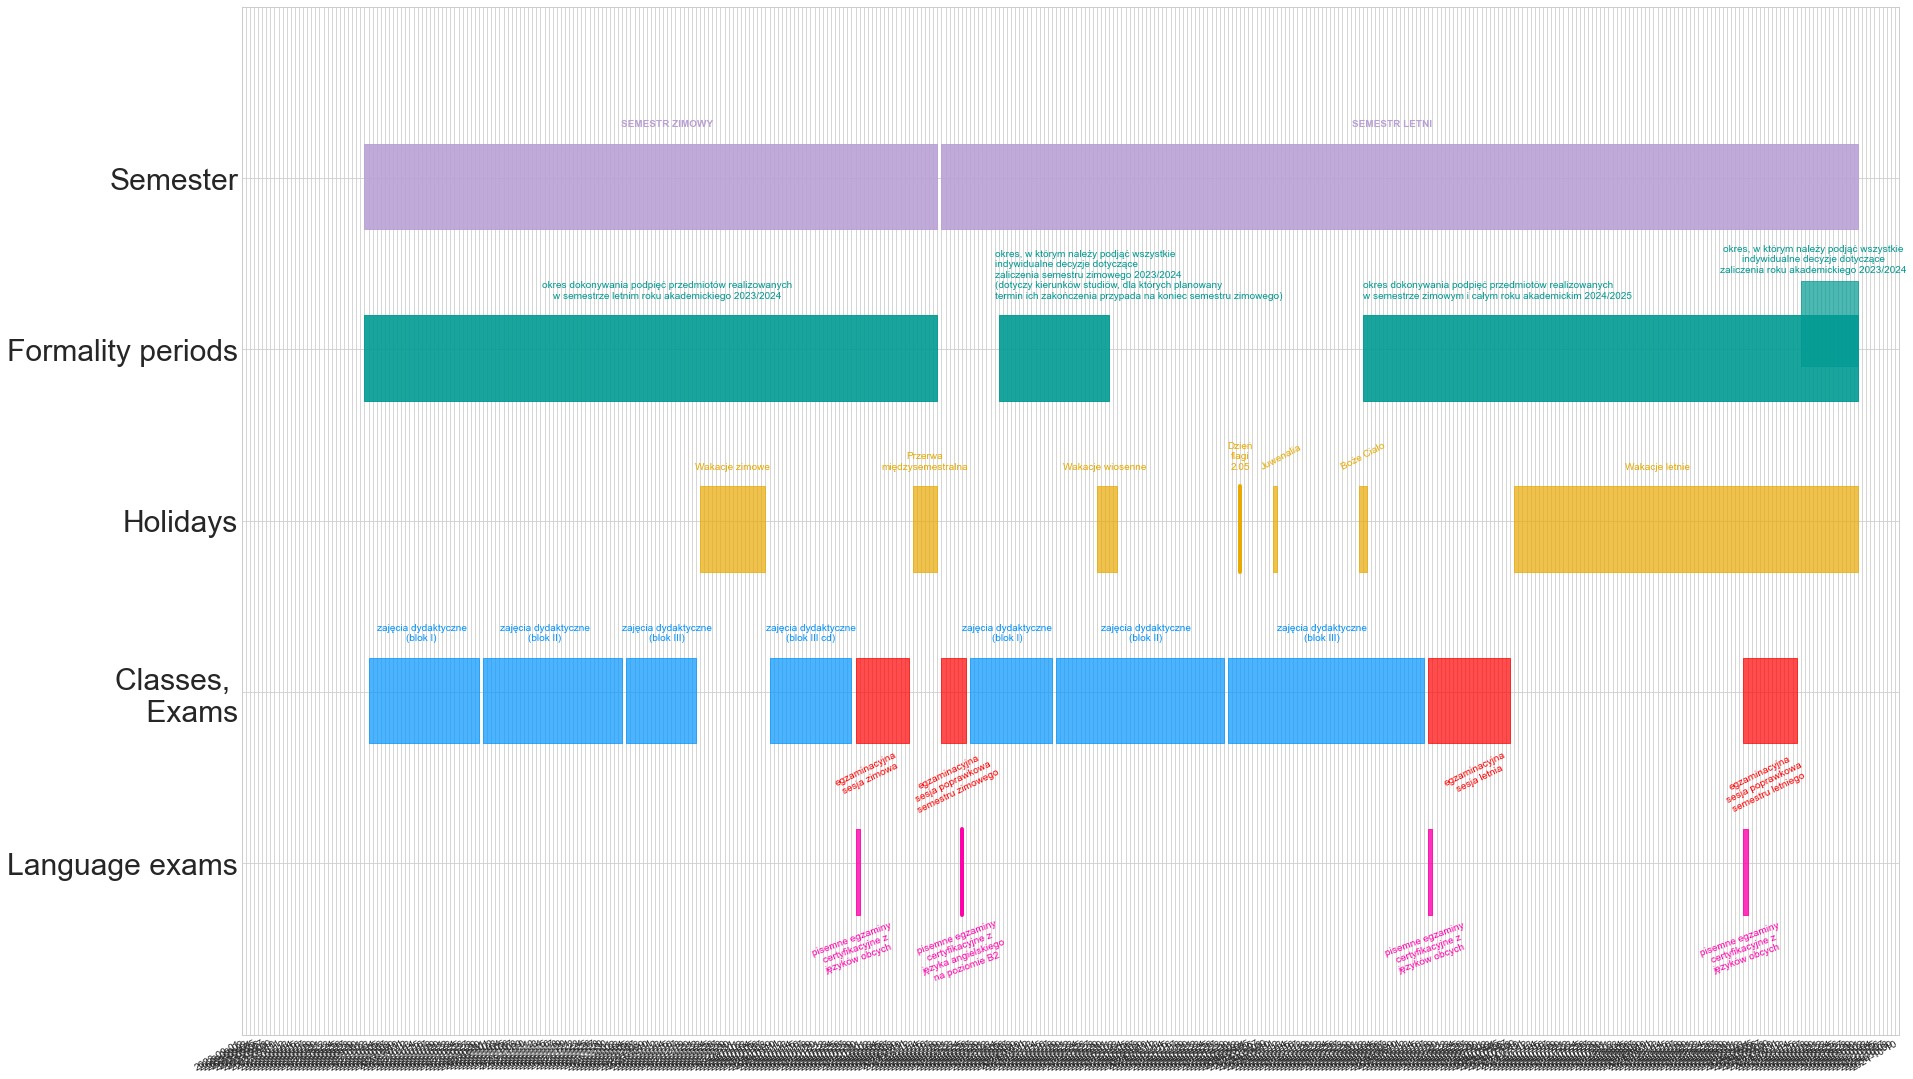

In [119]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    
    fig = plt.figure(figsize=(29.7,21.0))
    ax = fig.add_subplot()
    plt.ylim(0,6)
    ax.yaxis.set_ticks([1,2,3,4,5],
                       labels=['Language exams','Classes, \n Exams','Holidays','Formality periods','Semester'],
                      fontsize=30)
    fig.autofmt_xdate()
    ax.set_xlim(acad_year[0],acad_year[-1])
    ax.xaxis.set_ticks(acad_year,labels=acad_year.date)
    
    # Exams
    ax.broken_barh([(pd.to_datetime('2024-01-29'),pd.to_datetime('2024-02-11')-pd.to_datetime('2024-01-29')),
                    (pd.to_datetime('2024-02-19'),pd.to_datetime('2024-02-25')-pd.to_datetime('2024-02-19')),
                   (pd.to_datetime('2024-06-17'),pd.to_datetime('2024-07-07')-pd.to_datetime('2024-06-17')),
                   (pd.to_datetime('2024-09-02'),pd.to_datetime('2024-09-15')-pd.to_datetime('2024-09-02'))],
                   (1.7,0.5),alpha=0.7,color="red")
    ax.text(pd.to_datetime('2024-02-1'),1.4,"egzaminacyjna\nsesja zimowa",
           ha="center", color="red",rotation=26)
    ax.text(pd.to_datetime('2024-02-22'),1.3,"egzaminacyjna\nsesja poprawkowa\nsemestru zimowego",
           ha="center", color="red",rotation=26)
    ax.text(pd.to_datetime('2024-06-29'),1.4,"egzaminacyjna\nsesja letnia",
           ha="center", color="red",rotation=26)
    ax.text(pd.to_datetime('2024-09-07'),1.3,"egzaminacyjna\nsesja poprawkowa\nsemestru letniego",
           ha="center", color="red",rotation=26)

    # Classes
    ax.broken_barh([(pd.to_datetime('2023-10-2'),pd.to_datetime('2023-10-29')-pd.to_datetime('2023-10-2')),
                   (pd.to_datetime('2023-10-30'),pd.to_datetime('2023-12-03')-pd.to_datetime('2023-10-30')),
                   (pd.to_datetime("2023-12-04"),pd.to_datetime('2023-12-21')-pd.to_datetime('2023-12-04')),
                   (pd.to_datetime('2024-01-08'),pd.to_datetime('2024-01-28')-pd.to_datetime('2024-01-08')),
                   (pd.to_datetime('2024-02-26'),pd.to_datetime('2024-03-17')-pd.to_datetime('2024-02-26')),
                   (pd.to_datetime('2024-03-18'),pd.to_datetime('2024-04-28')-pd.to_datetime('2024-03-18')),
                   (pd.to_datetime('2024-04-29'),pd.to_datetime('2024-06-16')-pd.to_datetime('2024-04-29'))],
                   (1.7,0.5),alpha=0.7, color="#0094FF")
    ax.text(pd.to_datetime('2023-10-15'),2.3,"zajęcia dydaktyczne\n(blok I)",
            ha="center",color="#0094FF")
    ax.text(pd.to_datetime('2023-11-14'),2.3,"zajęcia dydaktyczne\n(blok II)",
            ha='center',color='#0094FF')
    ax.text(pd.to_datetime('2023-12-14'),2.3,"zajęcia dydaktyczne\n(blok III)",
            ha='center',color='#0094FF')
    ax.text(pd.to_datetime('2024-01-18'),2.3,"zajęcia dydaktyczne\n(blok III cd)",
            ha='center',color='#0094FF')
    ax.text(pd.to_datetime('2024-03-06'),2.3,"zajęcia dydaktyczne\n(blok I)",
            ha='center',color='#0094FF')
    ax.text(pd.to_datetime('2024-04-09'),2.3,"zajęcia dydaktyczne\n(blok II)",
            ha='center',color='#0094FF')
    ax.text(pd.to_datetime('2024-05-22'),2.3,"zajęcia dydaktyczne\n(blok III)",
            ha='center',color='#0094FF')
    
    # Semester
    ax.broken_barh([(pd.to_datetime('2023-10-01'),pd.to_datetime('2024-02-18')-pd.to_datetime('2023-10-01')),
                   (pd.to_datetime('2024-02-19'),pd.to_datetime('2024-09-30')-pd.to_datetime('2024-02-19'))],
                  (4.7,0.5),alpha=0.9,color='#BAA1D5')
    ax.text(pd.to_datetime('2023-12-14'),5.3,"SEMESTR ZIMOWY",
           fontweight="bold",ha="center",color="#BAA1D5")
    ax.text(pd.to_datetime('2024-06-08'),5.3,"SEMESTR LETNI",
           fontweight="bold",ha="center",color="#BAA1D5")
    # Holidays
    ax.broken_barh([(pd.to_datetime('2023-12-22'),pd.to_datetime('2024-01-07')-pd.to_datetime('2023-12-22')),
                   (pd.to_datetime('2024-02-12'),pd.to_datetime('2024-02-18')-pd.to_datetime('2024-02-12')),
                   (pd.to_datetime('2024-03-28'),pd.to_datetime('2024-04-02')-pd.to_datetime('2024-03-28')),
                   (pd.to_datetime('2024-05-10'),pd.to_datetime('2024-05-11')-pd.to_datetime('2024-05-10')),
                   (pd.to_datetime('2024-05-31'),pd.to_datetime('2024-06-02')-pd.to_datetime('2024-05-31')),
                   (pd.to_datetime('2024-07-08'),pd.to_datetime('2024-09-30')-pd.to_datetime('2024-07-08'))],
                  (2.7,0.5),alpha=0.7,color="#E8A900")
    ax.plot([pd.to_datetime('2024-05-02'), pd.to_datetime('2024-05-02')],
           [2.7,3.2], linewidth=4, color='#E8A900')
    ax.text(pd.to_datetime('2023-12-30'),3.3,"Wakacje zimowe",
           ha="center",color="#E8A900")
    ax.text(pd.to_datetime('2024-02-15'),3.3,"Przerwa\nmiędzysemestralna",
           ha="center",color="#E8A900")
    ax.text(pd.to_datetime('2024-03-30'),3.3,"Wakacje wiosenne",
           ha="center",color="#E8A900")
    ax.text(pd.to_datetime('2024-05-02'),3.3,"Dzień\nflagi\n2.05",
           ha="center",color="#E8A900")
    ax.text(pd.to_datetime('2024-05-12'),3.3,"Juwenalia",
           ha="center",color="#E8A900",rotation=28)
    ax.text(pd.to_datetime('2024-06-01'),3.3,"Boże Ciało",
           ha="center",color="#E8A900",rotation=28)
    ax.text(pd.to_datetime('2024-08-12'),3.3,"Wakacje letnie",
           ha="center",color="#E8A900")
    
    # Language exams
    ax.broken_barh([(pd.to_datetime('2024-01-29'),pd.to_datetime('2024-01-30')-pd.to_datetime('2024-01-29')),
                   (pd.to_datetime('2024-06-17'),pd.to_datetime('2024-06-18')-pd.to_datetime('2024-06-17')),
                   (pd.to_datetime('2024-09-02'),pd.to_datetime('2024-09-03')-pd.to_datetime('2024-09-02'))],
                  (0.7,0.5),color='#FF00AB', alpha=0.8)
    ax.plot([pd.to_datetime('2024-02-24'),pd.to_datetime('2024-02-24')],
           [0.7,1.2],color="#FF00AB",linewidth=4)
    ax.text(pd.to_datetime('2024-01-29'),0.35,"pisemne egzaminy\ncertyfikacyjne z\njęzyków obcych",
           ha="center",color="#FF00AB",rotation=20)
    ax.text(pd.to_datetime('2024-02-24'),0.3,"pisemne egzaminy\ncertyfikacyjne z\njęzyka angielskiego\nna poziomie B2",
           ha="center",color="#FF00AB",rotation=20)
    ax.text(pd.to_datetime('2024-06-17'),0.35,"pisemne egzaminy\ncertyfikacyjne z\njęzyków obcych",
           ha="center",color="#FF00AB",rotation=20)
    ax.text(pd.to_datetime('2024-09-02'),0.35,"pisemne egzaminy\ncertyfikacyjne z\njęzyków obcych",
           ha="center",color="#FF00AB",rotation=20)
    
    # Formalities
    ax.broken_barh([(pd.to_datetime('2023-10-01'),pd.to_datetime('2024-02-18')-pd.to_datetime('2023-10-01')),
                   (pd.to_datetime('2024-03-04'),pd.to_datetime('2024-03-31')-pd.to_datetime('2024-03-04')),
                   (pd.to_datetime('2024-06-01'),pd.to_datetime('2024-09-30')-pd.to_datetime('2024-06-01'))],
                  (3.7,0.5), alpha=0.9, color='#009A92')
    ax.broken_barh([(pd.to_datetime('2024-09-16'),pd.to_datetime('2024-09-30')-pd.to_datetime('2024-09-16'))],
                  (3.9,0.5),alpha=0.7,color='#009A92')
    
    ax.text(pd.to_datetime('2023-12-14'),4.3,
            "okres dokonywania podpięć przedmiotów realizowanych\nw semestrze letnim roku akademickiego 2023/2024",
           ha="center",color="#009A92")
    ax.text(pd.to_datetime('2024-03-03'),4.3,
            "okres, w którym należy podjąć wszystkie\nindywidualne decyzje dotyczące\nzaliczenia semestru zimowego 2023/2024\n(dotyczy kierunków studiów, dla których planowany\ntermin ich zakończenia przypada na koniec semestru zimowego)",
           ha="left",color="#009A92")
    ax.text(pd.to_datetime('2024-06-01'),4.3,
            "okres dokonywania podpięć przedmiotów realizowanych\nw semestrze zimowym i całym roku akademickim 2024/2025",
           ha="left",color="#009A92")
    ax.text(pd.to_datetime('2024-09-19'),4.45,
           "okres, w którym należy podjąć wszystkie\nindywidualne decyzje dotyczące\nzaliczenia roku akademickiego 2023/2024",
           ha="center",color="#009A92")
    plt.show()
    